In [1]:
import numpy as np
import matplotlib.pyplot as plt
import traceback

In [2]:
import IJB_evals as IJB

In [3]:
from IPython.display import display

In [4]:
class Args:
    def __init__(self, subset='IJBC', is_bunch=False, restore_embs_left=None, restore_embs_right=None, fit_mapping=False, fit_flips=False, decay_coef=0.0, pre_template_map=False, is_rotation_map=True, save_result="IJB_result/{model_name}_{subset}.npz"):
        self.subset = subset
        self.is_bunch=is_bunch
        self.restore_embs_left = restore_embs_left
        self.restore_embs_right = restore_embs_right
        self.fit_mapping = fit_mapping
        self.fit_flips = fit_flips
        self.decay_coef = decay_coef
        self.pre_template_map = pre_template_map
        self.is_rotation_map = is_rotation_map
        self.save_result = save_result
        self.save_embeddings = False
        self.model_file = None
        self.data_path = './'
        self.batch_size=64
        self.save_label=False
        self.force_reload=False
        self.is_one_2_N=False
        self.plot_only=None
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)

In [5]:
dataframes = {}
fit_flips = False
decay_coef = 0.0
pre_template_map= True
is_rotation_map = True

In [6]:
embs_list = [('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'MS1MV2', 'ResNet100', 'ArcFace'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'VGGFace2', 'ResNet50', 'ArcFace'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'Glint360k', 'ResNet100', 'PartialFC_r0.1'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'Glint360k', 'ResNet100', 'PartialFC_r1.0'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'MS1M', 'ResNet50', 'ArcFace'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'MS1M', 'MobileNetV2', 'ArcFace'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'VGGFace2', 'InceptionResNetV1', 'CenterLoss'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'CASIA-WebFace', 'InceptionResNetV1', 'CenterLoss'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'MS1M', '64-CNN', 'SphereFace+PFE'),
             ('/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'CASIA-WebFace', '64-CNN', 'SphereFace+PFE')]

# cache maps

In [7]:
import map_tools

In [8]:
import importlib
importlib.reload(IJB)
importlib.reload(map_tools)

<module 'map_tools' from '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/map_tools.py'>

```

for left_embs_fn, left_dataset, left_architecture, left_head in embs_list:
    for right_embs_fn, right_dataset, right_architecture, right_head in embs_list:
        if left_embs_fn == right_embs_fn:
            continue
            
        print(left_embs_fn, 'to', right_embs_fn)

        #for pre_template_map in pre_template_map:
        save_result_name = 'rot-maps/{}_TO_{}.npy'.format(left_embs_fn.split('/')[-1].split('.')[0], right_embs_fn.split('/')[-1].split('.')[0])
        if '.npz' in left_embs_fn:
            left_embs = np.load(left_embs_fn)['embs']
        else:
            left_embs = np.load(left_embs_fn)
        if '.npz' in right_embs_fn:
            right_embs = np.load(right_embs_fn)['embs']
        else:
            right_embs = np.load(right_embs_fn)
        M = map_tools.fit_rot_map(left_embs, right_embs, 11856, LR=100.0, LOG_INTERVAL=10, EPOCHS=100)
        np.save(save_result_name, M)
```

# eval maps

<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portab

[*] Epoch: 10, Train loss: 9.9099e-03, Test loss: 1.0425e-02, Rot loss: 4.3267e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.6461e-03, Test loss: 8.4092e-03, Rot loss: 2.6791e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 6.8179e-03, Test loss: 7.6914e-03, Rot loss: 2.2187e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 6.5360e-03, Test loss: 7.4490e-03, Rot loss: 1.9823e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 6.4405e-03, Test loss: 7.3644e-03, Rot loss: 1.9564e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 6.4085e-03, Test loss: 7.3272e-03, Rot loss: 1.9272e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 6.3961e-03, Test loss: 7.3187e-03, Rot loss: 1.9158e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 6.3920e-03, Test loss: 7.3146e-03, Rot loss: 1.9092e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 6.3903e-03, Test loss: 7.3135e-03, Rot loss: 1.9098e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 6.3897e-03, Test loss: 7.3126e-03, Rot loss: 1.9084e+02, LR : 1.00e+02



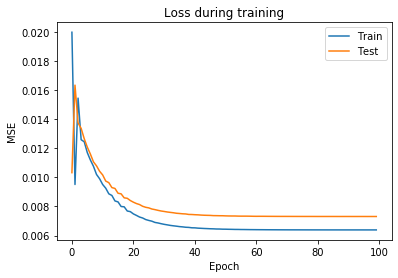

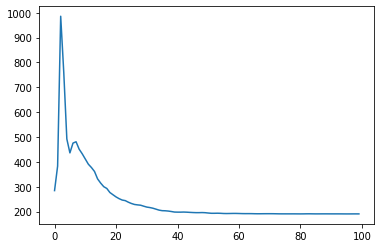

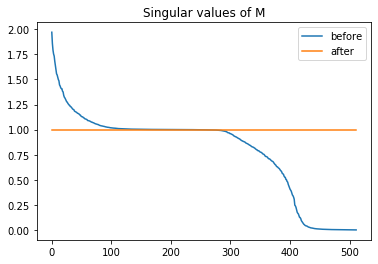

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.4855%)]


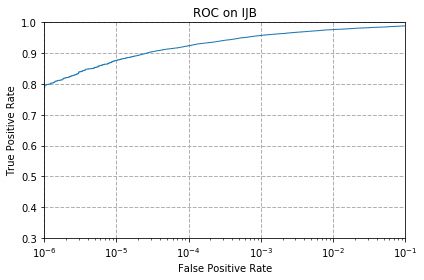

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.796543  0.876668   

Methods                                               0.0001    0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.924119  0.95756   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.976786  0.988802   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ResNet50  ArcFace

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1

[*] Epoch: 10, Train loss: 9.6946e-03, Test loss: 1.0422e-02, Rot loss: 4.0949e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.0922e-03, Test loss: 8.1349e-03, Rot loss: 2.1069e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 6.1540e-03, Test loss: 7.3036e-03, Rot loss: 1.4436e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 5.8359e-03, Test loss: 7.0238e-03, Rot loss: 1.0226e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.7239e-03, Test loss: 6.9121e-03, Rot loss: 9.3294e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 5.6871e-03, Test loss: 6.8769e-03, Rot loss: 8.5588e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 5.6726e-03, Test loss: 6.8641e-03, Rot loss: 8.2161e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 5.6667e-03, Test loss: 6.8584e-03, Rot loss: 8.1242e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 5.6649e-03, Test loss: 6.8566e-03, Rot loss: 7.9754e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 5.6637e-03, Test loss: 6.8555e-03, Rot loss: 7.9517e+01, LR : 1.00e+02



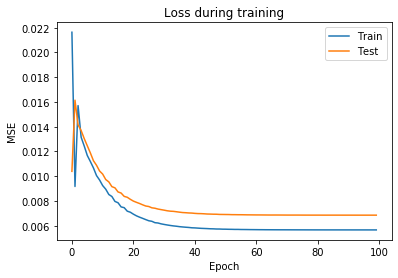

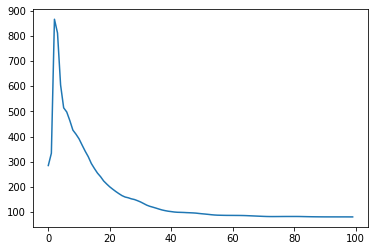

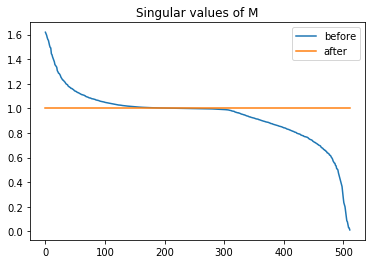

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_glint360k_r100FC_0_rotonly (AUC = 99.5664%)]


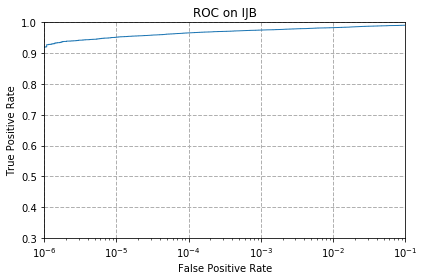

Methods                                               1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.92054  0.951935   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.965997  0.975098   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.982973  0.990847   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ResNet100  PartialFC_r0.1

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResN

[*] Epoch: 10, Train loss: 1.2248e-02, Test loss: 1.3663e-02, Rot loss: 3.2739e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.0345e-02, Test loss: 1.1939e-02, Rot loss: 2.0324e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 9.6537e-03, Test loss: 1.1315e-02, Rot loss: 1.5986e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 9.4181e-03, Test loss: 1.1099e-02, Rot loss: 1.3179e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 9.3307e-03, Test loss: 1.1019e-02, Rot loss: 1.2581e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 9.3010e-03, Test loss: 1.0992e-02, Rot loss: 1.1977e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 9.2888e-03, Test loss: 1.0980e-02, Rot loss: 1.1793e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 9.2839e-03, Test loss: 1.0976e-02, Rot loss: 1.1595e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 9.2813e-03, Test loss: 1.0973e-02, Rot loss: 1.1510e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 9.2798e-03, Test loss: 1.0972e-02, Rot loss: 1.1445e+02, LR : 1.00e+02



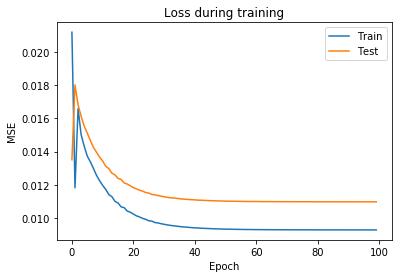

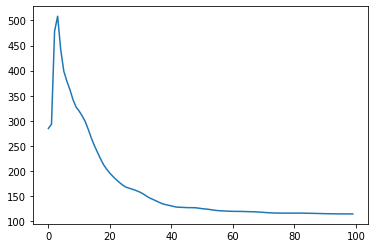

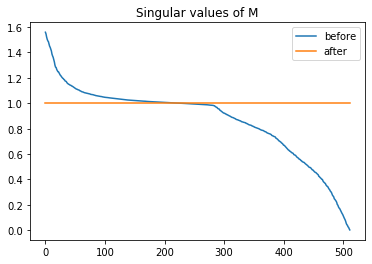

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_glint360k_r100FC_1_rotonly (AUC = 99.4796%)]


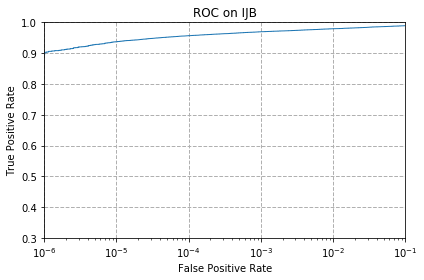

Methods                                               1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.90295  0.937311   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.956844  0.969627   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.979496  0.989364   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ResNet100  PartialFC_r1.0

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz
>>>> Rel

[*] Epoch: 10, Train loss: 1.2893e-03, Test loss: 1.1591e-03, Rot loss: 3.0737e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.5812e-04, Test loss: 4.3285e-04, Rot loss: 2.5961e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.7361e-04, Test loss: 1.6149e-04, Rot loss: 2.5539e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.4385e-05, Test loss: 6.7065e-05, Rot loss: 2.5244e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.7678e-05, Test loss: 3.7305e-05, Rot loss: 2.5265e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.5108e-05, Test loss: 2.6380e-05, Rot loss: 2.5212e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.1018e-05, Test loss: 2.2157e-05, Rot loss: 2.5205e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.9347e-05, Test loss: 2.0755e-05, Rot loss: 2.5200e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.8716e-05, Test loss: 2.0193e-05, Rot loss: 2.5198e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.8442e-05, Test loss: 1.9961e-05, Rot loss: 2.5194e+02, LR : 1.00e+02



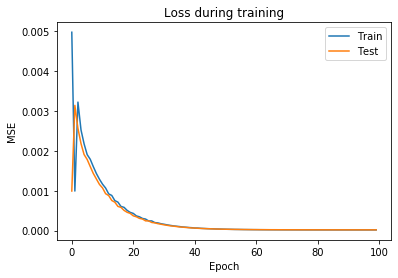

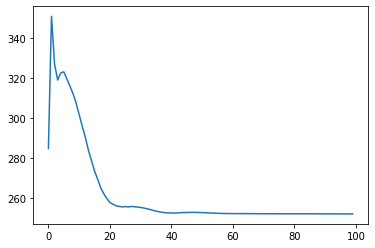

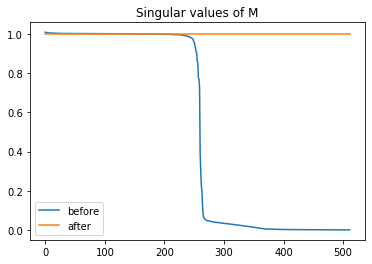

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_arc_res50_rotonly (AUC = 98.9266%)]


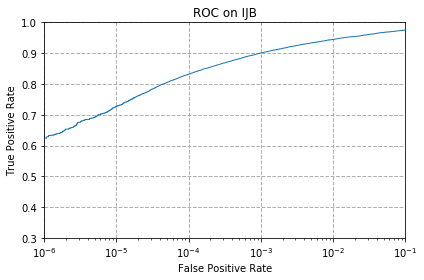

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.624329  0.727157   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.831518  0.900854   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.944675  0.975354   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ResNet50  ArcFace

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz
>>>> Relo

[*] Epoch: 10, Train loss: 1.3005e-03, Test loss: 1.1737e-03, Rot loss: 3.0721e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.6177e-04, Test loss: 4.4100e-04, Rot loss: 2.5947e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.7706e-04, Test loss: 1.6407e-04, Rot loss: 2.5534e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.6542e-05, Test loss: 6.9373e-05, Rot loss: 2.5234e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.9647e-05, Test loss: 3.9032e-05, Rot loss: 2.5256e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.6771e-05, Test loss: 2.7982e-05, Rot loss: 2.5203e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.2609e-05, Test loss: 2.3675e-05, Rot loss: 2.5196e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.0883e-05, Test loss: 2.2240e-05, Rot loss: 2.5193e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.0222e-05, Test loss: 2.1637e-05, Rot loss: 2.5191e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.9930e-05, Test loss: 2.1386e-05, Rot loss: 2.5187e+02, LR : 1.00e+02



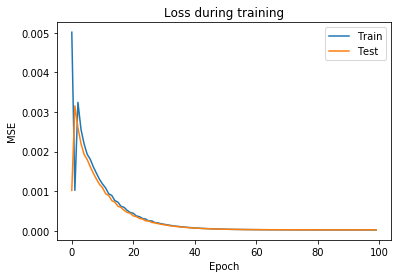

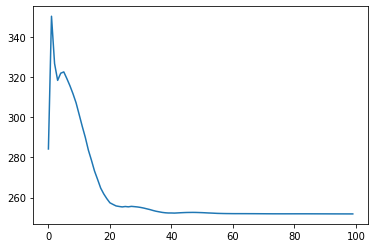

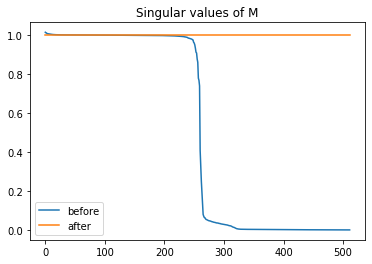

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 98.3332%)]


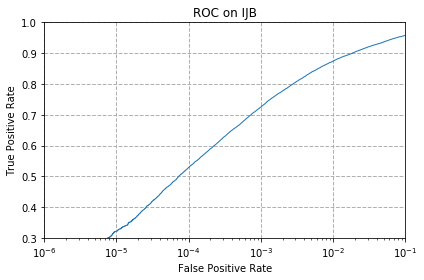

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.168482  0.322033   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.529069  0.725162   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.874316  0.958327   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  MobileNetV2  ArcFace

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz
>>>> R

[*] Epoch: 10, Train loss: 1.3498e-03, Test loss: 1.2320e-03, Rot loss: 3.0553e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.1404e-04, Test loss: 4.8361e-04, Rot loss: 2.5755e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.2031e-04, Test loss: 2.1027e-04, Rot loss: 2.5308e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2004e-04, Test loss: 1.1322e-04, Rot loss: 2.5010e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 8.2121e-05, Test loss: 8.2602e-05, Rot loss: 2.5043e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 6.9014e-05, Test loss: 7.1172e-05, Rot loss: 2.4997e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 6.4697e-05, Test loss: 6.6669e-05, Rot loss: 2.4985e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 6.2822e-05, Test loss: 6.5086e-05, Rot loss: 2.4980e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 6.2036e-05, Test loss: 6.4381e-05, Rot loss: 2.4983e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 6.1654e-05, Test loss: 6.4054e-05, Rot loss: 2.4983e+02, LR : 1.00e+02



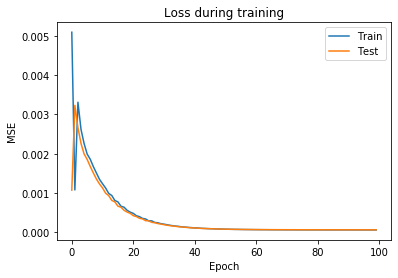

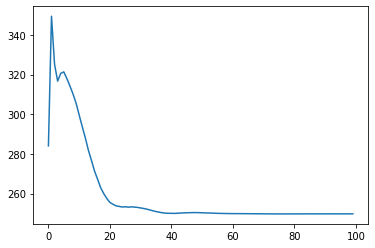

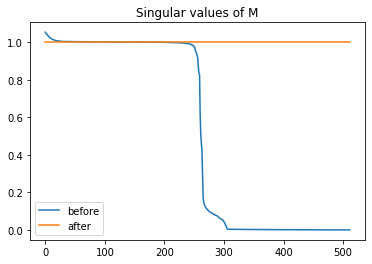

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 98.6566%)]


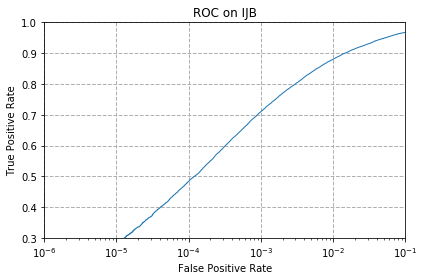

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.142149  0.285064   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.483765  0.710027   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.880452  0.967889   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  CenterLoss

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz
>>>> Rel

[*] Epoch: 10, Train loss: 1.3770e-03, Test loss: 1.2408e-03, Rot loss: 3.0557e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.2004e-04, Test loss: 5.0127e-04, Rot loss: 2.5789e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.3074e-04, Test loss: 2.1977e-04, Rot loss: 2.5348e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2889e-04, Test loss: 1.2359e-04, Rot loss: 2.5048e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 9.0921e-05, Test loss: 9.2696e-05, Rot loss: 2.5078e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.7547e-05, Test loss: 8.1273e-05, Rot loss: 2.5030e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.3217e-05, Test loss: 7.6741e-05, Rot loss: 2.5016e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.1348e-05, Test loss: 7.5190e-05, Rot loss: 2.5009e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.0565e-05, Test loss: 7.4499e-05, Rot loss: 2.5009e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.0180e-05, Test loss: 7.4181e-05, Rot loss: 2.5007e+02, LR : 1.00e+02



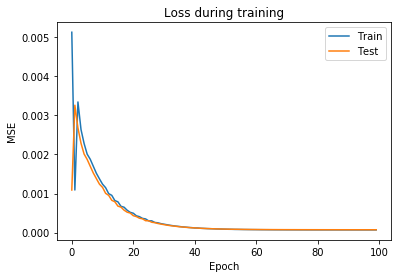

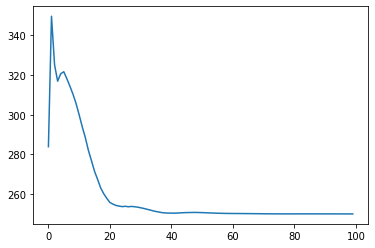

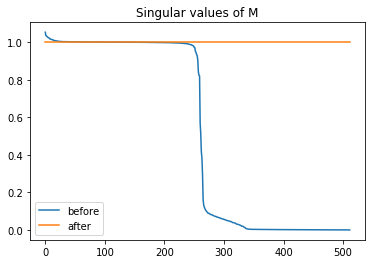

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_casia_ir2_ijbc_embs_rotonly (AUC = 98.6220%)]


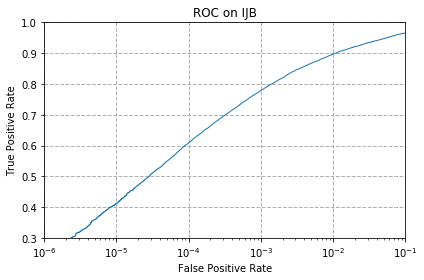

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.253515  0.412231   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.608836  0.778647   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.897224  0.966048   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  CenterLoss

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJ

[*] Epoch: 10, Train loss: 2.2140e-03, Test loss: 1.9176e-03, Rot loss: 7.5995e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.5595e-04, Test loss: 7.0316e-04, Rot loss: 7.7379e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.8852e-04, Test loss: 2.5608e-04, Rot loss: 7.7089e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.1155e-04, Test loss: 9.7581e-05, Rot loss: 7.6749e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 4.8855e-05, Test loss: 4.7503e-05, Rot loss: 7.6671e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.8519e-05, Test loss: 2.8938e-05, Rot loss: 7.6689e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.1153e-05, Test loss: 2.2260e-05, Rot loss: 7.6693e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.8760e-05, Test loss: 2.0021e-05, Rot loss: 7.6683e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.7777e-05, Test loss: 1.9161e-05, Rot loss: 7.6674e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.7453e-05, Test loss: 1.8875e-05, Rot loss: 7.6666e+02, LR : 1.00e+02



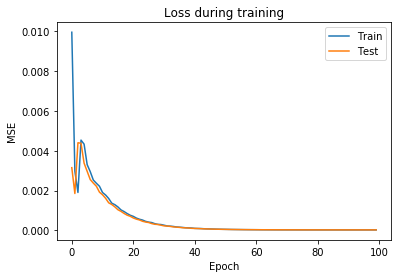

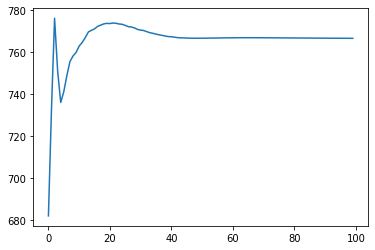

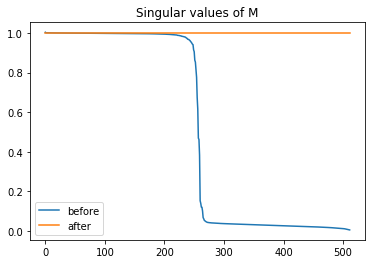

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 99.3027%)]


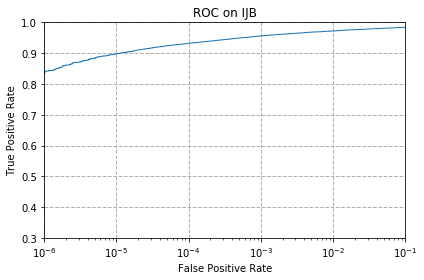

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.841489  0.897837   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.932096  0.956077   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.972286  0.984405   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD R_DATASET  R_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace      MS1M  64-CNN   

Methods                                                     R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  SphereFace+PFE

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluatio

[*] Epoch: 10, Train loss: 2.2143e-03, Test loss: 1.9216e-03, Rot loss: 7.6030e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.5865e-04, Test loss: 7.0648e-04, Rot loss: 7.7405e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.9139e-04, Test loss: 2.6155e-04, Rot loss: 7.7112e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.1526e-04, Test loss: 1.0158e-04, Rot loss: 7.6765e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.2480e-05, Test loss: 5.1648e-05, Rot loss: 7.6678e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.2004e-05, Test loss: 3.2943e-05, Rot loss: 7.6693e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.4655e-05, Test loss: 2.6223e-05, Rot loss: 7.6695e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.2280e-05, Test loss: 2.3978e-05, Rot loss: 7.6684e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.1290e-05, Test loss: 2.3115e-05, Rot loss: 7.6675e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.0958e-05, Test loss: 2.2837e-05, Rot loss: 7.6667e+02, LR : 1.00e+02



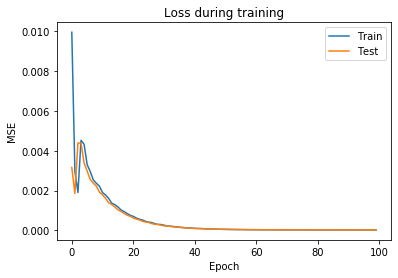

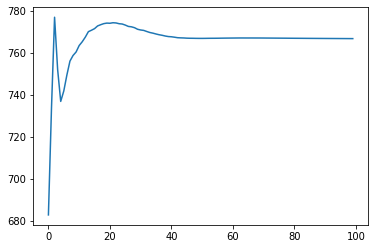

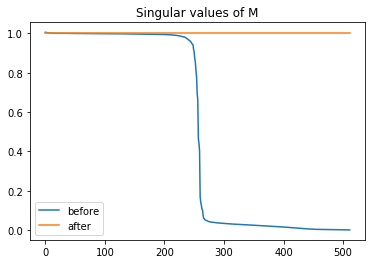

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 99.1421%)]


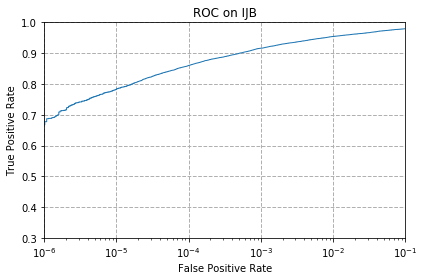

Methods                                               1e-06    1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.67766  0.78284   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.859897  0.916194   

Methods                                                0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.95439  0.979496   

Methods                                            L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...    MS1MV2  ResNet100   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  ArcFace  CASIA-WebFace   

Methods                                             R_ARCH          R_HEAD  
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  64-CNN  SphereFace+PFE

saving to ../../../../results/MS1MV2-ResNet100-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.0530e-02, Test loss: 1.1018e-02, Rot loss: 3.1853e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 8.9547e-03, Test loss: 9.3164e-03, Rot loss: 2.6922e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 8.3987e-03, Test loss: 8.7597e-03, Rot loss: 2.5053e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 8.2052e-03, Test loss: 8.5728e-03, Rot loss: 2.3629e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 8.1296e-03, Test loss: 8.4969e-03, Rot loss: 2.2452e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 8.0963e-03, Test loss: 8.4678e-03, Rot loss: 2.1333e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 8.0812e-03, Test loss: 8.4516e-03, Rot loss: 2.0212e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 8.0730e-03, Test loss: 8.4460e-03, Rot loss: 1.9132e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 8.0678e-03, Test loss: 8.4404e-03, Rot loss: 1.8139e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 8.0639e-03, Test loss: 8.4368e-03, Rot loss: 1.7241e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

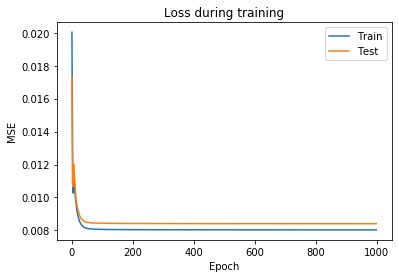

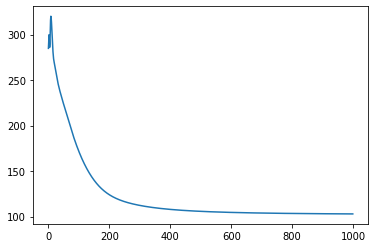

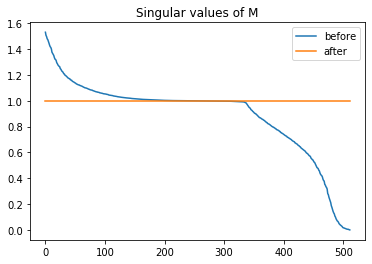

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 99.4821%)]


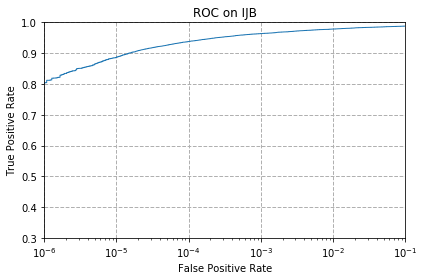

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.804469  0.886332   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.937874  0.963594   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.978422  0.988035   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ResNet100  ArcFace

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResN


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.2039e-02, Test loss: 1.3580e-02, Rot loss: 3.1919e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 1.0408e-02, Test loss: 1.2006e-02, Rot loss: 2.7991e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 9.8311e-03, Test loss: 1.1416e-02, Rot loss: 2.5670e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 9.6261e-03, Test loss: 1.1212e-02, Rot loss: 2.4149e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 9.5462e-03, Test loss: 1.1131e-02, Rot loss: 2.2945e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 9.5102e-03, Test loss: 1.1099e-02, Rot loss: 2.1742e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 9.4934e-03, Test loss: 1.1082e-02, Rot loss: 2.0524e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 9.4839e-03, Test loss: 1.1073e-02, Rot loss: 1.9397e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 9.4775e-03, Test loss: 1.1066e-02, Rot loss: 1.8397e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 9.4726e-03, Test loss: 1.1061e-02, Rot loss: 1.7503e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

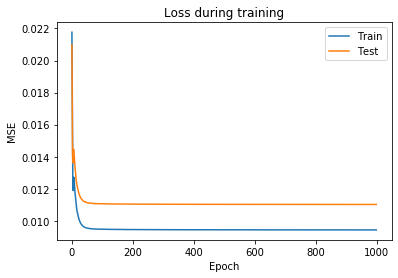

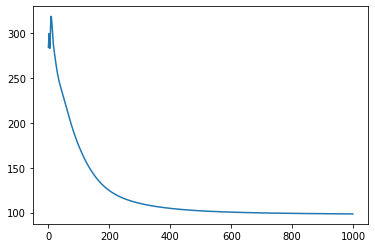

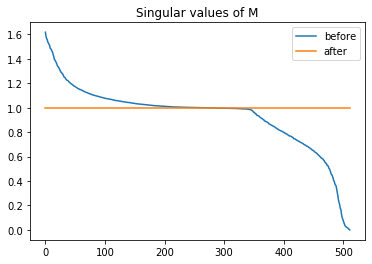

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_glint360k_r100FC_0_rotonly (AUC = 99.5726%)]


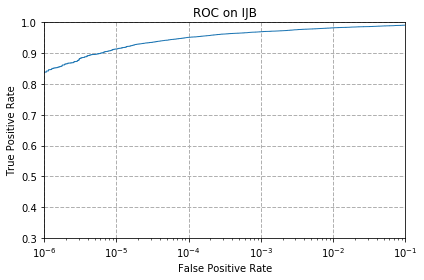

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.839035  0.913688   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.951526  0.969576   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.982462  0.991103   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ResNet100  PartialFC_r0.1

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcfac


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.3872e-02, Test loss: 1.5702e-02, Rot loss: 2.8664e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 1.2564e-02, Test loss: 1.4364e-02, Rot loss: 2.7431e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 1.2124e-02, Test loss: 1.3916e-02, Rot loss: 2.5847e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 1.1963e-02, Test loss: 1.3760e-02, Rot loss: 2.4480e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 1.1899e-02, Test loss: 1.3696e-02, Rot loss: 2.3275e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 1.1869e-02, Test loss: 1.3670e-02, Rot loss: 2.2109e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 1.1855e-02, Test loss: 1.3656e-02, Rot loss: 2.0947e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 1.1846e-02, Test loss: 1.3648e-02, Rot loss: 1.9840e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 1.1840e-02, Test loss: 1.3643e-02, Rot loss: 1.8846e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 1.1835e-02, Test loss: 1.3638e-02, Rot loss: 1.7963e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

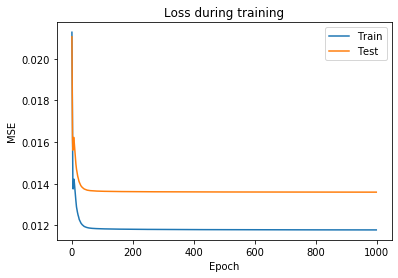

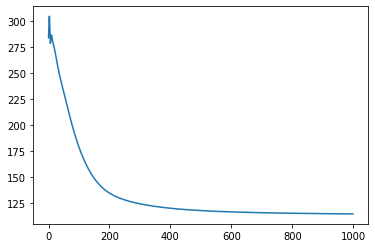

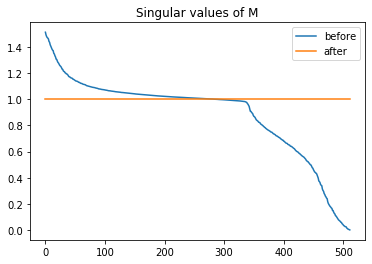

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_glint360k_r100FC_1_rotonly (AUC = 99.3853%)]


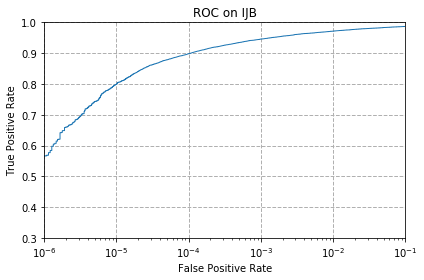

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.566754  0.799049   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.898451  0.945851   

Methods                                                0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.97157  0.987012   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ResNet100  PartialFC_r1.0

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz
>>>> Reload (right) 


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.0097e-03, Test loss: 9.9820e-04, Rot loss: 3.2910e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 3.5657e-04, Test loss: 3.4923e-04, Rot loss: 3.2724e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 1.3656e-04, Test loss: 1.3625e-04, Rot loss: 3.1592e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 6.0657e-05, Test loss: 6.0430e-05, Rot loss: 3.0097e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 3.4464e-05, Test loss: 3.4635e-05, Rot loss: 2.8534e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 2.4157e-05, Test loss: 2.5449e-05, Rot loss: 2.7027e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 2.0777e-05, Test loss: 2.2630e-05, Rot loss: 2.5630e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 1.9730e-05, Test loss: 2.1635e-05, Rot loss: 2.4371e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 1.9455e-05, Test loss: 2.1377e-05, Rot loss: 2.3262e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 1.9434e-05, Test loss: 2.1392e-05, Rot loss: 2.2307e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

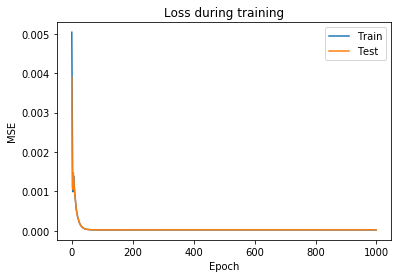

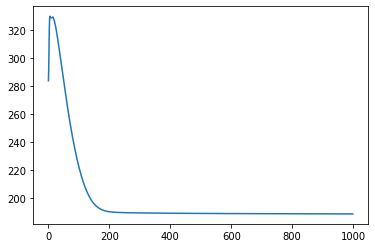

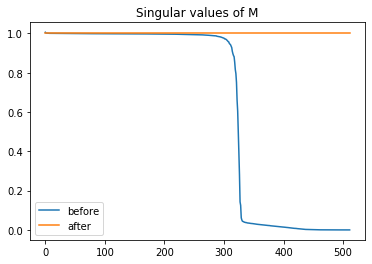

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_arc_res50_rotonly (AUC = 99.2734%)]


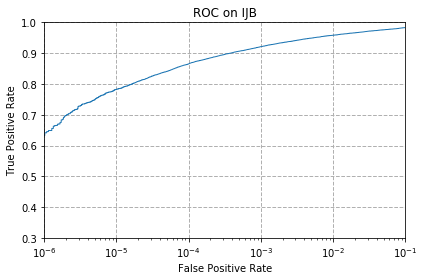

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.641612  0.782482   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.865419  0.921409   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.958378  0.983126   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ResNet50  ArcFace

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz
>>>> Reload (right) e


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.0132e-03, Test loss: 1.0014e-03, Rot loss: 3.2985e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 3.5812e-04, Test loss: 3.5375e-04, Rot loss: 3.2802e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 1.3600e-04, Test loss: 1.3588e-04, Rot loss: 3.1683e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 6.0353e-05, Test loss: 6.0455e-05, Rot loss: 3.0192e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 3.3804e-05, Test loss: 3.4213e-05, Rot loss: 2.8631e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 2.3474e-05, Test loss: 2.4961e-05, Rot loss: 2.7121e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 2.0037e-05, Test loss: 2.2144e-05, Rot loss: 2.5719e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 1.8982e-05, Test loss: 2.1142e-05, Rot loss: 2.4452e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 1.8695e-05, Test loss: 2.0857e-05, Rot loss: 2.3335e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 1.8666e-05, Test loss: 2.0869e-05, Rot loss: 2.2370e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

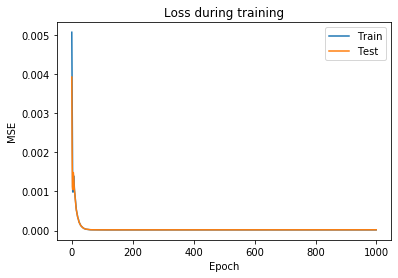

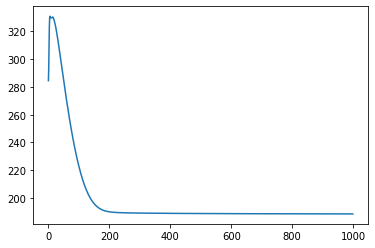

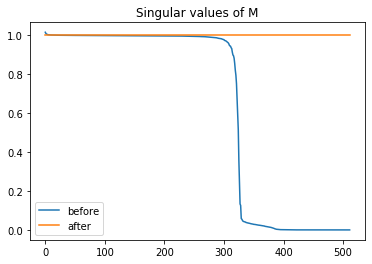

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 99.0799%)]


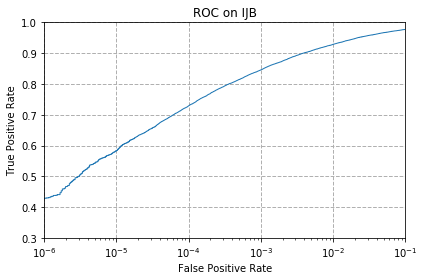

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.429463  0.583372   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.728997  0.845631   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.928875  0.977246   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  MobileNetV2  ArcFace

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz
>>>> Reload (right


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.0420e-03, Test loss: 1.0304e-03, Rot loss: 3.2893e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 3.8304e-04, Test loss: 3.8212e-04, Rot loss: 3.2731e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 1.5975e-04, Test loss: 1.6226e-04, Rot loss: 3.1613e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 8.3159e-05, Test loss: 8.4877e-05, Rot loss: 3.0129e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 5.6446e-05, Test loss: 5.8685e-05, Rot loss: 2.8573e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 4.6012e-05, Test loss: 4.9342e-05, Rot loss: 2.7069e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 4.2469e-05, Test loss: 4.6308e-05, Rot loss: 2.5670e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 4.1345e-05, Test loss: 4.5288e-05, Rot loss: 2.4405e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 4.1014e-05, Test loss: 4.4981e-05, Rot loss: 2.3287e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 4.0943e-05, Test loss: 4.4948e-05, Rot loss: 2.2321e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

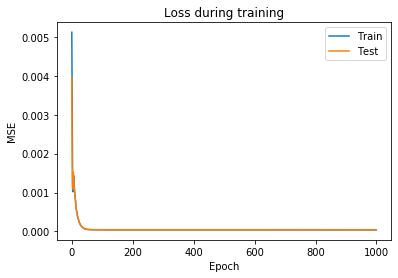

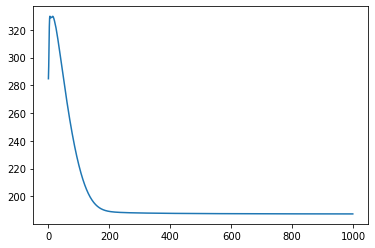

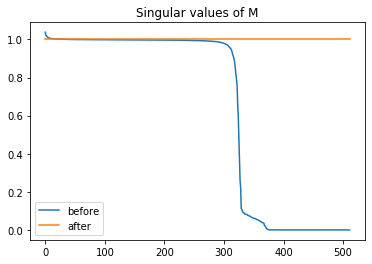

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 99.4313%)]


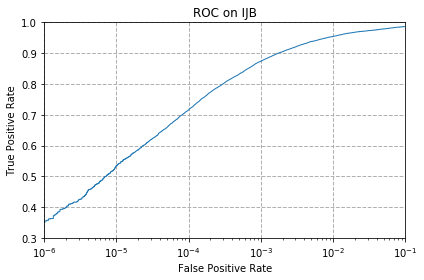

Methods                                                1e-06    1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.355423  0.53408   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.715958  0.874163   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.954594  0.986552   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  CenterLoss

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz
>>>> Reload (right) 


Training diverged, restarting with LR/10 and EPOCHS*10


[*] Epoch: 10, Train loss: 1.0553e-03, Test loss: 1.0438e-03, Rot loss: 3.2884e+02, LR : 1.00e+01
[*] Epoch: 20, Train loss: 3.9681e-04, Test loss: 3.9428e-04, Rot loss: 3.2722e+02, LR : 1.00e+01
[*] Epoch: 30, Train loss: 1.7242e-04, Test loss: 1.7630e-04, Rot loss: 3.1598e+02, LR : 1.00e+01
[*] Epoch: 40, Train loss: 9.7119e-05, Test loss: 1.0003e-04, Rot loss: 3.0105e+02, LR : 1.00e+01
[*] Epoch: 50, Train loss: 7.0157e-05, Test loss: 7.3555e-05, Rot loss: 2.8543e+02, LR : 1.00e+01
[*] Epoch: 60, Train loss: 5.9698e-05, Test loss: 6.4221e-05, Rot loss: 2.7037e+02, LR : 1.00e+01
[*] Epoch: 70, Train loss: 5.6103e-05, Test loss: 6.1279e-05, Rot loss: 2.5637e+02, LR : 1.00e+01
[*] Epoch: 80, Train loss: 5.4944e-05, Test loss: 6.0185e-05, Rot loss: 2.4373e+02, LR : 1.00e+01
[*] Epoch: 90, Train loss: 5.4585e-05, Test loss: 5.9809e-05, Rot loss: 2.3256e+02, LR : 1.00e+01
[*] Epoch: 100, Train loss: 5.4484e-05, Test loss: 5.9733e-05, Rot loss: 2.2290e+02, LR : 1.00e+01
[*] Epoch: 110, Tra

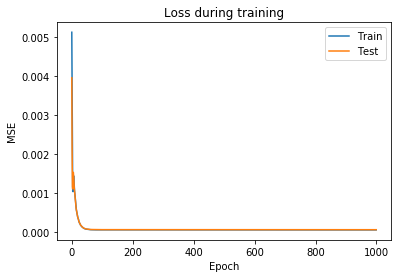

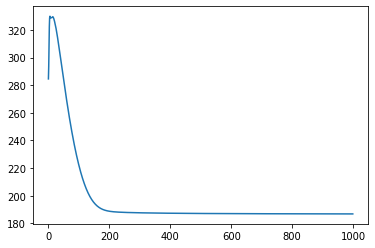

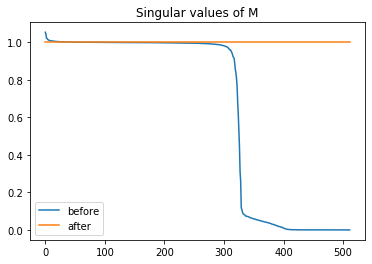

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_casia_ir2_ijbc_embs_rotonly (AUC = 99.2727%)]


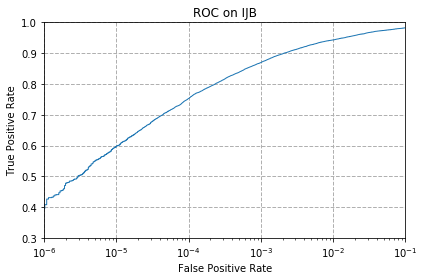

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.408191  0.597587   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.752723  0.869459   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.943141  0.982615   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  CenterLoss

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/

[*] Epoch: 10, Train loss: 2.4714e-03, Test loss: 2.3698e-03, Rot loss: 7.2817e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 9.0402e-04, Test loss: 8.2602e-04, Rot loss: 7.2759e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.0228e-04, Test loss: 3.1805e-04, Rot loss: 7.1744e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2242e-04, Test loss: 1.2842e-04, Rot loss: 7.0881e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.9241e-05, Test loss: 6.1325e-05, Rot loss: 7.0529e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.7092e-05, Test loss: 3.8977e-05, Rot loss: 7.0458e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8838e-05, Test loss: 3.1047e-05, Rot loss: 7.0438e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.6159e-05, Test loss: 2.7962e-05, Rot loss: 7.0418e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.5227e-05, Test loss: 2.6907e-05, Rot loss: 7.0403e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.4851e-05, Test loss: 2.6493e-05, Rot loss: 7.0392e+02, LR : 1.00e+02



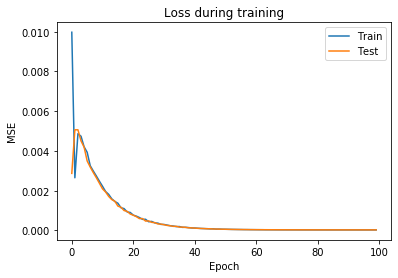

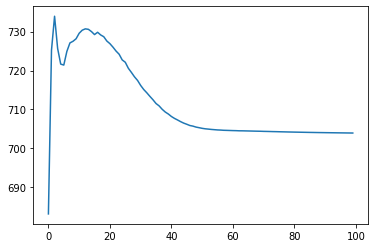

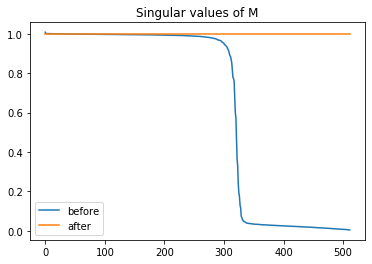

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 99.2234%)]


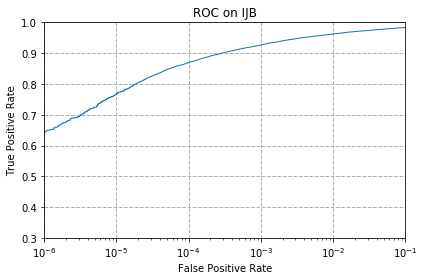

Methods                                                1e-06     1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.646725  0.766989   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.869407  0.926625   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.962469  0.983382   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD R_DATASET  R_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace      MS1M  64-CNN   

Methods                                                     R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  SphereFace+PFE

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB

[*] Epoch: 10, Train loss: 2.4647e-03, Test loss: 2.3651e-03, Rot loss: 7.2826e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 8.9207e-04, Test loss: 8.3166e-04, Rot loss: 7.2763e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.9891e-04, Test loss: 3.1481e-04, Rot loss: 7.1751e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.1904e-04, Test loss: 1.2648e-04, Rot loss: 7.0891e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.6504e-05, Test loss: 5.9275e-05, Rot loss: 7.0543e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.4198e-05, Test loss: 3.6906e-05, Rot loss: 7.0473e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.5998e-05, Test loss: 2.9072e-05, Rot loss: 7.0456e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.3327e-05, Test loss: 2.5932e-05, Rot loss: 7.0440e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.2400e-05, Test loss: 2.4873e-05, Rot loss: 7.0429e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.2032e-05, Test loss: 2.4466e-05, Rot loss: 7.0421e+02, LR : 1.00e+02



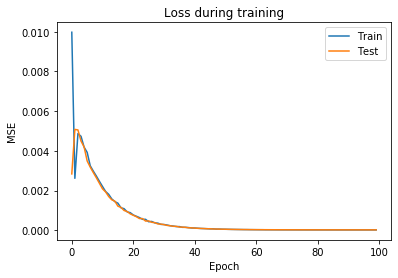

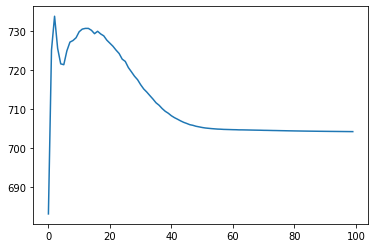

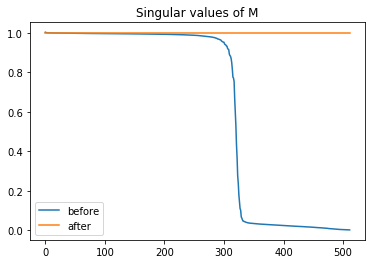

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 99.3805%)]


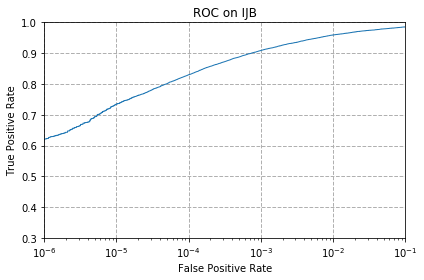

Methods                                                1e-06    1e-05  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.621926  0.73452   

Methods                                               0.0001     0.001  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.830035  0.908728   

Methods                                                 0.01       0.1  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  0.959196  0.985478   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  VGGFace2  ResNet50   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  ArcFace  CASIA-WebFace   

Methods                                             R_ARCH          R_HEAD  
../../../../results/VGG2-ResNet50-Arcface_IJBC_...  64-CNN  SphereFace+PFE

saving to ../../../../results/VGG2-ResNet50-Arcface_IJBC_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/g

[*] Epoch: 10, Train loss: 7.8820e-03, Test loss: 8.3225e-03, Rot loss: 3.9299e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.2095e-03, Test loss: 5.5744e-03, Rot loss: 2.6399e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 4.2778e-03, Test loss: 4.6840e-03, Rot loss: 2.0646e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.9413e-03, Test loss: 4.3631e-03, Rot loss: 1.8871e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.8256e-03, Test loss: 4.2510e-03, Rot loss: 1.8274e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.7858e-03, Test loss: 4.2103e-03, Rot loss: 1.8091e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 3.7727e-03, Test loss: 4.1932e-03, Rot loss: 1.8030e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 3.7676e-03, Test loss: 4.1900e-03, Rot loss: 1.7998e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 3.7657e-03, Test loss: 4.1893e-03, Rot loss: 1.8000e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 3.7651e-03, Test loss: 4.1879e-03, Rot loss: 1.7991e+02, LR : 1.00e+02



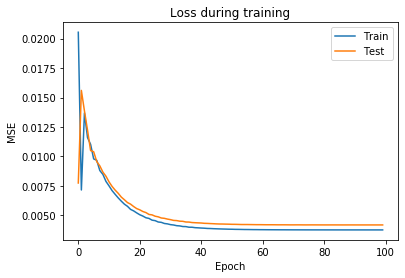

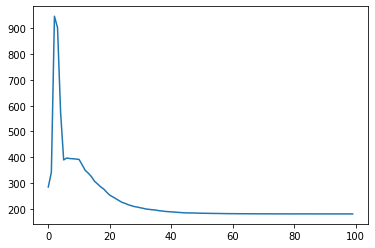

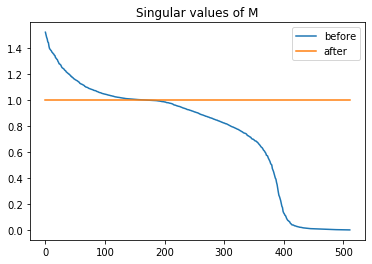

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 99.5369%)]


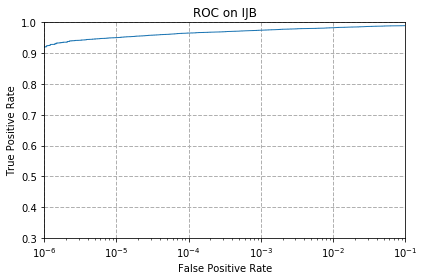

Methods                                             1e-06     1e-05    0.0001  \
../../../../results/glint360k_r100FC_0_TO_MS1MV...  0.921  0.950708  0.965486   

Methods                                                0.001      0.01  \
../../../../results/glint360k_r100FC_0_TO_MS1MV...  0.974689  0.982768   

Methods                                                  0.1  L_DATASET  \
../../../../results/glint360k_r100FC_0_TO_MS1MV...  0.989467  Glint360k   

Methods                                                L_ARCH          L_HEAD  \
../../../../results/glint360k_r100FC_0_TO_MS1MV...  ResNet100  PartialFC_r0.1   

Methods                                            R_DATASET     R_ARCH  \
../../../../results/glint360k_r100FC_0_TO_MS1MV...    MS1MV2  ResNet100   

Methods                                              R_HEAD  
../../../../results/glint360k_r100FC_0_TO_MS1MV...  ArcFace

saving to ../../../../results/glint360k_r100FC_0_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_

[*] Epoch: 10, Train loss: 9.4713e-03, Test loss: 1.0446e-02, Rot loss: 5.0086e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.1641e-03, Test loss: 8.0904e-03, Rot loss: 3.5969e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 6.3361e-03, Test loss: 7.2933e-03, Rot loss: 3.2725e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 6.0428e-03, Test loss: 7.0244e-03, Rot loss: 3.1323e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.9390e-03, Test loss: 6.9259e-03, Rot loss: 3.1108e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 5.9041e-03, Test loss: 6.8933e-03, Rot loss: 3.1022e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 5.8926e-03, Test loss: 6.8778e-03, Rot loss: 3.0973e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 5.8882e-03, Test loss: 6.8745e-03, Rot loss: 3.0923e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 5.8863e-03, Test loss: 6.8731e-03, Rot loss: 3.0961e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 5.8857e-03, Test loss: 6.8726e-03, Rot loss: 3.0950e+02, LR : 1.00e+02



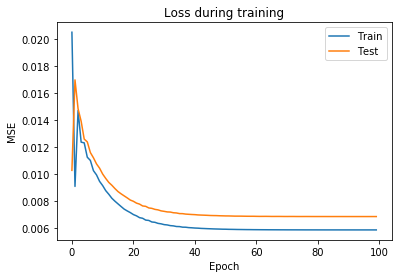

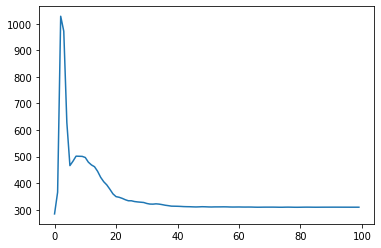

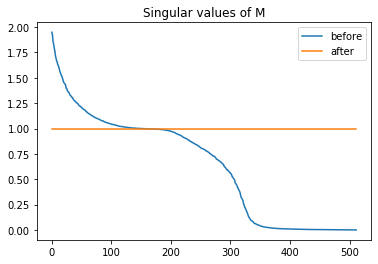

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.5677%)]


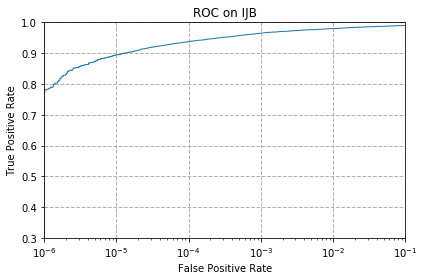

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_VGG2-...  0.780539  0.894309   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_VGG2-...  0.937925  0.965076   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_VGG2-...  0.979854  0.990029   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_VGG2-...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_VGG2-...  PartialFC_r0.1  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_0_TO_VGG2-...  ResNet50  ArcFace

saving to ../../../../results/glint360k_r100FC_0_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz

[*] Epoch: 10, Train loss: 1.0461e-02, Test loss: 1.1910e-02, Rot loss: 3.8492e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 8.1675e-03, Test loss: 9.5656e-03, Rot loss: 2.5173e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 7.3644e-03, Test loss: 8.7816e-03, Rot loss: 1.9262e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.0784e-03, Test loss: 8.5048e-03, Rot loss: 1.6741e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 6.9800e-03, Test loss: 8.3976e-03, Rot loss: 1.5977e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 6.9447e-03, Test loss: 8.3632e-03, Rot loss: 1.5544e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 6.9314e-03, Test loss: 8.3492e-03, Rot loss: 1.5388e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 6.9263e-03, Test loss: 8.3449e-03, Rot loss: 1.5272e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 6.9242e-03, Test loss: 8.3424e-03, Rot loss: 1.5231e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 6.9232e-03, Test loss: 8.3414e-03, Rot loss: 1.5197e+02, LR : 1.00e+02



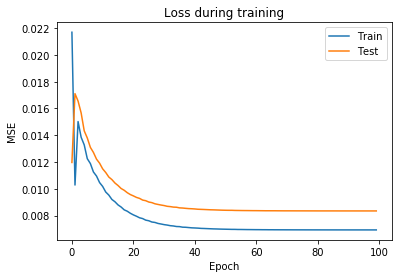

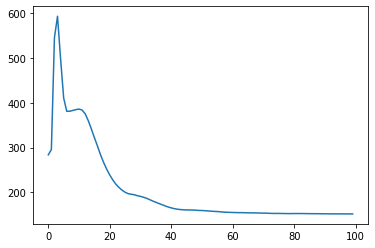

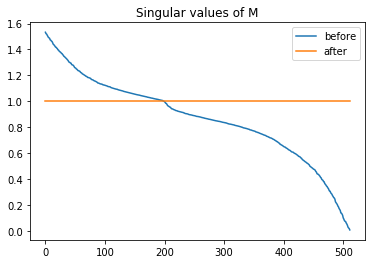

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_glint360k_r100FC_1_rotonly (AUC = 99.5798%)]


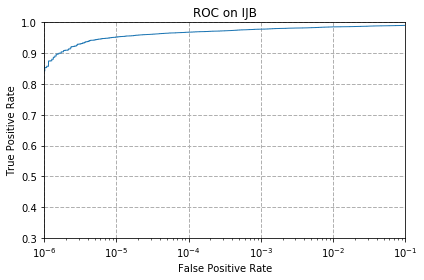

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_glint...  0.853352  0.952293   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_glint...  0.968196  0.978115   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_glint...  0.985478  0.990438   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_glint...  Glint360k  ResNet100   

Methods                                                     L_HEAD  R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_glint...  PartialFC_r0.1  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/glint360k_r100FC_0_TO_glint...  ResNet100  PartialFC_r1.0

saving to ../../../../results/glint360k_r100FC_0_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz
>>>> Reload (right) embeddings from: /

[*] Epoch: 10, Train loss: 1.3871e-03, Test loss: 1.4298e-03, Rot loss: 3.5276e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.0822e-04, Test loss: 5.1391e-04, Rot loss: 3.3669e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.9562e-04, Test loss: 1.9886e-04, Rot loss: 3.4087e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 8.4448e-05, Test loss: 8.8845e-05, Rot loss: 3.4101e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 4.6903e-05, Test loss: 5.1104e-05, Rot loss: 3.4220e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.3806e-05, Test loss: 3.8062e-05, Rot loss: 3.4161e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8514e-05, Test loss: 3.3746e-05, Rot loss: 3.4151e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.6629e-05, Test loss: 3.1749e-05, Rot loss: 3.4163e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.5858e-05, Test loss: 3.1003e-05, Rot loss: 3.4165e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.5526e-05, Test loss: 3.0698e-05, Rot loss: 3.4158e+02, LR : 1.00e+02



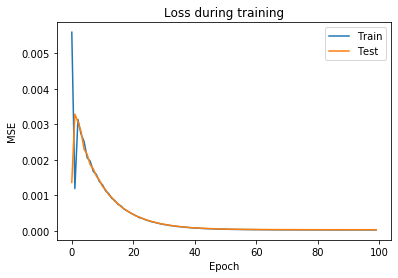

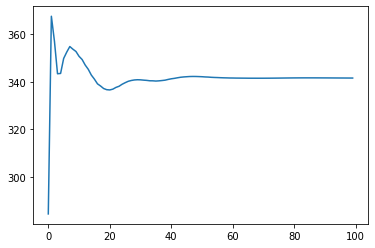

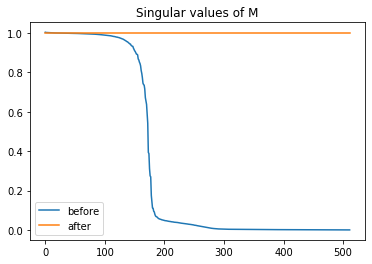

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_ijbc_embs_arc_res50_rotonly (AUC = 99.0837%)]


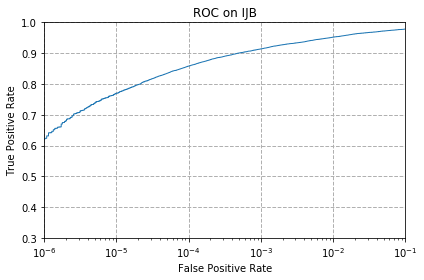

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.623715  0.769699   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.858056  0.913842   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.952089  0.978473   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  PartialFC_r0.1      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_0_TO_ijbc_...  ResNet50  ArcFace

saving to ../../../../results/glint360k_r100FC_0_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz
>>>> Reload (right) embeddings from: /s

[*] Epoch: 10, Train loss: 1.3840e-03, Test loss: 1.4265e-03, Rot loss: 3.5296e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.0403e-04, Test loss: 5.1337e-04, Rot loss: 3.3668e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.9660e-04, Test loss: 1.9920e-04, Rot loss: 3.4086e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 8.5090e-05, Test loss: 9.0114e-05, Rot loss: 3.4083e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 4.8034e-05, Test loss: 5.2280e-05, Rot loss: 3.4201e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.4859e-05, Test loss: 3.9248e-05, Rot loss: 3.4151e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.9571e-05, Test loss: 3.4789e-05, Rot loss: 3.4148e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.7652e-05, Test loss: 3.2793e-05, Rot loss: 3.4164e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.6869e-05, Test loss: 3.2031e-05, Rot loss: 3.4168e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.6536e-05, Test loss: 3.1701e-05, Rot loss: 3.4164e+02, LR : 1.00e+02



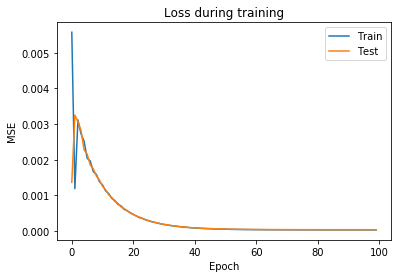

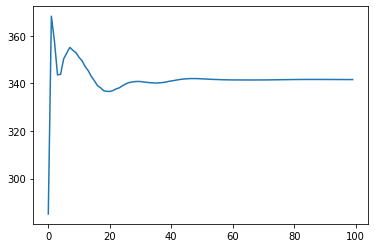

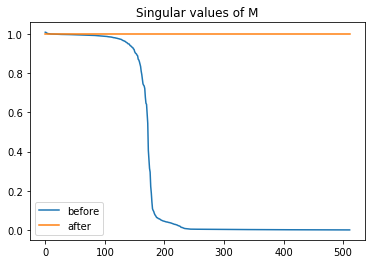

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 98.5601%)]


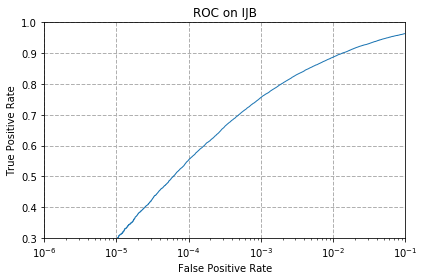

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.116429  0.297438   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.553459  0.756098   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.887406  0.964054   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  PartialFC_r0.1      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_0_TO_ijbc_...  MobileNetV2  ArcFace

saving to ../../../../results/glint360k_r100FC_0_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz
>>>> Reload (right) embeddings from:

[*] Epoch: 10, Train loss: 1.4315e-03, Test loss: 1.4842e-03, Rot loss: 3.5040e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.5132e-04, Test loss: 5.6084e-04, Rot loss: 3.3324e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.3913e-04, Test loss: 2.4603e-04, Rot loss: 3.3654e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2710e-04, Test loss: 1.3468e-04, Rot loss: 3.3660e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 8.8866e-05, Test loss: 9.5954e-05, Rot loss: 3.3828e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.5177e-05, Test loss: 8.2274e-05, Rot loss: 3.3826e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 6.9582e-05, Test loss: 7.7495e-05, Rot loss: 3.3836e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 6.7545e-05, Test loss: 7.5364e-05, Rot loss: 3.3855e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 6.6669e-05, Test loss: 7.4498e-05, Rot loss: 3.3867e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 6.6266e-05, Test loss: 7.4097e-05, Rot loss: 3.3870e+02, LR : 1.00e+02



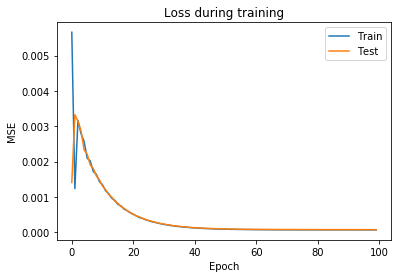

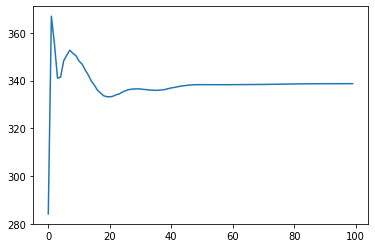

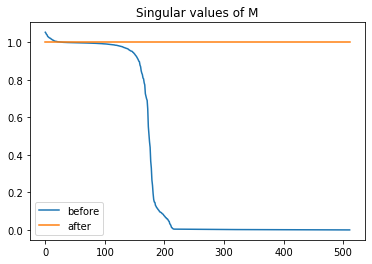

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 98.7936%)]


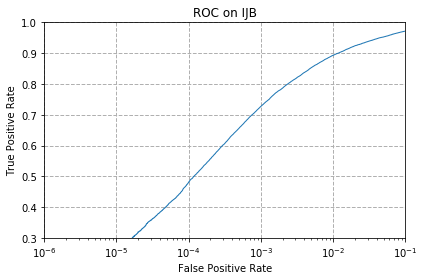

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_vggfa...  0.120417  0.254998   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_vggfa...  0.480902  0.727054   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_vggfa...  0.893031  0.971775   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_vggfa...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_vggfa...  PartialFC_r0.1  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/glint360k_r100FC_0_TO_vggfa...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/glint360k_r100FC_0_TO_vggfa...  CenterLoss

saving to ../../../../results/glint360k_r100FC_0_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz
>>>> Reload (right) embeddings from: /

[*] Epoch: 10, Train loss: 1.4379e-03, Test loss: 1.4809e-03, Rot loss: 3.5077e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.5863e-04, Test loss: 5.6659e-04, Rot loss: 3.3368e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.4461e-04, Test loss: 2.5540e-04, Rot loss: 3.3696e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3493e-04, Test loss: 1.4389e-04, Rot loss: 3.3685e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 9.6387e-05, Test loss: 1.0565e-04, Rot loss: 3.3840e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 8.2748e-05, Test loss: 9.1843e-05, Rot loss: 3.3829e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.7172e-05, Test loss: 8.7140e-05, Rot loss: 3.3834e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.5092e-05, Test loss: 8.5027e-05, Rot loss: 3.3849e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.4192e-05, Test loss: 8.4139e-05, Rot loss: 3.3855e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.3757e-05, Test loss: 8.3709e-05, Rot loss: 3.3853e+02, LR : 1.00e+02



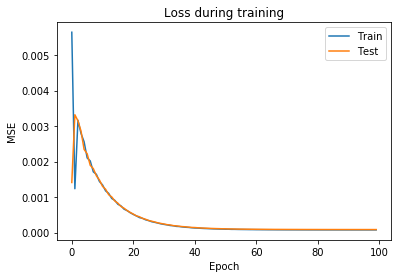

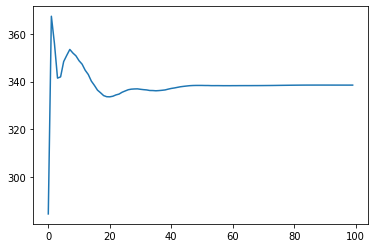

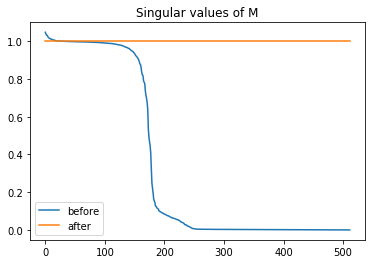

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_casia_ir2_ijbc_embs_rotonly (AUC = 98.7891%)]


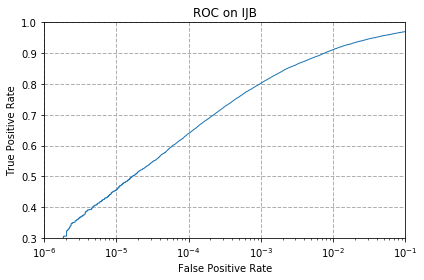

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_casia...  0.243493  0.456052   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_casia...  0.639208  0.802526   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_casia...  0.911438  0.970445   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_casia...  Glint360k  ResNet100   

Methods                                                     L_HEAD  \
../../../../results/glint360k_r100FC_0_TO_casia...  PartialFC_r0.1   

Methods                                                 R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_casia...  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/glint360k_r100FC_0_TO_casia...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/glint360k_r100FC_0_TO_casia...  CenterLoss

saving to ../../../../results/glint360k_r100FC_0_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_

[*] Epoch: 10, Train loss: 2.4346e-03, Test loss: 2.3349e-03, Rot loss: 8.0637e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 8.1823e-04, Test loss: 8.4706e-04, Rot loss: 8.4616e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.0521e-04, Test loss: 3.1609e-04, Rot loss: 8.5828e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2108e-04, Test loss: 1.2356e-04, Rot loss: 8.6173e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.5221e-05, Test loss: 5.9668e-05, Rot loss: 8.6286e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.3696e-05, Test loss: 3.7327e-05, Rot loss: 8.6318e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.5253e-05, Test loss: 2.8738e-05, Rot loss: 8.6313e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.2336e-05, Test loss: 2.5908e-05, Rot loss: 8.6296e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.1313e-05, Test loss: 2.4936e-05, Rot loss: 8.6276e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.0894e-05, Test loss: 2.4539e-05, Rot loss: 8.6254e+02, LR : 1.00e+02



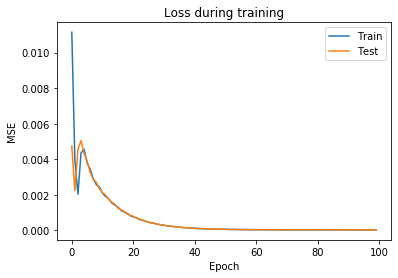

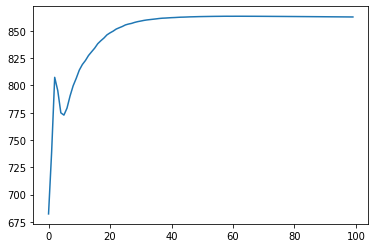

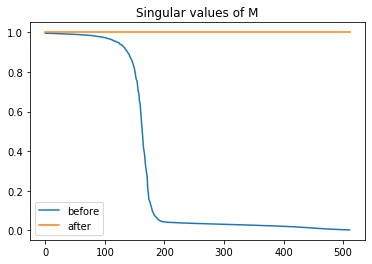

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 99.3641%)]


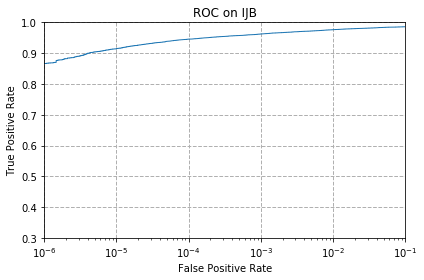

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.866646  0.914353   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.945544  0.962315   

Methods                                                0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.97653  0.985887   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  PartialFC_r0.1      MS1M   

Methods                                             R_ARCH          R_HEAD  
../../../../results/glint360k_r100FC_0_TO_ijbc_...  64-CNN  SphereFace+PFE

saving to ../../../../results/glint360k_r100FC_0_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_0_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k

[*] Epoch: 10, Train loss: 2.4270e-03, Test loss: 2.3381e-03, Rot loss: 8.0646e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 8.2270e-04, Test loss: 8.4631e-04, Rot loss: 8.4644e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.0811e-04, Test loss: 3.1802e-04, Rot loss: 8.5852e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2410e-04, Test loss: 1.2801e-04, Rot loss: 8.6197e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.8767e-05, Test loss: 6.4224e-05, Rot loss: 8.6308e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.7282e-05, Test loss: 4.1634e-05, Rot loss: 8.6342e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8844e-05, Test loss: 3.3135e-05, Rot loss: 8.6341e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.5938e-05, Test loss: 3.0299e-05, Rot loss: 8.6329e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.4912e-05, Test loss: 2.9334e-05, Rot loss: 8.6314e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.4489e-05, Test loss: 2.8932e-05, Rot loss: 8.6297e+02, LR : 1.00e+02



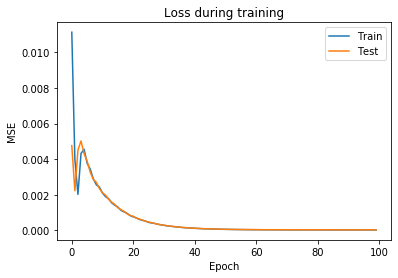

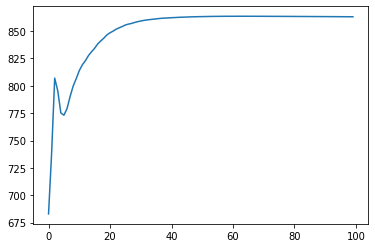

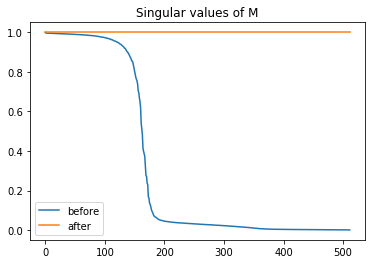

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_0_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 99.2873%)]


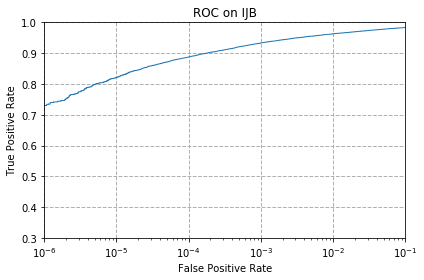

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.730173  0.821445   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.887713  0.933119   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  0.962878  0.983382   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  PartialFC_r0.1   

Methods                                                 R_DATASET  R_ARCH  \
../../../../results/glint360k_r100FC_0_TO_ijbc_...  CASIA-WebFace  64-CNN   

Methods                                                     R_HEAD  
../../../../results/glint360k_r100FC_0_TO_ijbc_...  SphereFace+PFE

saving to ../../../../results/glint360k_r100FC_0_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k

[*] Epoch: 10, Train loss: 8.4950e-03, Test loss: 9.1371e-03, Rot loss: 4.5856e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 6.4445e-03, Test loss: 7.1835e-03, Rot loss: 3.7981e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 5.7260e-03, Test loss: 6.4887e-03, Rot loss: 3.4368e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 5.4695e-03, Test loss: 6.2479e-03, Rot loss: 3.3477e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.3824e-03, Test loss: 6.1589e-03, Rot loss: 3.3022e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 5.3511e-03, Test loss: 6.1276e-03, Rot loss: 3.2848e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 5.3395e-03, Test loss: 6.1179e-03, Rot loss: 3.2847e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 5.3358e-03, Test loss: 6.1150e-03, Rot loss: 3.2814e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 5.3345e-03, Test loss: 6.1135e-03, Rot loss: 3.2816e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 5.3340e-03, Test loss: 6.1132e-03, Rot loss: 3.2812e+02, LR : 1.00e+02



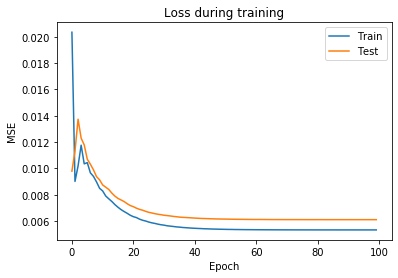

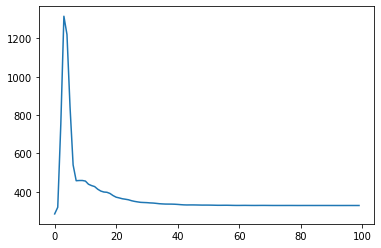

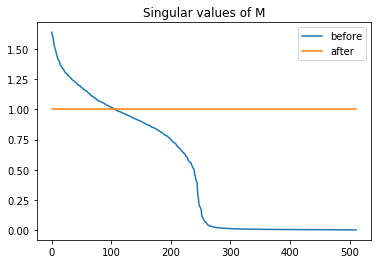

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 99.4280%)]


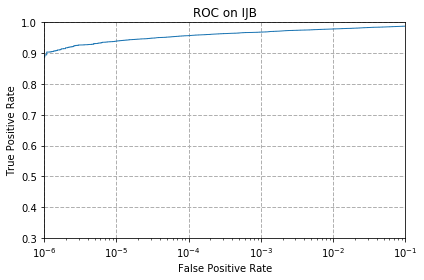

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_MS1MV...  0.894462  0.939459   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_MS1MV...  0.956997  0.968451   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_MS1MV...  0.978729  0.987882   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_MS1MV...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_MS1MV...  PartialFC_r1.0    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_1_TO_MS1MV...  ResNet100  ArcFace

saving to ../../../../results/glint360k_r100FC_1_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_

[*] Epoch: 10, Train loss: 1.0441e-02, Test loss: 1.1803e-02, Rot loss: 4.8816e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 8.7203e-03, Test loss: 1.0159e-02, Rot loss: 4.5467e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 8.1177e-03, Test loss: 9.5996e-03, Rot loss: 4.2863e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.9010e-03, Test loss: 9.3938e-03, Rot loss: 4.2568e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 7.8279e-03, Test loss: 9.3176e-03, Rot loss: 4.2215e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.8021e-03, Test loss: 9.2914e-03, Rot loss: 4.2088e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.7921e-03, Test loss: 9.2838e-03, Rot loss: 4.2133e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.7890e-03, Test loss: 9.2808e-03, Rot loss: 4.2109e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.7879e-03, Test loss: 9.2796e-03, Rot loss: 4.2103e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.7876e-03, Test loss: 9.2794e-03, Rot loss: 4.2101e+02, LR : 1.00e+02



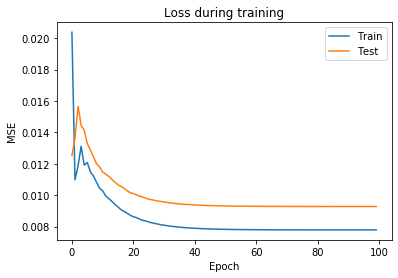

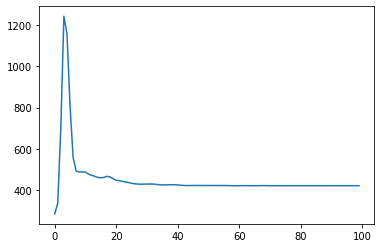

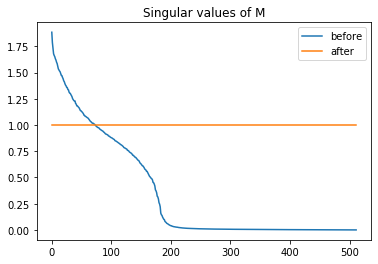

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.4487%)]


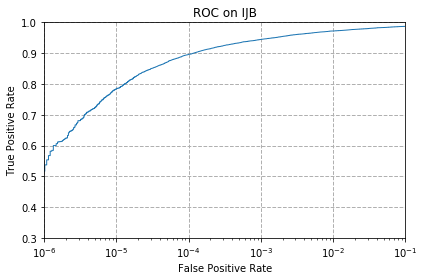

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_VGG2-...  0.537352  0.784374   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_VGG2-...  0.896201  0.944623   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_VGG2-...  0.972184  0.987217   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_VGG2-...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_VGG2-...  PartialFC_r1.0  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_1_TO_VGG2-...  ResNet50  ArcFace

saving to ../../../../results/glint360k_r100FC_1_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz

[*] Epoch: 10, Train loss: 8.2148e-03, Test loss: 9.3477e-03, Rot loss: 4.7787e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 5.8374e-03, Test loss: 7.0010e-03, Rot loss: 3.4527e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 5.0017e-03, Test loss: 6.1933e-03, Rot loss: 2.8787e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 4.7053e-03, Test loss: 5.9087e-03, Rot loss: 2.7133e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 4.6049e-03, Test loss: 5.8095e-03, Rot loss: 2.6481e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 4.5680e-03, Test loss: 5.7729e-03, Rot loss: 2.6213e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 4.5547e-03, Test loss: 5.7621e-03, Rot loss: 2.6181e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 4.5505e-03, Test loss: 5.7584e-03, Rot loss: 2.6126e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 4.5489e-03, Test loss: 5.7568e-03, Rot loss: 2.6124e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 4.5484e-03, Test loss: 5.7563e-03, Rot loss: 2.6119e+02, LR : 1.00e+02



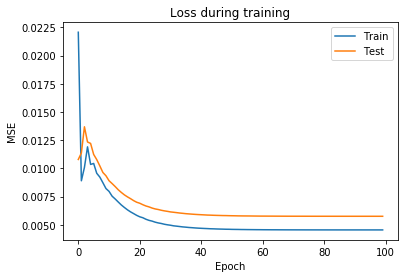

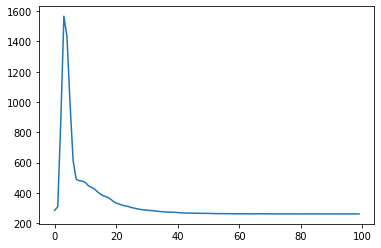

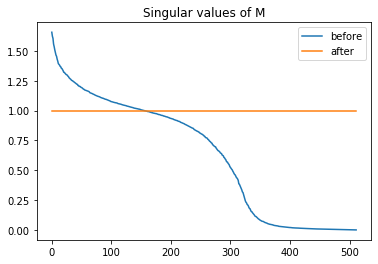

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_glint360k_r100FC_0_rotonly (AUC = 99.5850%)]


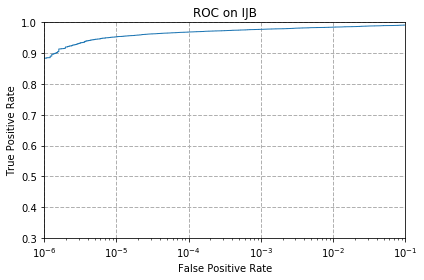

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_glint...  0.884031  0.953214   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_glint...  0.968553  0.977399   

Methods                                                 0.01      0.1  \
../../../../results/glint360k_r100FC_1_TO_glint...  0.984507  0.99141   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_glint...  Glint360k  ResNet100   

Methods                                                     L_HEAD  R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_glint...  PartialFC_r1.0  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/glint360k_r100FC_1_TO_glint...  ResNet100  PartialFC_r0.1

saving to ../../../../results/glint360k_r100FC_1_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz
>>>> Reload (right) embeddings from: /

[*] Epoch: 10, Train loss: 1.1779e-03, Test loss: 1.1787e-03, Rot loss: 4.4804e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.3665e-04, Test loss: 4.2432e-04, Rot loss: 4.8716e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.6230e-04, Test loss: 1.6453e-04, Rot loss: 5.0272e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 6.9649e-05, Test loss: 7.1362e-05, Rot loss: 5.0823e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.6531e-05, Test loss: 3.9424e-05, Rot loss: 5.1021e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.5152e-05, Test loss: 2.7879e-05, Rot loss: 5.1089e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.1337e-05, Test loss: 2.3730e-05, Rot loss: 5.1113e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.9961e-05, Test loss: 2.2356e-05, Rot loss: 5.1122e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.9462e-05, Test loss: 2.1846e-05, Rot loss: 5.1125e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.9294e-05, Test loss: 2.1691e-05, Rot loss: 5.1126e+02, LR : 1.00e+02



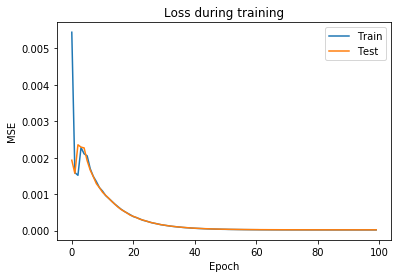

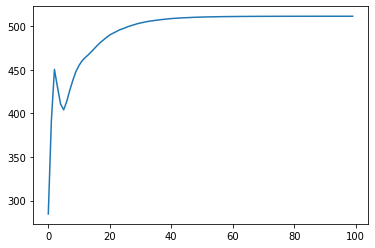

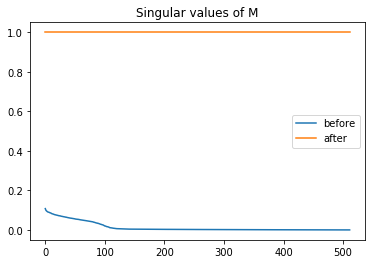

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_ijbc_embs_arc_res50_rotonly (AUC = 98.7496%)]


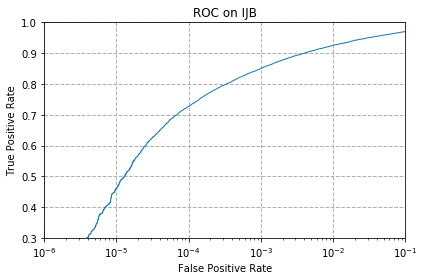

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.149205  0.461625   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.726901  0.850591   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.925755  0.970445   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  PartialFC_r1.0      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_1_TO_ijbc_...  ResNet50  ArcFace

saving to ../../../../results/glint360k_r100FC_1_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz
>>>> Reload (right) embeddings from: /s

[*] Epoch: 10, Train loss: 1.1715e-03, Test loss: 1.1878e-03, Rot loss: 4.4808e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.4007e-04, Test loss: 4.3093e-04, Rot loss: 4.8709e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.6410e-04, Test loss: 1.6660e-04, Rot loss: 5.0265e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.0945e-05, Test loss: 7.2850e-05, Rot loss: 5.0823e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.7661e-05, Test loss: 4.0602e-05, Rot loss: 5.1020e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.6287e-05, Test loss: 2.9018e-05, Rot loss: 5.1089e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.2421e-05, Test loss: 2.4837e-05, Rot loss: 5.1113e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.1043e-05, Test loss: 2.3468e-05, Rot loss: 5.1121e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.0541e-05, Test loss: 2.2963e-05, Rot loss: 5.1124e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.0372e-05, Test loss: 2.2802e-05, Rot loss: 5.1125e+02, LR : 1.00e+02



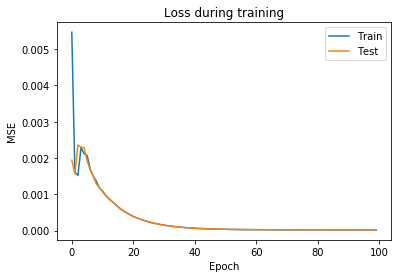

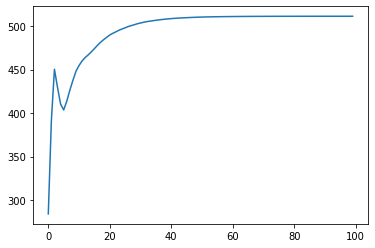

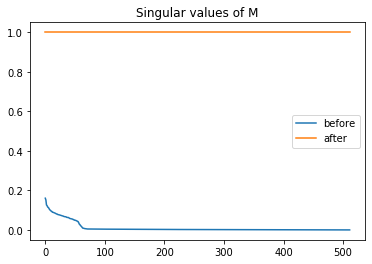

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 97.5159%)]


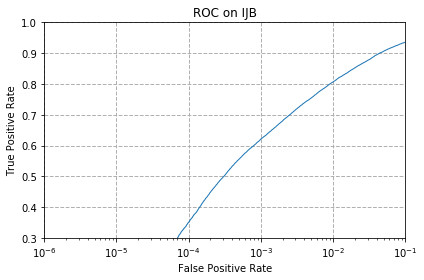

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.000409  0.034259   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.351281  0.621108   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.806821  0.935777   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  PartialFC_r1.0      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/glint360k_r100FC_1_TO_ijbc_...  MobileNetV2  ArcFace

saving to ../../../../results/glint360k_r100FC_1_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz
>>>> Reload (right) embeddings from:

[*] Epoch: 10, Train loss: 1.2343e-03, Test loss: 1.2428e-03, Rot loss: 4.4543e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.9296e-04, Test loss: 4.9096e-04, Rot loss: 4.8493e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.2106e-04, Test loss: 2.2818e-04, Rot loss: 5.0035e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2840e-04, Test loss: 1.3542e-04, Rot loss: 5.0590e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 9.5412e-05, Test loss: 1.0341e-04, Rot loss: 5.0784e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 8.4067e-05, Test loss: 9.1967e-05, Rot loss: 5.0854e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 8.0248e-05, Test loss: 8.7874e-05, Rot loss: 5.0877e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.8871e-05, Test loss: 8.6533e-05, Rot loss: 5.0885e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.8372e-05, Test loss: 8.5999e-05, Rot loss: 5.0888e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.8202e-05, Test loss: 8.5837e-05, Rot loss: 5.0890e+02, LR : 1.00e+02



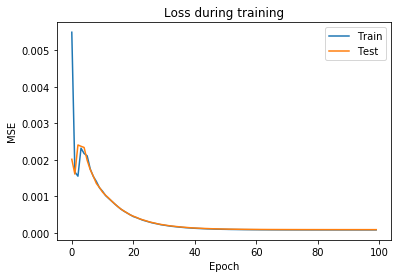

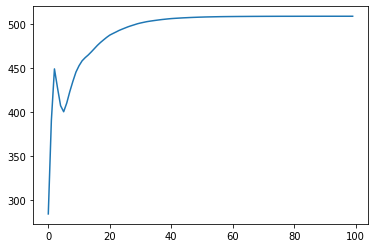

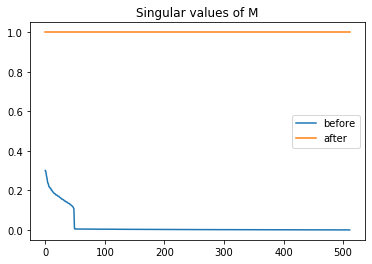

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 97.1926%)]


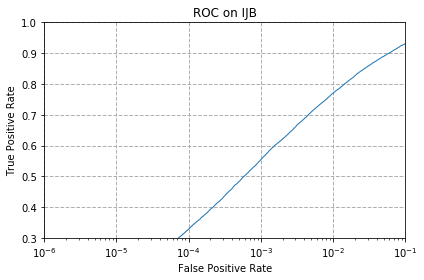

Methods                                               1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_vggfa...  0.06274  0.155085   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_vggfa...  0.328322  0.554686   

Methods                                                0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_vggfa...  0.77067  0.931482   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_vggfa...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_vggfa...  PartialFC_r1.0  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/glint360k_r100FC_1_TO_vggfa...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/glint360k_r100FC_1_TO_vggfa...  CenterLoss

saving to ../../../../results/glint360k_r100FC_1_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz
>>>> Reload (right) embeddings from: /

[*] Epoch: 10, Train loss: 1.2282e-03, Test loss: 1.2546e-03, Rot loss: 4.4602e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.9569e-04, Test loss: 4.9651e-04, Rot loss: 4.8526e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.2333e-04, Test loss: 2.3430e-04, Rot loss: 5.0063e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3015e-04, Test loss: 1.4006e-04, Rot loss: 5.0619e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 9.7277e-05, Test loss: 1.0805e-04, Rot loss: 5.0814e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 8.5862e-05, Test loss: 9.6682e-05, Rot loss: 5.0884e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 8.2022e-05, Test loss: 9.2378e-05, Rot loss: 5.0908e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 8.0637e-05, Test loss: 9.1053e-05, Rot loss: 5.0916e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 8.0136e-05, Test loss: 9.0532e-05, Rot loss: 5.0919e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.9967e-05, Test loss: 9.0378e-05, Rot loss: 5.0920e+02, LR : 1.00e+02



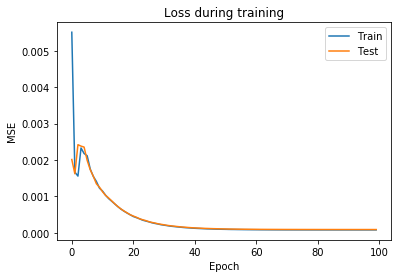

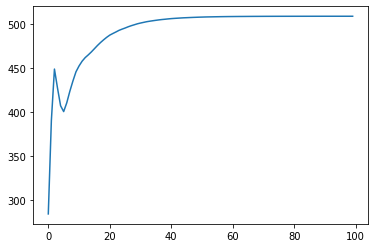

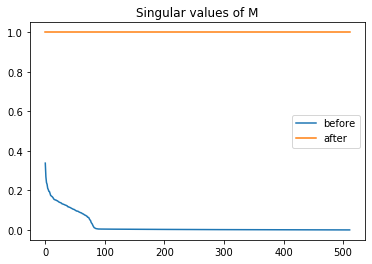

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_casia_ir2_ijbc_embs_rotonly (AUC = 97.9472%)]


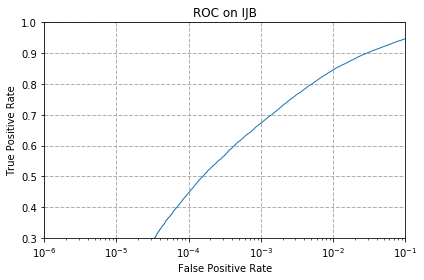

Methods                                                1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_casia...  0.006136  0.122002   

Methods                                              0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_casia...  0.44649  0.672905   

Methods                                                 0.01      0.1  \
../../../../results/glint360k_r100FC_1_TO_casia...  0.845989  0.94718   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_casia...  Glint360k  ResNet100   

Methods                                                     L_HEAD  \
../../../../results/glint360k_r100FC_1_TO_casia...  PartialFC_r1.0   

Methods                                                 R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_casia...  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/glint360k_r100FC_1_TO_casia...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/glint360k_r100FC_1_TO_casia...  CenterLoss

saving to ../../../../results/glint360k_r100FC_1_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_

[*] Epoch: 10, Train loss: 2.2589e-03, Test loss: 2.2162e-03, Rot loss: 8.8948e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.9004e-04, Test loss: 7.9034e-04, Rot loss: 9.7739e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.7700e-04, Test loss: 2.7971e-04, Rot loss: 1.0071e+03, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.0727e-04, Test loss: 1.1017e-04, Rot loss: 1.0173e+03, LR : 1.00e+02
[*] Epoch: 50, Train loss: 4.7397e-05, Test loss: 4.9444e-05, Rot loss: 1.0210e+03, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.5947e-05, Test loss: 2.8233e-05, Rot loss: 1.0223e+03, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.8574e-05, Test loss: 2.0841e-05, Rot loss: 1.0228e+03, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.6017e-05, Test loss: 1.8267e-05, Rot loss: 1.0230e+03, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5144e-05, Test loss: 1.7393e-05, Rot loss: 1.0230e+03, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.4835e-05, Test loss: 1.7084e-05, Rot loss: 1.0230e+03, LR : 1.00e+02



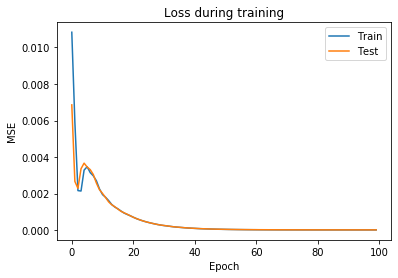

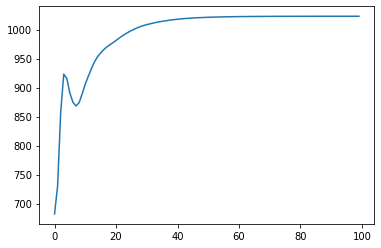

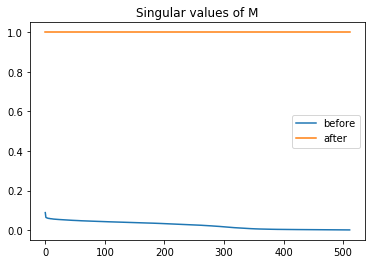

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 99.2869%)]


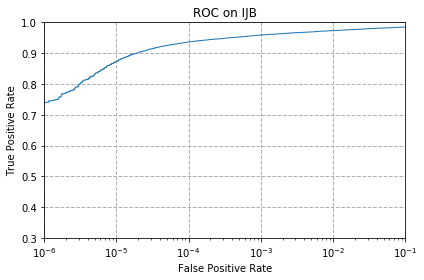

Methods                                               1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.73994  0.872782   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.936493  0.959094   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.973309  0.984711   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  PartialFC_r1.0      MS1M   

Methods                                             R_ARCH          R_HEAD  
../../../../results/glint360k_r100FC_1_TO_ijbc_...  64-CNN  SphereFace+PFE

saving to ../../../../results/glint360k_r100FC_1_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/glint360k_r100FC_1_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k

[*] Epoch: 10, Train loss: 2.2729e-03, Test loss: 2.2252e-03, Rot loss: 8.8958e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.9478e-04, Test loss: 7.9415e-04, Rot loss: 9.7778e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.8287e-04, Test loss: 2.8664e-04, Rot loss: 1.0074e+03, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.1315e-04, Test loss: 1.1667e-04, Rot loss: 1.0176e+03, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.3155e-05, Test loss: 5.5758e-05, Rot loss: 1.0213e+03, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.1552e-05, Test loss: 3.4680e-05, Rot loss: 1.0227e+03, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.4193e-05, Test loss: 2.7265e-05, Rot loss: 1.0231e+03, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.1635e-05, Test loss: 2.4653e-05, Rot loss: 1.0233e+03, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.0753e-05, Test loss: 2.3768e-05, Rot loss: 1.0233e+03, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.0443e-05, Test loss: 2.3467e-05, Rot loss: 1.0233e+03, LR : 1.00e+02



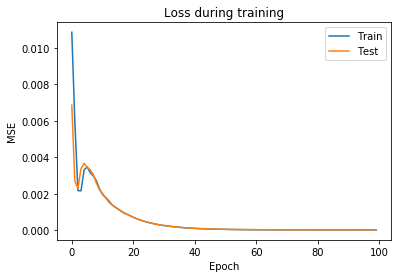

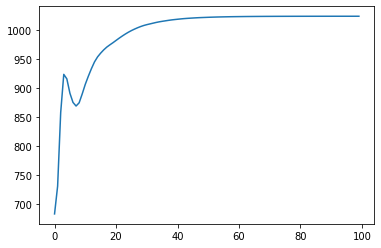

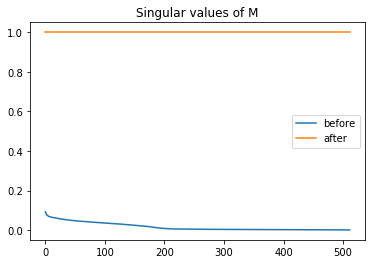

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/glint360k_r100FC_1_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 99.0044%)]


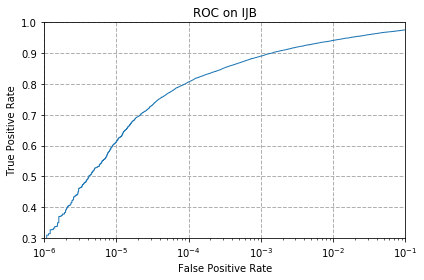

Methods                                               1e-06     1e-05  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.29483  0.612313   

Methods                                               0.0001     0.001  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.806565  0.890576   

Methods                                                 0.01       0.1  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  0.941607  0.975814   

Methods                                             L_DATASET     L_ARCH  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  Glint360k  ResNet100   

Methods                                                     L_HEAD  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  PartialFC_r1.0   

Methods                                                 R_DATASET  R_ARCH  \
../../../../results/glint360k_r100FC_1_TO_ijbc_...  CASIA-WebFace  64-CNN   

Methods                                                     R_HEAD  
../../../../results/glint360k_r100FC_1_TO_ijbc_...  SphereFace+PFE

saving to ../../../../results/glint360k_r100FC_1_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/re

[*] Epoch: 10, Train loss: 1.3942e-02, Test loss: 1.4024e-02, Rot loss: 6.8950e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.4025e-02, Test loss: 1.4203e-02, Rot loss: 2.6134e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3877e-02, Test loss: 1.4045e-02, Rot loss: 3.7704e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3918e-02, Test loss: 1.4082e-02, Rot loss: 2.4198e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3895e-02, Test loss: 1.4065e-02, Rot loss: 2.5595e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3894e-02, Test loss: 1.4062e-02, Rot loss: 2.4608e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3894e-02, Test loss: 1.4063e-02, Rot loss: 2.3914e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3892e-02, Test loss: 1.4061e-02, Rot loss: 2.3961e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3892e-02, Test loss: 1.4061e-02, Rot loss: 2.3873e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3892e-02, Test loss: 1.4061e-02, Rot loss: 2.3832e+02, LR : 1.00e+02



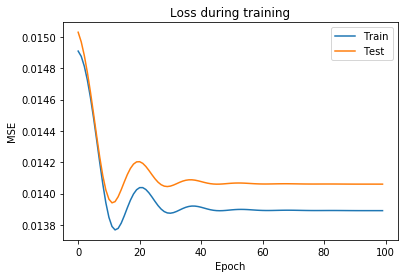

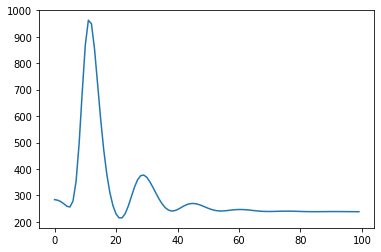

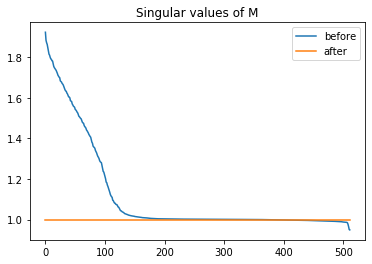

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 99.1712%)]


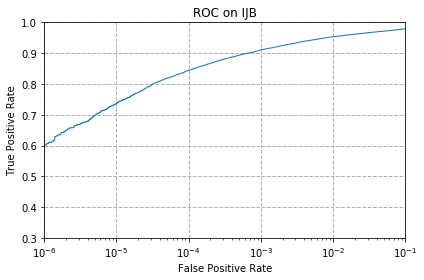

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_MS1M...  0.602495  0.736207   

Methods                                              0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_MS1M...  0.84425  0.910671   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_MS1M...  0.953418  0.979291   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_MS1M...      MS1M  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_MS1M...  ArcFace    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_MS1M...  ResNet100  ArcFace

saving to ../../../../results/ijbc_embs_arc_res50_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nob

[*] Epoch: 10, Train loss: 1.3482e-02, Test loss: 1.4584e-02, Rot loss: 1.2939e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3813e-02, Test loss: 1.4956e-02, Rot loss: 3.0996e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3607e-02, Test loss: 1.4785e-02, Rot loss: 4.7267e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3607e-02, Test loss: 1.4772e-02, Rot loss: 4.0694e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3609e-02, Test loss: 1.4775e-02, Rot loss: 3.7433e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3604e-02, Test loss: 1.4771e-02, Rot loss: 3.7066e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3602e-02, Test loss: 1.4769e-02, Rot loss: 3.6803e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3602e-02, Test loss: 1.4769e-02, Rot loss: 3.6630e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3602e-02, Test loss: 1.4768e-02, Rot loss: 3.6578e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3601e-02, Test loss: 1.4768e-02, Rot loss: 3.6537e+02, LR : 1.00e+02



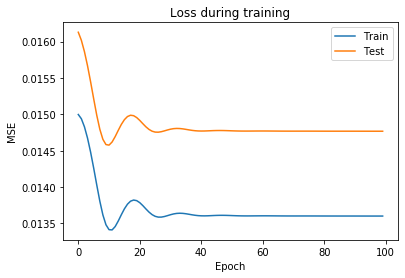

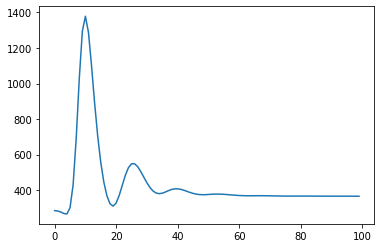

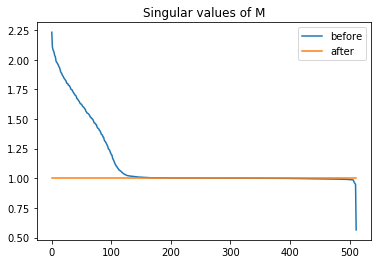

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.4269%)]


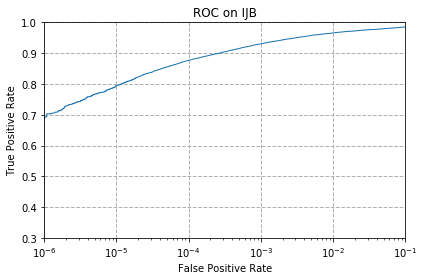

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_VGG2...  0.693307  0.794652   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_VGG2...  0.876617  0.930562   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_VGG2...  0.965895  0.985223   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_VGG2...      MS1M  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_VGG2...  ArcFace  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_VGG2...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_arc_res50_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/p

[*] Epoch: 10, Train loss: 1.5794e-02, Test loss: 1.7769e-02, Rot loss: 5.7581e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5810e-02, Test loss: 1.7885e-02, Rot loss: 2.6717e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5700e-02, Test loss: 1.7753e-02, Rot loss: 3.3547e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5731e-02, Test loss: 1.7786e-02, Rot loss: 2.1759e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5706e-02, Test loss: 1.7765e-02, Rot loss: 2.3388e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5709e-02, Test loss: 1.7766e-02, Rot loss: 2.1697e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5708e-02, Test loss: 1.7765e-02, Rot loss: 2.1388e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5706e-02, Test loss: 1.7763e-02, Rot loss: 2.1388e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5706e-02, Test loss: 1.7763e-02, Rot loss: 2.1230e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5705e-02, Test loss: 1.7763e-02, Rot loss: 2.1242e+02, LR : 1.00e+02



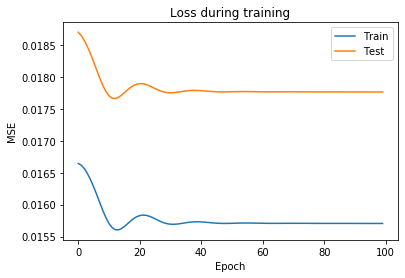

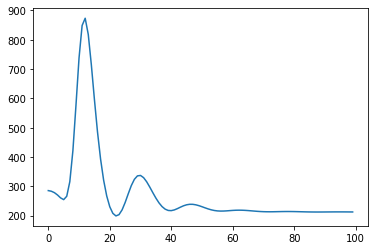

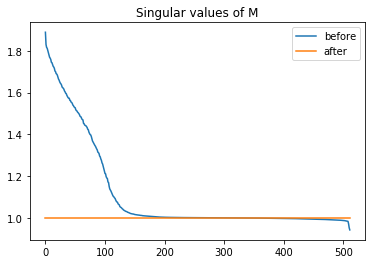

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_glint360k_r100FC_0_rotonly (AUC = 99.2158%)]


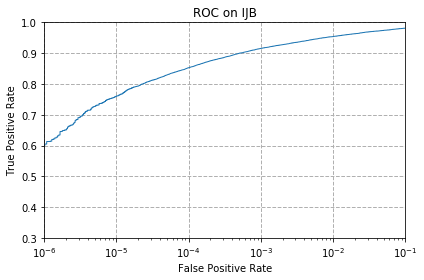

Methods                                                1e-06    1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  0.605052  0.76029   

Methods                                               0.0001    0.001  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  0.852789  0.91558   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  0.954032  0.981388   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_glin...      MS1M  ResNet50   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_glin...  ResNet100  PartialFC_r0.1

saving to ../../../../results/ijbc_embs_arc_res50_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/

[*] Epoch: 10, Train loss: 1.5796e-02, Test loss: 1.7564e-02, Rot loss: 2.9554e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5655e-02, Test loss: 1.7496e-02, Rot loss: 2.6576e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5667e-02, Test loss: 1.7484e-02, Rot loss: 1.5646e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5642e-02, Test loss: 1.7471e-02, Rot loss: 1.4561e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5642e-02, Test loss: 1.7468e-02, Rot loss: 1.2304e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5639e-02, Test loss: 1.7467e-02, Rot loss: 1.1663e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5638e-02, Test loss: 1.7465e-02, Rot loss: 1.1473e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5637e-02, Test loss: 1.7465e-02, Rot loss: 1.1195e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5636e-02, Test loss: 1.7464e-02, Rot loss: 1.1225e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5636e-02, Test loss: 1.7464e-02, Rot loss: 1.1170e+02, LR : 1.00e+02



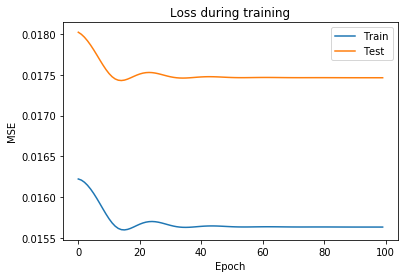

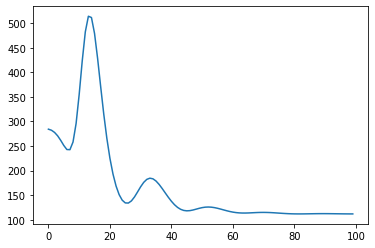

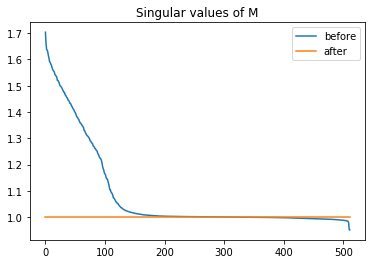

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_glint360k_r100FC_1_rotonly (AUC = 98.8028%)]


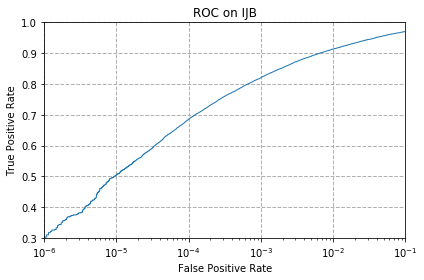

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  0.303114  0.504014   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  0.685637  0.820627   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  0.913688  0.970599   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_glin...      MS1M  ResNet50   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_glin...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_glin...  ResNet100  PartialFC_r1.0

saving to ../../../../results/ijbc_embs_arc_res50_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_emb

[*] Epoch: 10, Train loss: 3.4677e-05, Test loss: 3.3867e-05, Rot loss: 2.1160e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.8688e-05, Test loss: 2.8715e-05, Rot loss: 1.0804e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.7370e-05, Test loss: 2.7667e-05, Rot loss: 5.7078e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.6086e-05, Test loss: 2.6288e-05, Rot loss: 2.8225e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.4232e-05, Test loss: 2.4493e-05, Rot loss: 1.5480e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.2894e-05, Test loss: 2.3254e-05, Rot loss: 8.8108e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.1916e-05, Test loss: 2.2312e-05, Rot loss: 5.3761e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.1072e-05, Test loss: 2.1500e-05, Rot loss: 3.5712e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.0529e-05, Test loss: 2.1002e-05, Rot loss: 2.2592e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.0179e-05, Test loss: 2.0657e-05, Rot loss: 1.7766e+00, LR : 1.00e+02



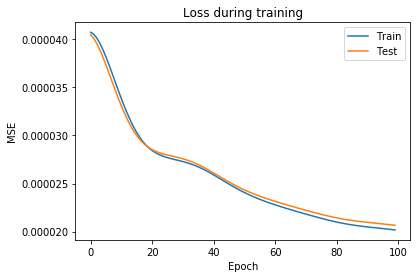

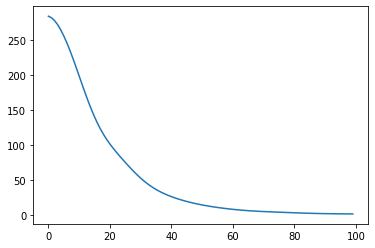

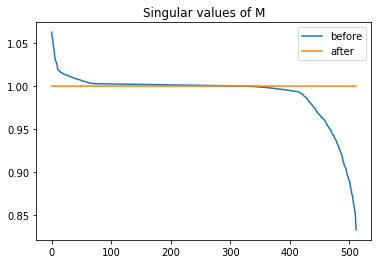

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 98.8324%)]


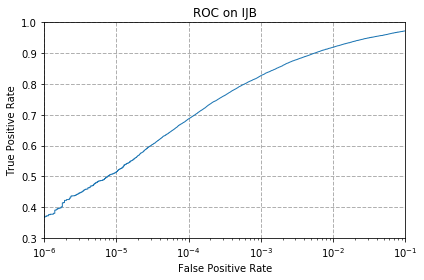

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.370353  0.514394   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.686608  0.826967   

Methods                                                 0.01      0.1  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.919364  0.97244   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...      MS1M  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  ArcFace      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  MobileNetV2  ArcFace

saving to ../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2

[*] Epoch: 10, Train loss: 1.0769e-04, Test loss: 1.0447e-04, Rot loss: 2.0968e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 8.2639e-05, Test loss: 8.2379e-05, Rot loss: 1.1910e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 8.0215e-05, Test loss: 8.0984e-05, Rot loss: 5.8616e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.7433e-05, Test loss: 7.7812e-05, Rot loss: 2.9164e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 7.4140e-05, Test loss: 7.4942e-05, Rot loss: 1.8253e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.4035e-05, Test loss: 7.4940e-05, Rot loss: 1.0570e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.3646e-05, Test loss: 7.4522e-05, Rot loss: 7.6308e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.3378e-05, Test loss: 7.4308e-05, Rot loss: 6.5445e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.3393e-05, Test loss: 7.4331e-05, Rot loss: 5.8685e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.3301e-05, Test loss: 7.4241e-05, Rot loss: 5.7633e+00, LR : 1.00e+02



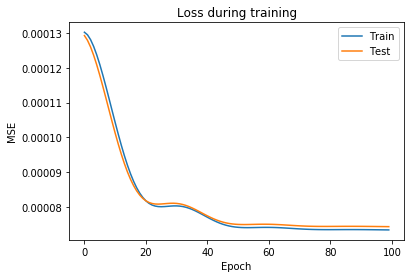

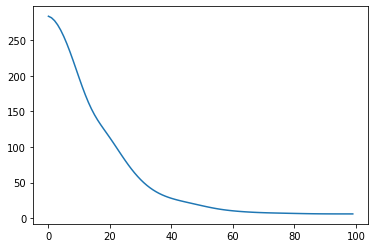

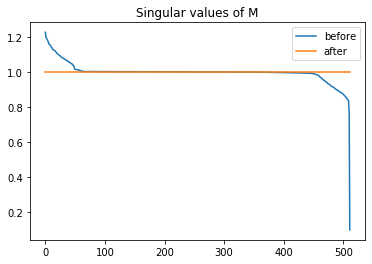

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 99.1911%)]


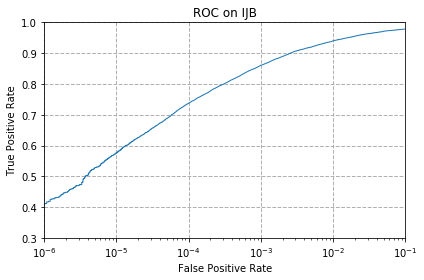

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_vggf...  0.412078  0.576673   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_vggf...  0.737332  0.860868   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_vggf...  0.940226  0.978678   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_vggf...      MS1M  ResNet50   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_vggf...  ArcFace  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_vggf...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_vggf...  CenterLoss

saving to ../../../../results/ijbc_embs_arc_res50_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_

[*] Epoch: 10, Train loss: 1.1201e-04, Test loss: 1.0984e-04, Rot loss: 2.1085e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 9.1084e-05, Test loss: 9.1256e-05, Rot loss: 1.1586e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 8.6940e-05, Test loss: 8.7866e-05, Rot loss: 5.9560e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 8.3815e-05, Test loss: 8.4559e-05, Rot loss: 2.8628e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 8.0091e-05, Test loss: 8.1104e-05, Rot loss: 1.6117e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.8558e-05, Test loss: 7.9677e-05, Rot loss: 8.9884e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.7466e-05, Test loss: 7.8589e-05, Rot loss: 5.7632e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.6515e-05, Test loss: 7.7668e-05, Rot loss: 4.4286e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.5977e-05, Test loss: 7.7148e-05, Rot loss: 3.7171e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.5600e-05, Test loss: 7.6776e-05, Rot loss: 3.2324e+00, LR : 1.00e+02



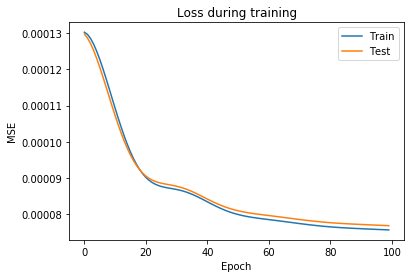

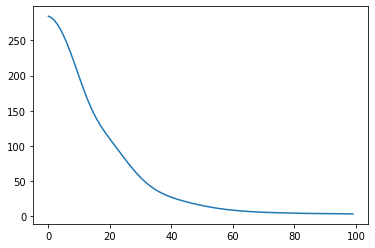

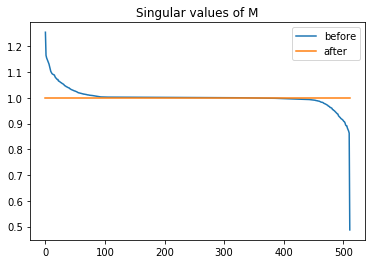

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_casia_ir2_ijbc_embs_rotonly (AUC = 98.9688%)]


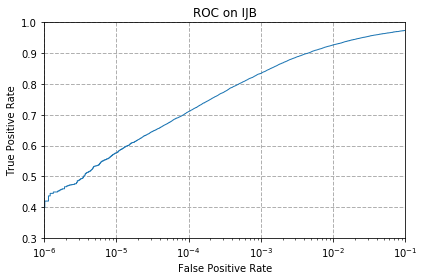

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_casi...  0.419747  0.576724   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_casi...  0.710538  0.834484   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_casi...  0.926778  0.974025   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_casi...      MS1M  ResNet50   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_casi...  ArcFace  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_casi...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_casi...  CenterLoss

saving to ../../../../results/ijbc_embs_arc_res50_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/red/b/nob

[*] Epoch: 10, Train loss: 4.7077e-05, Test loss: 4.6384e-05, Rot loss: 6.5081e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.1552e-05, Test loss: 4.1043e-05, Rot loss: 6.1088e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.8187e-05, Test loss: 3.7905e-05, Rot loss: 5.8010e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.6459e-05, Test loss: 3.6331e-05, Rot loss: 5.5763e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.5607e-05, Test loss: 3.5579e-05, Rot loss: 5.4420e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.5173e-05, Test loss: 3.5207e-05, Rot loss: 5.3715e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 3.4895e-05, Test loss: 3.4965e-05, Rot loss: 5.3308e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 3.4631e-05, Test loss: 3.4721e-05, Rot loss: 5.3018e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 3.4324e-05, Test loss: 3.4427e-05, Rot loss: 5.2803e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 3.3969e-05, Test loss: 3.4083e-05, Rot loss: 5.2650e+02, LR : 1.00e+02



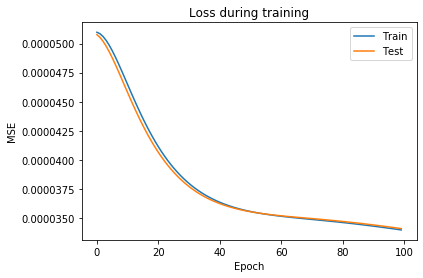

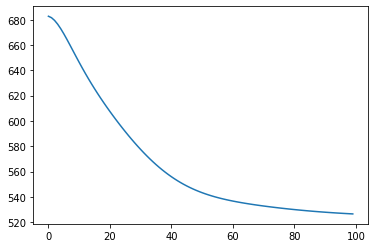

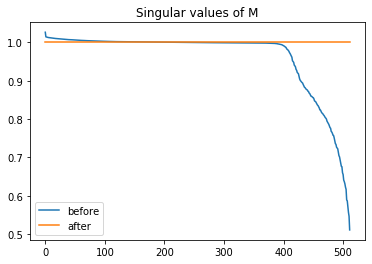

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 98.1631%)]


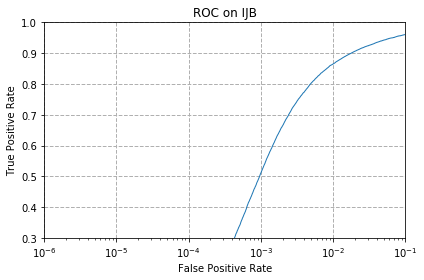

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.001125  0.004039   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.065757  0.510866   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.865061  0.960526   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...      MS1M  ResNet50   

Methods                                              L_HEAD R_DATASET  R_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  ArcFace      MS1M  64-CNN   

Methods                                                     R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  SphereFace+PFE

saving to ../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy
>>>> Reload (right) embeddings from: /s/r

[*] Epoch: 10, Train loss: 4.6420e-05, Test loss: 4.5786e-05, Rot loss: 6.5092e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.9963e-05, Test loss: 3.9666e-05, Rot loss: 6.1058e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.5829e-05, Test loss: 3.5924e-05, Rot loss: 5.7890e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.3600e-05, Test loss: 3.3980e-05, Rot loss: 5.5529e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.2465e-05, Test loss: 3.3037e-05, Rot loss: 5.4078e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.1868e-05, Test loss: 3.2561e-05, Rot loss: 5.3284e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 3.1465e-05, Test loss: 3.2235e-05, Rot loss: 5.2822e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 3.1073e-05, Test loss: 3.1894e-05, Rot loss: 5.2515e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 3.0627e-05, Test loss: 3.1487e-05, Rot loss: 5.2311e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 3.0137e-05, Test loss: 3.1033e-05, Rot loss: 5.2183e+02, LR : 1.00e+02



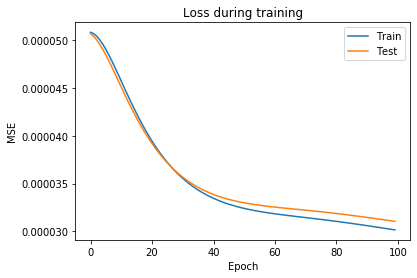

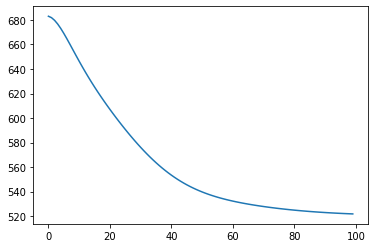

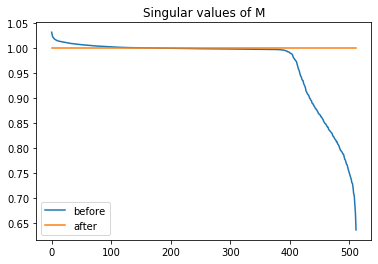

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 98.8035%)]


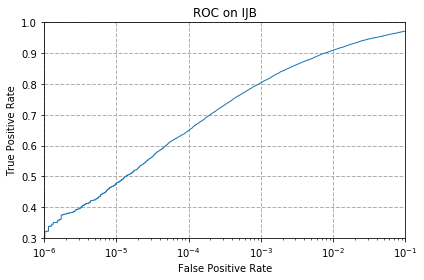

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.320601  0.478652   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.649026  0.804162   

Methods                                                 0.01      0.1  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  0.909444  0.97157   

Methods                                            L_DATASET    L_ARCH  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...      MS1M  ResNet50   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  ArcFace  CASIA-WebFace   

Methods                                             R_ARCH          R_HEAD  
../../../../results/ijbc_embs_arc_res50_TO_ijbc...  64-CNN  SphereFace+PFE

saving to ../../../../results/ijbc_embs_arc_res50_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/

[*] Epoch: 10, Train loss: 1.4142e-02, Test loss: 1.4242e-02, Rot loss: 6.4100e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.4281e-02, Test loss: 1.4444e-02, Rot loss: 1.8226e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.4143e-02, Test loss: 1.4305e-02, Rot loss: 3.0290e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.4185e-02, Test loss: 1.4340e-02, Rot loss: 1.7838e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.4166e-02, Test loss: 1.4327e-02, Rot loss: 1.8903e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.4166e-02, Test loss: 1.4325e-02, Rot loss: 1.8039e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.4167e-02, Test loss: 1.4326e-02, Rot loss: 1.7407e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.4165e-02, Test loss: 1.4325e-02, Rot loss: 1.7459e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.4165e-02, Test loss: 1.4325e-02, Rot loss: 1.7304e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.4165e-02, Test loss: 1.4325e-02, Rot loss: 1.7302e+02, LR : 1.00e+02



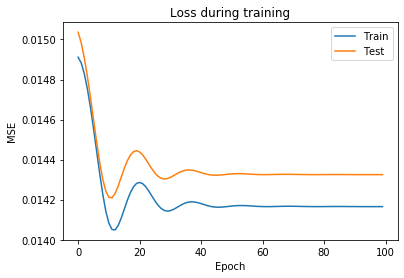

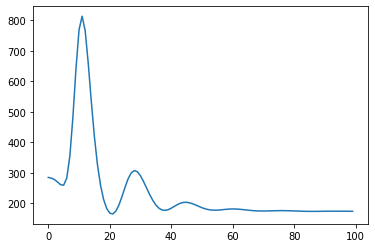

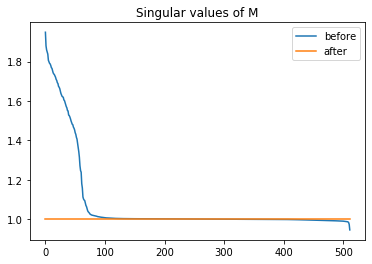

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 98.4637%)]


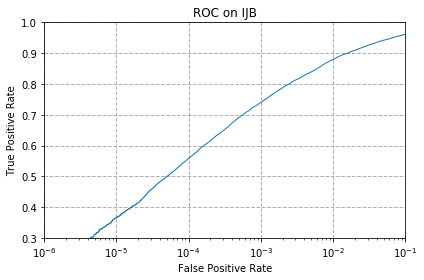

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV...  0.161323  0.366058   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV...  0.558214  0.740195   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV...  0.879123  0.961139   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV...      MS1M  MobileNetV2   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV...  ArcFace    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV...  ResNet100  ArcFace

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobacku

[*] Epoch: 10, Train loss: 1.3526e-02, Test loss: 1.4700e-02, Rot loss: 1.3638e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3898e-02, Test loss: 1.5032e-02, Rot loss: 3.3976e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3764e-02, Test loss: 1.4944e-02, Rot loss: 4.0381e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3746e-02, Test loss: 1.4921e-02, Rot loss: 3.7290e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3742e-02, Test loss: 1.4917e-02, Rot loss: 3.5701e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3741e-02, Test loss: 1.4916e-02, Rot loss: 3.4725e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3741e-02, Test loss: 1.4916e-02, Rot loss: 3.4291e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3739e-02, Test loss: 1.4915e-02, Rot loss: 3.4381e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3739e-02, Test loss: 1.4914e-02, Rot loss: 3.4353e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3739e-02, Test loss: 1.4914e-02, Rot loss: 3.4274e+02, LR : 1.00e+02



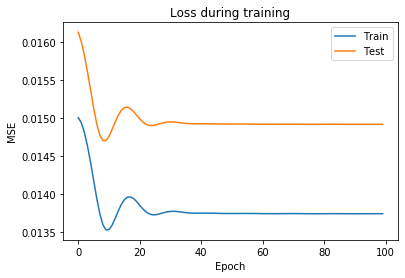

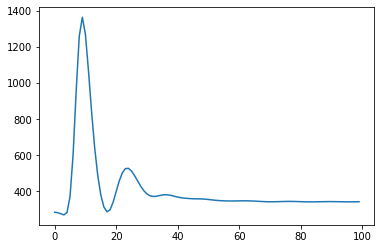

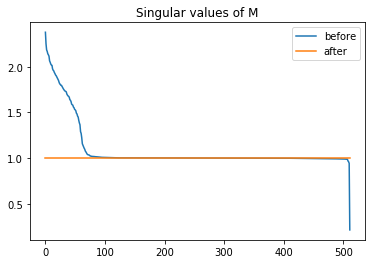

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.2571%)]


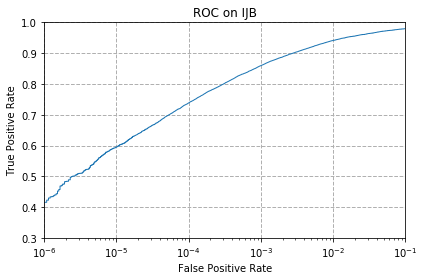

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-...  0.415964  0.595286   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-...  0.738355  0.859641   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-...  0.941607  0.979649   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-...      MS1M  MobileNetV2   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-...  ArcFace  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/porta

[*] Epoch: 10, Train loss: 1.5978e-02, Test loss: 1.7989e-02, Rot loss: 5.3778e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.6062e-02, Test loss: 1.8141e-02, Rot loss: 1.8254e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5958e-02, Test loss: 1.8022e-02, Rot loss: 2.6498e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5992e-02, Test loss: 1.8059e-02, Rot loss: 1.5347e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5970e-02, Test loss: 1.8039e-02, Rot loss: 1.7123e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5976e-02, Test loss: 1.8042e-02, Rot loss: 1.5319e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5974e-02, Test loss: 1.8041e-02, Rot loss: 1.5235e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5973e-02, Test loss: 1.8040e-02, Rot loss: 1.5209e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5973e-02, Test loss: 1.8041e-02, Rot loss: 1.5000e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5973e-02, Test loss: 1.8040e-02, Rot loss: 1.5010e+02, LR : 1.00e+02



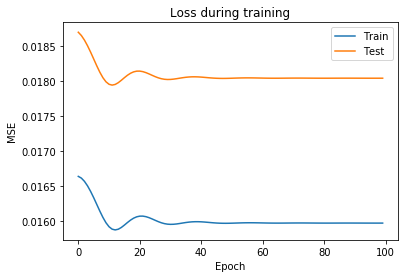

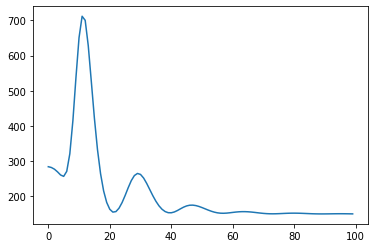

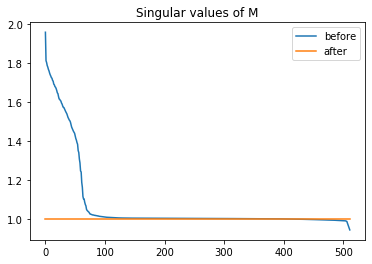

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_glint360k_r100FC_0_rotonly (AUC = 98.5368%)]


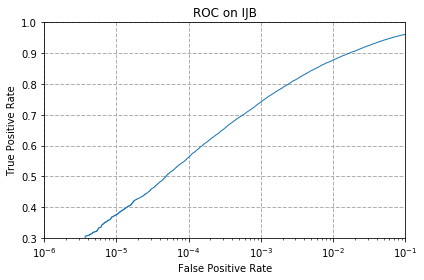

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  0.226466  0.375364   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  0.561896  0.741423   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  0.878049  0.961395   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...      MS1M  MobileNetV2   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  ResNet100  PartialFC_r0.1

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbio

[*] Epoch: 10, Train loss: 1.5895e-02, Test loss: 1.7687e-02, Rot loss: 2.8884e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5833e-02, Test loss: 1.7674e-02, Rot loss: 1.9151e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5833e-02, Test loss: 1.7657e-02, Rot loss: 1.2329e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5821e-02, Test loss: 1.7653e-02, Rot loss: 1.0371e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5822e-02, Test loss: 1.7651e-02, Rot loss: 8.3346e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5819e-02, Test loss: 1.7650e-02, Rot loss: 8.0432e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5820e-02, Test loss: 1.7650e-02, Rot loss: 7.5477e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5819e-02, Test loss: 1.7649e-02, Rot loss: 7.4306e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5819e-02, Test loss: 1.7649e-02, Rot loss: 7.3706e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5818e-02, Test loss: 1.7649e-02, Rot loss: 7.3434e+01, LR : 1.00e+02



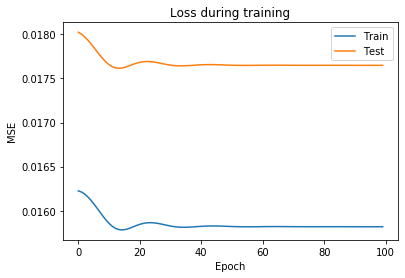

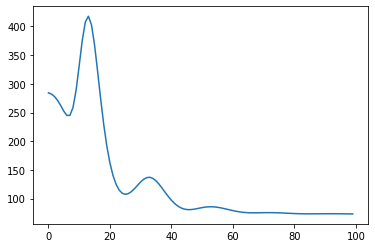

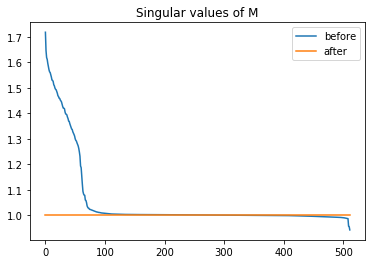

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_glint360k_r100FC_1_rotonly (AUC = 97.2732%)]


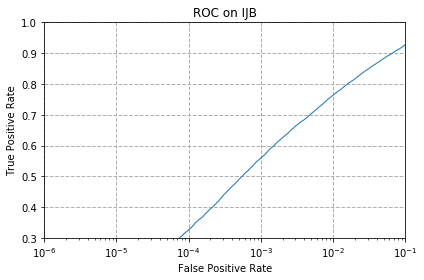

Methods                                               1e-06    1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  0.05057  0.13862   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  0.326073  0.560157   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  0.764074  0.927647   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...      MS1M  MobileNetV2   

Methods                                              L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  ArcFace  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_glint...  ResNet100  PartialFC_r1.0

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_

[*] Epoch: 10, Train loss: 3.3012e-05, Test loss: 3.2033e-05, Rot loss: 2.1160e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.6795e-05, Test loss: 2.6778e-05, Rot loss: 1.0853e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.5559e-05, Test loss: 2.5805e-05, Rot loss: 5.8120e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.4687e-05, Test loss: 2.4952e-05, Rot loss: 2.9693e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.3689e-05, Test loss: 2.4026e-05, Rot loss: 1.5966e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.2857e-05, Test loss: 2.3246e-05, Rot loss: 9.1466e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.1937e-05, Test loss: 2.2338e-05, Rot loss: 5.6783e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.1093e-05, Test loss: 2.1518e-05, Rot loss: 3.8664e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.0476e-05, Test loss: 2.0927e-05, Rot loss: 2.9499e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.9947e-05, Test loss: 2.0419e-05, Rot loss: 2.5714e+00, LR : 1.00e+02



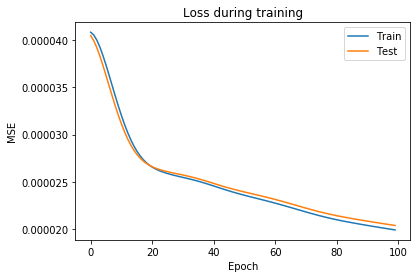

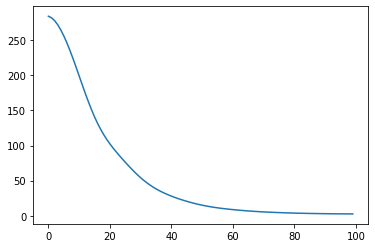

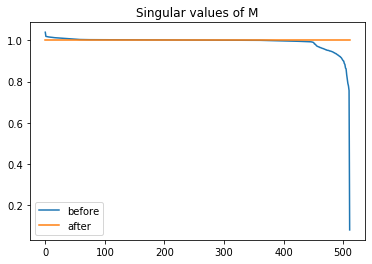

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_arc_res50_rotonly (AUC = 98.9565%)]


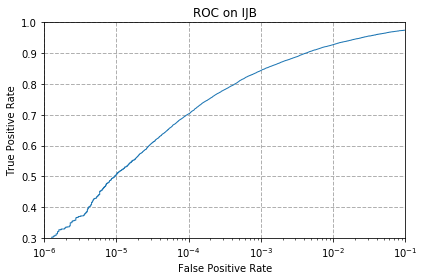

Methods                                                1e-06    1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.278315  0.50565   

Methods                                               0.0001    0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.703022  0.84379   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.927801  0.974741   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...      MS1M  MobileNetV2   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  ArcFace      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir

[*] Epoch: 10, Train loss: 9.5653e-05, Test loss: 9.1912e-05, Rot loss: 2.0971e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.0058e-05, Test loss: 7.0878e-05, Rot loss: 1.1979e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 6.9555e-05, Test loss: 7.0723e-05, Rot loss: 5.6496e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 6.5994e-05, Test loss: 6.7076e-05, Rot loss: 2.8381e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 6.3912e-05, Test loss: 6.5417e-05, Rot loss: 1.5858e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 6.3625e-05, Test loss: 6.5111e-05, Rot loss: 8.5424e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 6.3065e-05, Test loss: 6.4586e-05, Rot loss: 6.1981e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 6.2824e-05, Test loss: 6.4373e-05, Rot loss: 4.6406e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 6.2791e-05, Test loss: 6.4342e-05, Rot loss: 3.6971e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 6.2809e-05, Test loss: 6.4338e-05, Rot loss: 3.3344e+00, LR : 1.00e+02



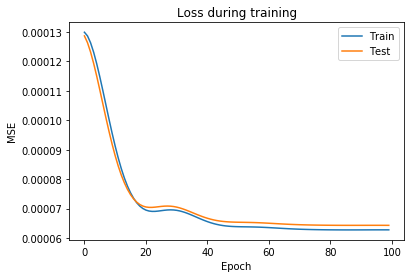

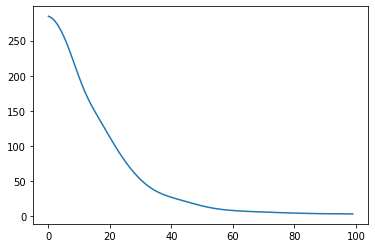

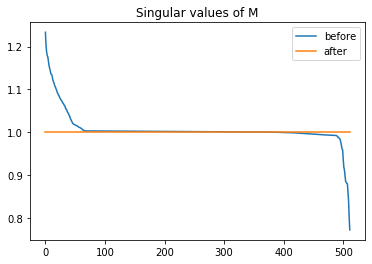

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 99.2790%)]


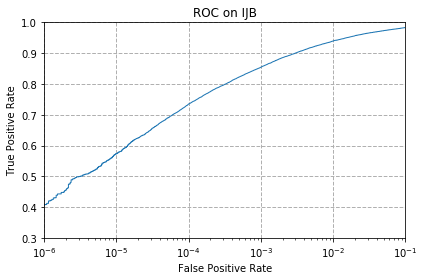

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...  0.408652  0.573605   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...  0.735133  0.854579   

Methods                                                0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...  0.93951  0.983331   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...      MS1M  MobileNetV2   

Methods                                              L_HEAD R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...  ArcFace  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_vggfa...  CenterLoss

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc

[*] Epoch: 10, Train loss: 1.0044e-04, Test loss: 9.7809e-05, Rot loss: 2.0948e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 7.9492e-05, Test loss: 8.0659e-05, Rot loss: 1.1488e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 7.7623e-05, Test loss: 7.9050e-05, Rot loss: 5.5743e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 7.4437e-05, Test loss: 7.5976e-05, Rot loss: 2.6802e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 7.2124e-05, Test loss: 7.3842e-05, Rot loss: 1.3731e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.1005e-05, Test loss: 7.2816e-05, Rot loss: 7.0583e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.0234e-05, Test loss: 7.2079e-05, Rot loss: 4.1310e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 6.9602e-05, Test loss: 7.1477e-05, Rot loss: 2.9455e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 6.9289e-05, Test loss: 7.1191e-05, Rot loss: 2.0976e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 6.9055e-05, Test loss: 7.0958e-05, Rot loss: 1.8698e+00, LR : 1.00e+02



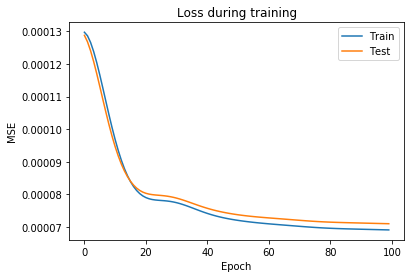

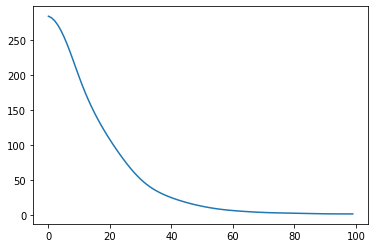

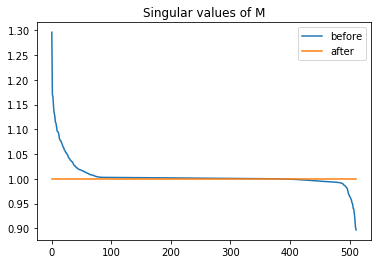

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_casia_ir2_ijbc_embs_rotonly (AUC = 99.0387%)]


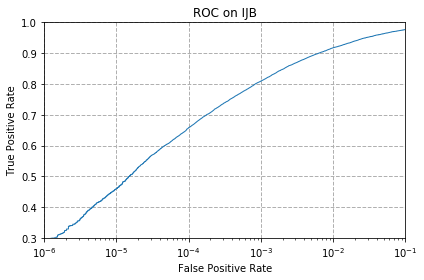

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_casia...  0.291763  0.459631   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_casia...  0.658025  0.809224   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_casia...  0.917472  0.976786   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_casia...      MS1M  MobileNetV2   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_casia...  ArcFace  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_casia...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_casia...  CenterLoss

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b/nobacku

[*] Epoch: 10, Train loss: 4.4963e-05, Test loss: 4.4029e-05, Rot loss: 6.5176e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.7782e-05, Test loss: 3.7175e-05, Rot loss: 6.1208e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.4340e-05, Test loss: 3.4010e-05, Rot loss: 5.8041e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.2860e-05, Test loss: 3.2670e-05, Rot loss: 5.5765e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.2198e-05, Test loss: 3.2091e-05, Rot loss: 5.4498e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.1927e-05, Test loss: 3.1875e-05, Rot loss: 5.3927e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 3.1841e-05, Test loss: 3.1819e-05, Rot loss: 5.3648e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 3.1814e-05, Test loss: 3.1808e-05, Rot loss: 5.3447e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 3.1782e-05, Test loss: 3.1784e-05, Rot loss: 5.3286e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 3.1719e-05, Test loss: 3.1727e-05, Rot loss: 5.3166e+02, LR : 1.00e+02



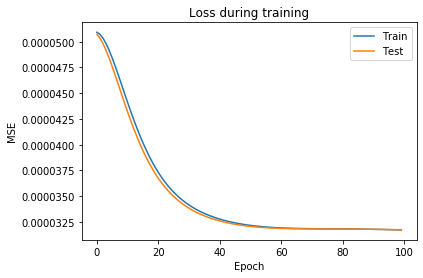

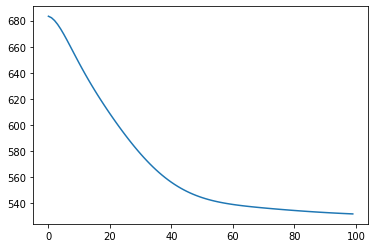

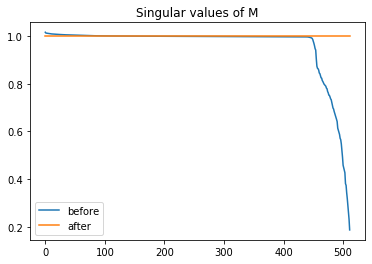

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 96.6761%)]


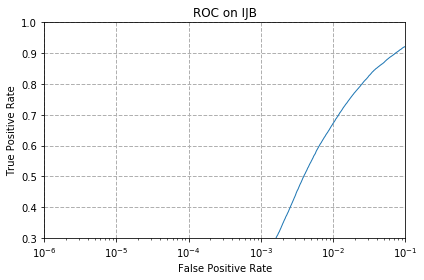

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.000051  0.000205   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.009562  0.203917   

Methods                                                0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.67224  0.922176   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...      MS1M  MobileNetV2   

Methods                                              L_HEAD R_DATASET  R_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  ArcFace      MS1M  64-CNN   

Methods                                                     R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  SphereFace+PFE

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy
>>>> Reload (right) embeddings from: /s/red/b

[*] Epoch: 10, Train loss: 4.4129e-05, Test loss: 4.3226e-05, Rot loss: 6.5082e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.5690e-05, Test loss: 3.5358e-05, Rot loss: 6.1061e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.1562e-05, Test loss: 3.1710e-05, Rot loss: 5.7765e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.9839e-05, Test loss: 3.0244e-05, Rot loss: 5.5358e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.9124e-05, Test loss: 2.9675e-05, Rot loss: 5.3976e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.8851e-05, Test loss: 2.9493e-05, Rot loss: 5.3309e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8748e-05, Test loss: 2.9445e-05, Rot loss: 5.2964e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.8665e-05, Test loss: 2.9401e-05, Rot loss: 5.2734e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.8544e-05, Test loss: 2.9309e-05, Rot loss: 5.2571e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.8377e-05, Test loss: 2.9168e-05, Rot loss: 5.2463e+02, LR : 1.00e+02



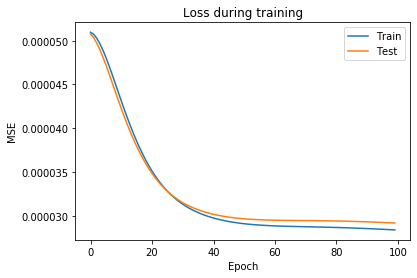

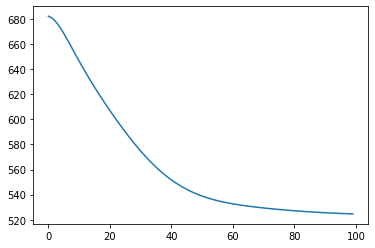

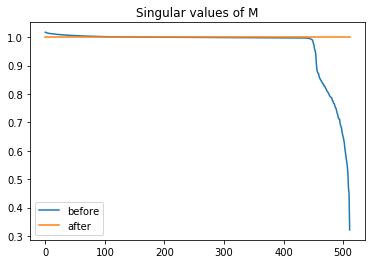

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 98.3710%)]


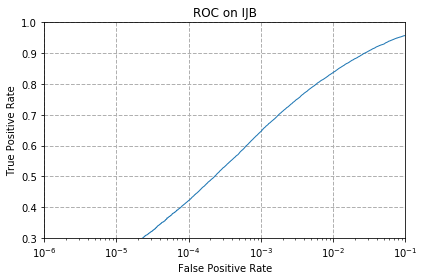

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.131615  0.247073   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.421435  0.645549   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  0.837347  0.957969   

Methods                                            L_DATASET       L_ARCH  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...      MS1M  MobileNetV2   

Methods                                              L_HEAD      R_DATASET  \
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  ArcFace  CASIA-WebFace   

Methods                                             R_ARCH          R_HEAD  
../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_...  64-CNN  SphereFace+PFE

saving to ../../../../results/ijbc_embs_arc_mbv2_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/r

[*] Epoch: 10, Train loss: 1.3264e-02, Test loss: 1.3488e-02, Rot loss: 1.5048e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3626e-02, Test loss: 1.3693e-02, Rot loss: 3.8057e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3609e-02, Test loss: 1.3751e-02, Rot loss: 2.6750e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3526e-02, Test loss: 1.3678e-02, Rot loss: 3.4450e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3527e-02, Test loss: 1.3671e-02, Rot loss: 3.1982e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3532e-02, Test loss: 1.3674e-02, Rot loss: 3.0156e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3532e-02, Test loss: 1.3675e-02, Rot loss: 2.9795e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3531e-02, Test loss: 1.3675e-02, Rot loss: 2.9717e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3530e-02, Test loss: 1.3674e-02, Rot loss: 2.9774e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3531e-02, Test loss: 1.3674e-02, Rot loss: 2.9717e+02, LR : 1.00e+02



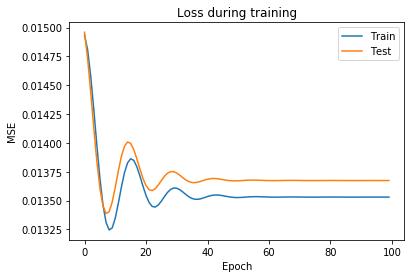

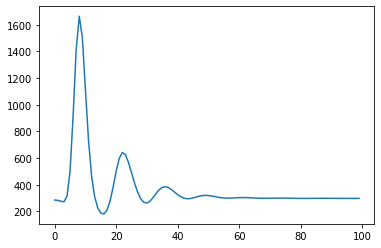

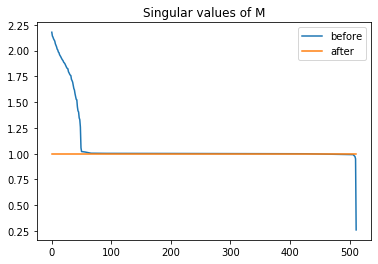

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 98.5084%)]


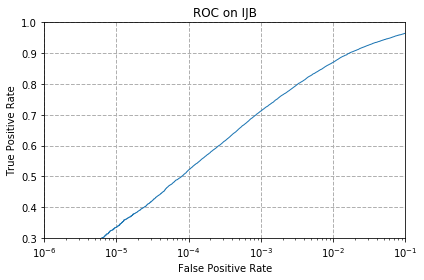

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  0.184128  0.334765   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  0.520581  0.712328   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  0.870532  0.964821   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  CenterLoss    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_M...  ResNet100  ArcFace

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b

[*] Epoch: 10, Train loss: 1.2016e-02, Test loss: 1.3511e-02, Rot loss: 1.7465e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.2029e-02, Test loss: 1.3166e-02, Rot loss: 1.2975e+03, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.2164e-02, Test loss: 1.3281e-02, Rot loss: 8.4580e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2129e-02, Test loss: 1.3261e-02, Rot loss: 8.0224e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.2117e-02, Test loss: 1.3247e-02, Rot loss: 7.8476e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.2116e-02, Test loss: 1.3246e-02, Rot loss: 7.7086e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.2116e-02, Test loss: 1.3247e-02, Rot loss: 7.6451e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.2117e-02, Test loss: 1.3248e-02, Rot loss: 7.6130e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.2117e-02, Test loss: 1.3249e-02, Rot loss: 7.5953e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.2117e-02, Test loss: 1.3249e-02, Rot loss: 7.5942e+02, LR : 1.00e+02



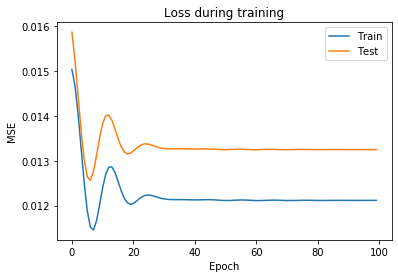

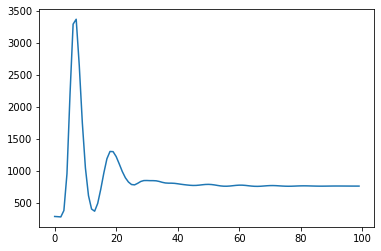

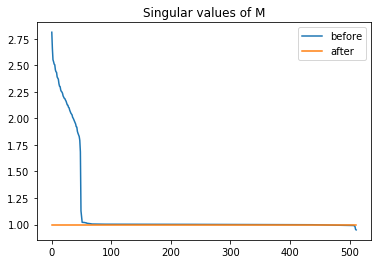

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.4616%)]


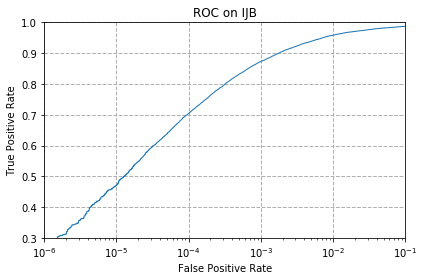

Methods                                              1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  0.2754  0.470624   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  0.703993  0.873191   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  0.958685  0.987779   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  CenterLoss  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_V...  ResNet50  ArcFace

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/da

[*] Epoch: 10, Train loss: 1.5194e-02, Test loss: 1.7260e-02, Rot loss: 1.3813e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5553e-02, Test loss: 1.7520e-02, Rot loss: 2.7624e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5484e-02, Test loss: 1.7523e-02, Rot loss: 2.4977e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5416e-02, Test loss: 1.7451e-02, Rot loss: 3.0935e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5428e-02, Test loss: 1.7456e-02, Rot loss: 2.6478e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5431e-02, Test loss: 1.7459e-02, Rot loss: 2.5065e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5429e-02, Test loss: 1.7458e-02, Rot loss: 2.4991e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5428e-02, Test loss: 1.7458e-02, Rot loss: 2.5021e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5428e-02, Test loss: 1.7457e-02, Rot loss: 2.4938e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5428e-02, Test loss: 1.7458e-02, Rot loss: 2.4809e+02, LR : 1.00e+02



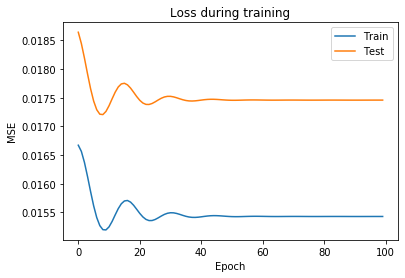

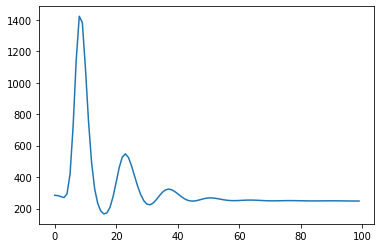

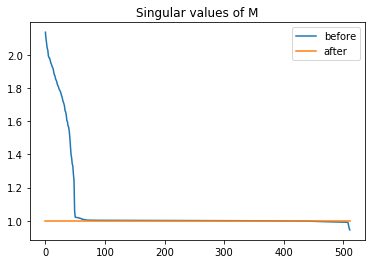

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_glint360k_r100FC_0_rotonly (AUC = 98.3016%)]


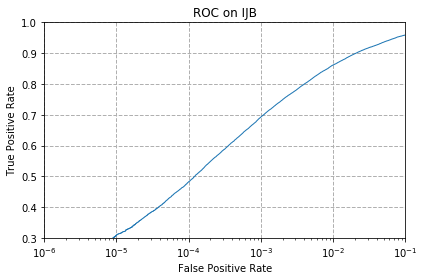

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  0.161272  0.308687   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  0.482231  0.692693   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  0.861737  0.959094   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  InceptionResNetV1   

Methods                                                 L_HEAD  R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  CenterLoss  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  ResNet100  PartialFC_r0.1

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/porta

[*] Epoch: 10, Train loss: 1.5542e-02, Test loss: 1.7374e-02, Rot loss: 6.4418e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5707e-02, Test loss: 1.7525e-02, Rot loss: 1.1679e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5593e-02, Test loss: 1.7436e-02, Rot loss: 1.9048e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5618e-02, Test loss: 1.7448e-02, Rot loss: 1.0215e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5610e-02, Test loss: 1.7446e-02, Rot loss: 9.6865e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5608e-02, Test loss: 1.7443e-02, Rot loss: 9.2428e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5609e-02, Test loss: 1.7444e-02, Rot loss: 8.7988e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5609e-02, Test loss: 1.7444e-02, Rot loss: 8.7738e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5609e-02, Test loss: 1.7443e-02, Rot loss: 8.7577e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5609e-02, Test loss: 1.7444e-02, Rot loss: 8.7244e+01, LR : 1.00e+02



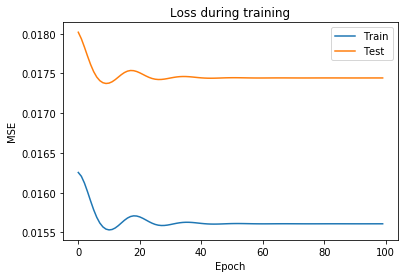

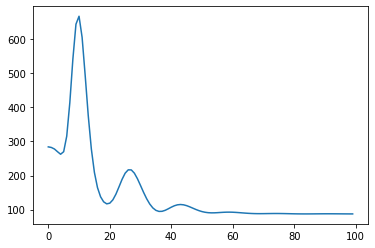

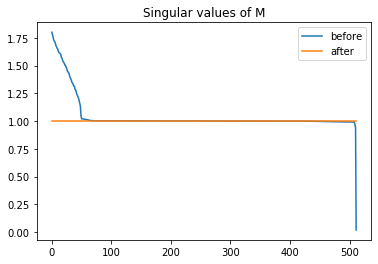

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_glint360k_r100FC_1_rotonly (AUC = 96.2103%)]


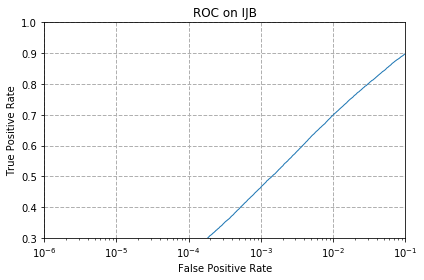

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  0.036406  0.099197   

Methods                                              0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  0.24968  0.464795   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  0.698829  0.898348   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  InceptionResNetV1   

Methods                                                 L_HEAD  R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  CenterLoss  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_g...  ResNet100  PartialFC_r1.0

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ij

[*] Epoch: 10, Train loss: 2.5529e-05, Test loss: 2.5103e-05, Rot loss: 2.2136e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.5693e-05, Test loss: 2.5741e-05, Rot loss: 1.1755e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.2667e-05, Test loss: 2.2824e-05, Rot loss: 7.2691e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.1588e-05, Test loss: 2.1885e-05, Rot loss: 5.0651e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.1682e-05, Test loss: 2.2069e-05, Rot loss: 4.3350e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.2176e-05, Test loss: 2.2567e-05, Rot loss: 3.9173e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.2464e-05, Test loss: 2.2842e-05, Rot loss: 3.6668e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.2631e-05, Test loss: 2.3019e-05, Rot loss: 3.4906e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.2783e-05, Test loss: 2.3184e-05, Rot loss: 3.3506e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.2934e-05, Test loss: 2.3345e-05, Rot loss: 3.2322e+01, LR : 1.00e+02



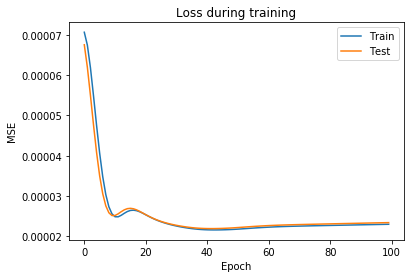

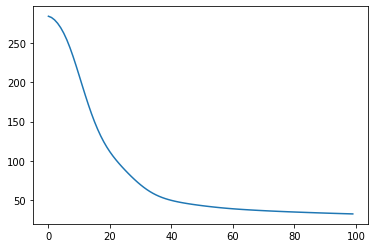

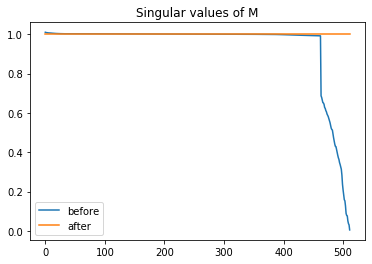

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_arc_res50_rotonly (AUC = 98.9350%)]


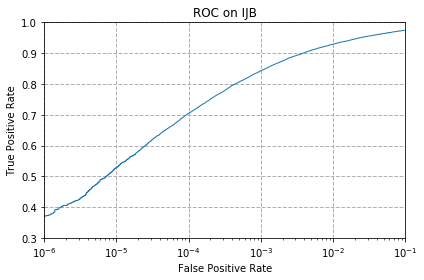

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.371836  0.528148   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.704351  0.842921   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.929028  0.974792   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  CenterLoss      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  ResNet50  ArcFace

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijb

[*] Epoch: 10, Train loss: 2.1132e-05, Test loss: 2.1153e-05, Rot loss: 2.2039e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.1042e-05, Test loss: 2.1352e-05, Rot loss: 1.1680e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.7698e-05, Test loss: 1.8103e-05, Rot loss: 7.2511e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.6819e-05, Test loss: 1.7456e-05, Rot loss: 4.9594e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.7023e-05, Test loss: 1.7722e-05, Rot loss: 4.1239e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.7390e-05, Test loss: 1.8127e-05, Rot loss: 3.6571e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.7643e-05, Test loss: 1.8397e-05, Rot loss: 3.3748e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.7810e-05, Test loss: 1.8582e-05, Rot loss: 3.1737e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.7962e-05, Test loss: 1.8752e-05, Rot loss: 3.0206e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.8095e-05, Test loss: 1.8896e-05, Rot loss: 2.9005e+01, LR : 1.00e+02



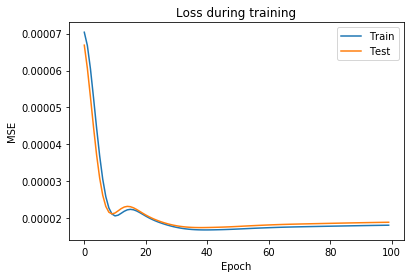

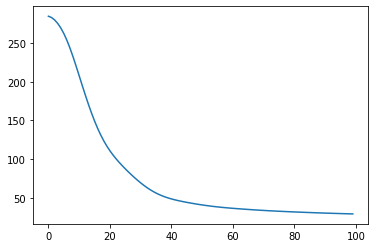

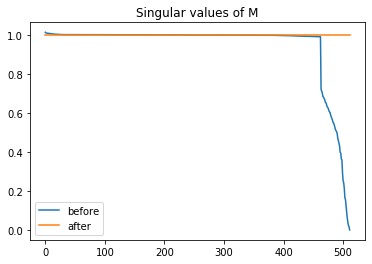

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 99.1031%)]


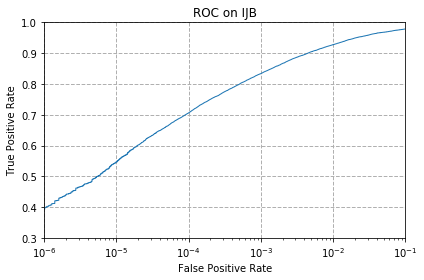

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.399601  0.546914   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.706243  0.833717   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.927699  0.978575   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  CenterLoss      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  MobileNetV2  ArcFace

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_

[*] Epoch: 10, Train loss: 6.2820e-05, Test loss: 6.6542e-05, Rot loss: 2.1649e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 6.0798e-05, Test loss: 6.3795e-05, Rot loss: 1.1003e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 5.6020e-05, Test loss: 5.9674e-05, Rot loss: 6.1861e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 5.5442e-05, Test loss: 5.9419e-05, Rot loss: 3.2447e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 5.5272e-05, Test loss: 5.9223e-05, Rot loss: 1.9419e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 5.5000e-05, Test loss: 5.9007e-05, Rot loss: 1.2943e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 5.4993e-05, Test loss: 5.9048e-05, Rot loss: 9.6569e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 5.4974e-05, Test loss: 5.9007e-05, Rot loss: 7.8476e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 5.4880e-05, Test loss: 5.8908e-05, Rot loss: 6.9587e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 5.4859e-05, Test loss: 5.8901e-05, Rot loss: 6.4000e+00, LR : 1.00e+02



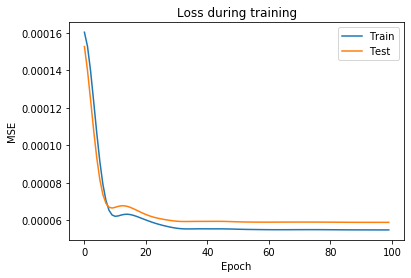

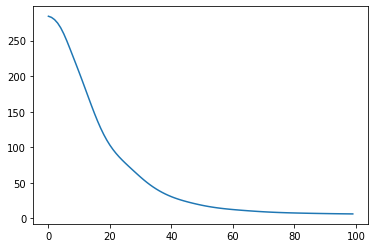

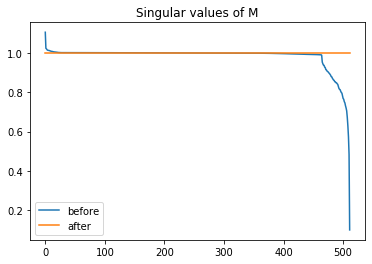

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_casia_ir2_ijbc_embs_rotonly (AUC = 99.2004%)]


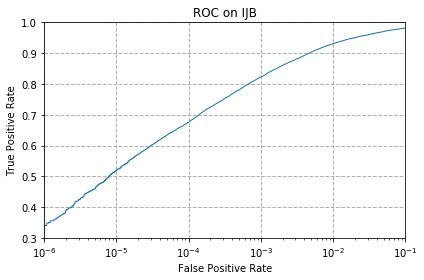

Methods                                                1e-06    1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  0.340338  0.52053   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  0.675768  0.822979   

Methods                                                0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  0.93092  0.981746   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  InceptionResNetV1   

Methods                                                 L_HEAD      R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  CenterLoss  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_c...  CenterLoss

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b

[*] Epoch: 10, Train loss: 4.8949e-05, Test loss: 4.4074e-05, Rot loss: 6.6342e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.2345e-05, Test loss: 3.2197e-05, Rot loss: 6.2967e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.0404e-05, Test loss: 3.0187e-05, Rot loss: 5.9464e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.8934e-05, Test loss: 2.8811e-05, Rot loss: 5.7211e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.8349e-05, Test loss: 2.8293e-05, Rot loss: 5.6153e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.8129e-05, Test loss: 2.8098e-05, Rot loss: 5.5841e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8053e-05, Test loss: 2.8026e-05, Rot loss: 5.5797e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.8030e-05, Test loss: 2.8005e-05, Rot loss: 5.5786e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.8026e-05, Test loss: 2.8001e-05, Rot loss: 5.5771e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.8028e-05, Test loss: 2.8004e-05, Rot loss: 5.5760e+02, LR : 1.00e+02



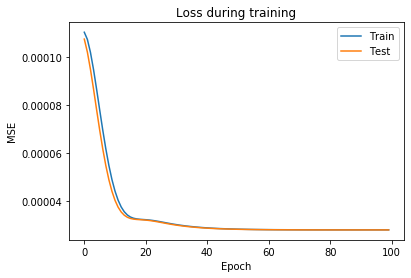

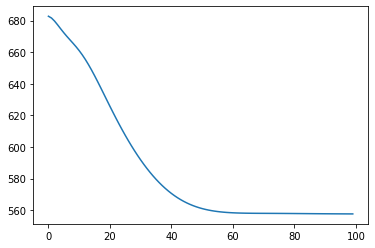

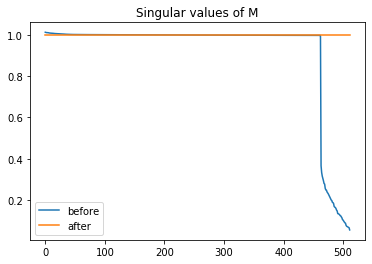

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 97.0339%)]


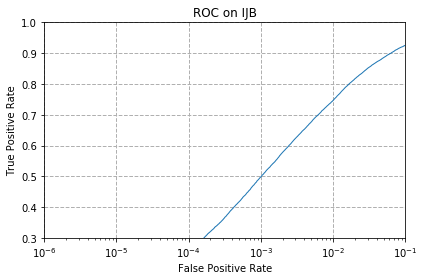

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.026589  0.086874   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.252033  0.498389   

Methods                                                 0.01      0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.747047  0.92596   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  CenterLoss      MS1M   

Methods                                             R_ARCH          R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  64-CNN  SphereFace+PFE

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: 

[*] Epoch: 10, Train loss: 4.5968e-05, Test loss: 4.1272e-05, Rot loss: 6.6265e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.8993e-05, Test loss: 2.9630e-05, Rot loss: 6.2724e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.7068e-05, Test loss: 2.7582e-05, Rot loss: 5.9179e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.5448e-05, Test loss: 2.6016e-05, Rot loss: 5.6956e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.4797e-05, Test loss: 2.5416e-05, Rot loss: 5.5911e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.4564e-05, Test loss: 2.5205e-05, Rot loss: 5.5591e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.4495e-05, Test loss: 2.5146e-05, Rot loss: 5.5538e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.4478e-05, Test loss: 2.5136e-05, Rot loss: 5.5518e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.4480e-05, Test loss: 2.5139e-05, Rot loss: 5.5494e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.4488e-05, Test loss: 2.5149e-05, Rot loss: 5.5475e+02, LR : 1.00e+02



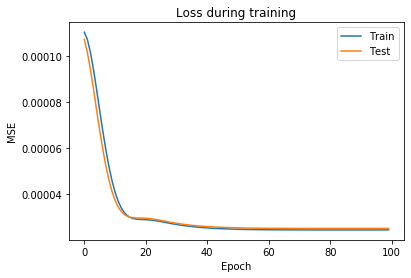

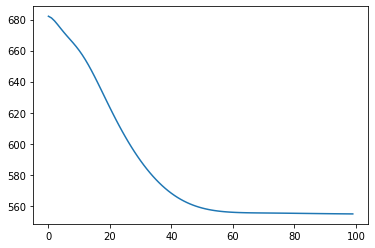

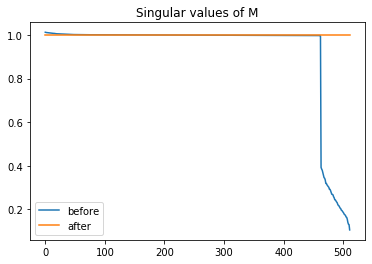

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 98.7842%)]


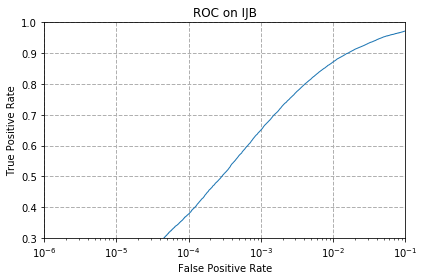

Methods                                                1e-06     1e-05  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.051235  0.172828   

Methods                                               0.0001     0.001  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.377972  0.650355   

Methods                                                 0.01       0.1  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  0.871759  0.972133   

Methods                                            L_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  VGGFace2   

Methods                                                        L_ARCH  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  InceptionResNetV1   

Methods                                                 L_HEAD      R_DATASET  \
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  CenterLoss  CASIA-WebFace   

Methods                                             R_ARCH          R_HEAD  
../../../../results/vggface2_ir2_ijbc_embs_TO_i...  64-CNN  SphereFace+PFE

saving to ../../../../results/vggface2_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/

[*] Epoch: 10, Train loss: 1.3153e-02, Test loss: 1.3350e-02, Rot loss: 1.5668e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3604e-02, Test loss: 1.3716e-02, Rot loss: 2.9046e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3439e-02, Test loss: 1.3623e-02, Rot loss: 3.8300e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3399e-02, Test loss: 1.3576e-02, Rot loss: 3.8807e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3410e-02, Test loss: 1.3583e-02, Rot loss: 3.4103e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3409e-02, Test loss: 1.3584e-02, Rot loss: 3.2983e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3406e-02, Test loss: 1.3581e-02, Rot loss: 3.3103e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3405e-02, Test loss: 1.3580e-02, Rot loss: 3.3054e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3405e-02, Test loss: 1.3580e-02, Rot loss: 3.2896e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3405e-02, Test loss: 1.3581e-02, Rot loss: 3.2823e+02, LR : 1.00e+02



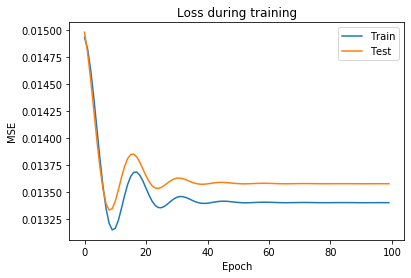

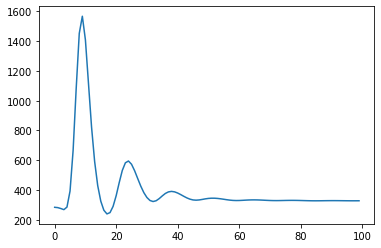

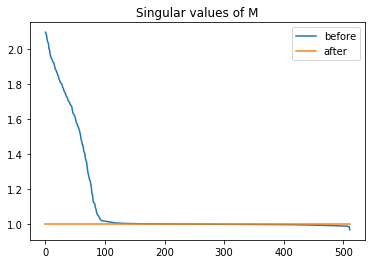

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 98.7840%)]


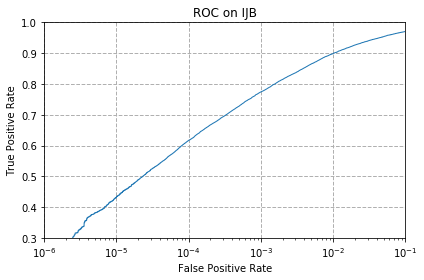

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  0.255458  0.432428   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  0.616812  0.774198   

Methods                                                 0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  0.898809  0.970599   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  CenterLoss    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_MS1M...  ResNet100  ArcFace

saving to ../../../../results/casia_ir2_ijbc_embs_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/da

[*] Epoch: 10, Train loss: 1.1981e-02, Test loss: 1.3363e-02, Rot loss: 2.1378e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.2322e-02, Test loss: 1.3449e-02, Rot loss: 1.0160e+03, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.2310e-02, Test loss: 1.3468e-02, Rot loss: 7.7975e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.2269e-02, Test loss: 1.3433e-02, Rot loss: 7.4464e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.2259e-02, Test loss: 1.3424e-02, Rot loss: 7.2341e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.2256e-02, Test loss: 1.3420e-02, Rot loss: 7.1456e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.2256e-02, Test loss: 1.3422e-02, Rot loss: 7.0767e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.2254e-02, Test loss: 1.3421e-02, Rot loss: 7.0897e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.2252e-02, Test loss: 1.3420e-02, Rot loss: 7.1008e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.2252e-02, Test loss: 1.3420e-02, Rot loss: 7.0893e+02, LR : 1.00e+02



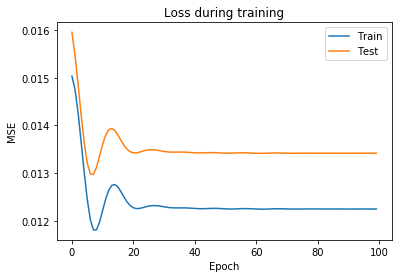

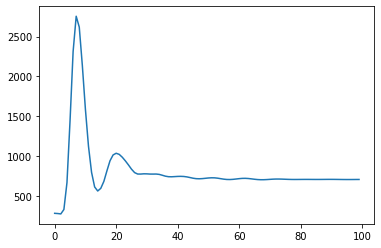

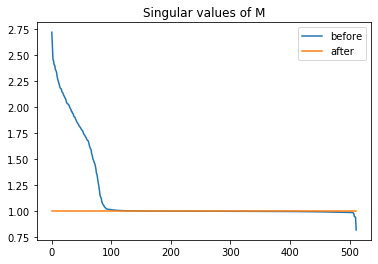

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.3866%)]


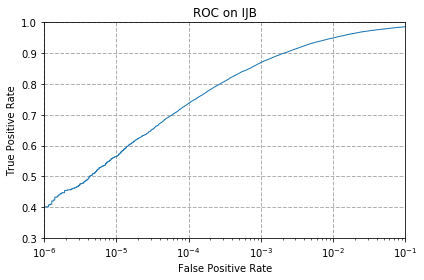

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  0.400931  0.564606   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  0.736974  0.869714   

Methods                                                0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  0.94943  0.986143   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  CenterLoss  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_VGG2...  ResNet50  ArcFace

saving to ../../../../results/casia_ir2_ijbc_embs_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/

[*] Epoch: 10, Train loss: 1.5048e-02, Test loss: 1.7098e-02, Rot loss: 1.4029e+03, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5458e-02, Test loss: 1.7483e-02, Rot loss: 2.4908e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5267e-02, Test loss: 1.7343e-02, Rot loss: 3.7981e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5254e-02, Test loss: 1.7316e-02, Rot loss: 3.4326e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5265e-02, Test loss: 1.7326e-02, Rot loss: 2.9803e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5260e-02, Test loss: 1.7324e-02, Rot loss: 2.9523e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5257e-02, Test loss: 1.7320e-02, Rot loss: 2.9591e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5257e-02, Test loss: 1.7320e-02, Rot loss: 2.9385e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5257e-02, Test loss: 1.7320e-02, Rot loss: 2.9234e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5257e-02, Test loss: 1.7320e-02, Rot loss: 2.9168e+02, LR : 1.00e+02



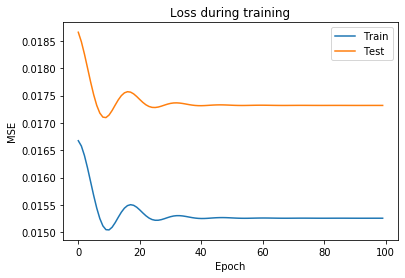

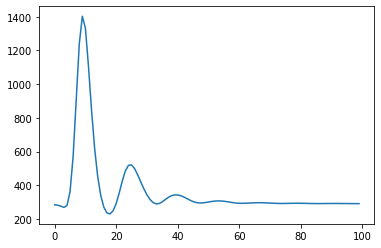

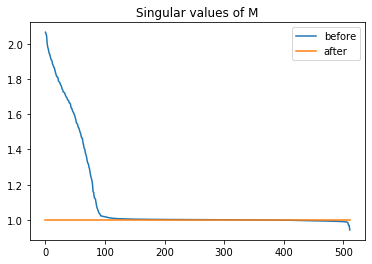

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_glint360k_r100FC_0_rotonly (AUC = 98.8108%)]


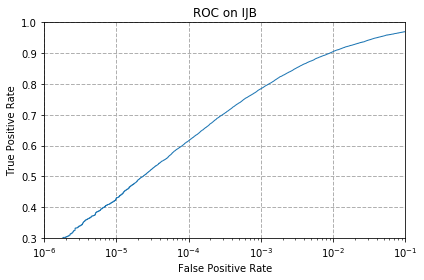

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  0.256277  0.429616   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  0.615585  0.784885   

Methods                                                 0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  0.905098  0.970292   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  InceptionResNetV1   

Methods                                                 L_HEAD  R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  CenterLoss  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_glin...  ResNet100  PartialFC_r0.1

saving to ../../../../results/casia_ir2_ijbc_embs_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/mo

[*] Epoch: 10, Train loss: 1.5375e-02, Test loss: 1.7215e-02, Rot loss: 6.5643e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5524e-02, Test loss: 1.7388e-02, Rot loss: 1.6275e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5393e-02, Test loss: 1.7265e-02, Rot loss: 2.5835e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5429e-02, Test loss: 1.7296e-02, Rot loss: 1.4071e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5411e-02, Test loss: 1.7283e-02, Rot loss: 1.5012e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5411e-02, Test loss: 1.7282e-02, Rot loss: 1.4102e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5413e-02, Test loss: 1.7283e-02, Rot loss: 1.3460e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5411e-02, Test loss: 1.7282e-02, Rot loss: 1.3585e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5411e-02, Test loss: 1.7282e-02, Rot loss: 1.3456e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5411e-02, Test loss: 1.7282e-02, Rot loss: 1.3433e+02, LR : 1.00e+02



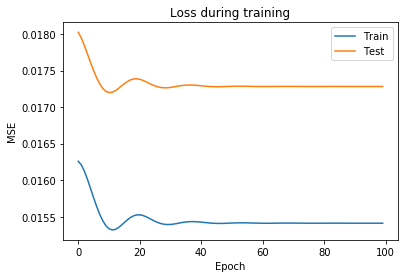

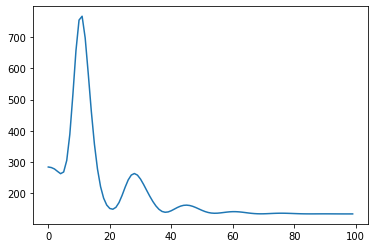

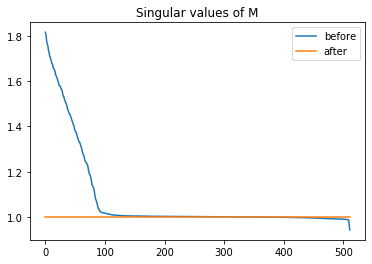

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_glint360k_r100FC_1_rotonly (AUC = 97.8621%)]


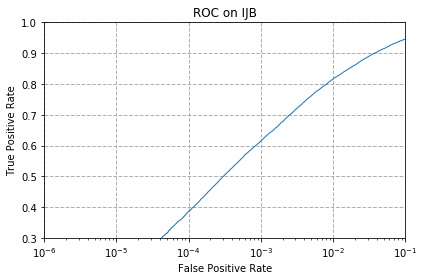

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  0.093982  0.188782   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  0.386051  0.615023   

Methods                                                 0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  0.816639  0.945799   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  InceptionResNetV1   

Methods                                                 L_HEAD  R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_glin...  CenterLoss  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_glin...  ResNet100  PartialFC_r1.0

saving to ../../../../results/casia_ir2_ijbc_embs_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_

[*] Epoch: 10, Train loss: 3.3552e-05, Test loss: 3.2263e-05, Rot loss: 2.2420e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.8103e-05, Test loss: 2.8761e-05, Rot loss: 1.2520e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.6645e-05, Test loss: 2.7557e-05, Rot loss: 7.9701e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.6305e-05, Test loss: 2.7372e-05, Rot loss: 5.7171e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.7144e-05, Test loss: 2.8393e-05, Rot loss: 4.7160e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.8166e-05, Test loss: 2.9427e-05, Rot loss: 4.0750e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8420e-05, Test loss: 2.9612e-05, Rot loss: 3.7149e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.8291e-05, Test loss: 2.9484e-05, Rot loss: 3.4995e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.8205e-05, Test loss: 2.9428e-05, Rot loss: 3.3325e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.8180e-05, Test loss: 2.9416e-05, Rot loss: 3.1967e+01, LR : 1.00e+02



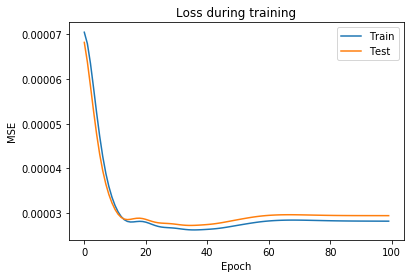

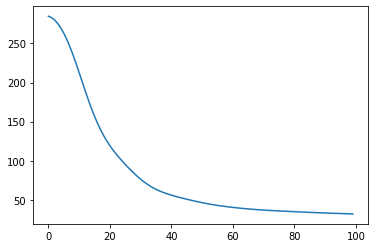

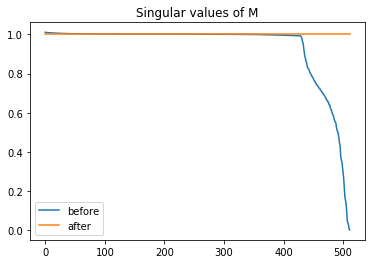

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_arc_res50_rotonly (AUC = 98.9558%)]


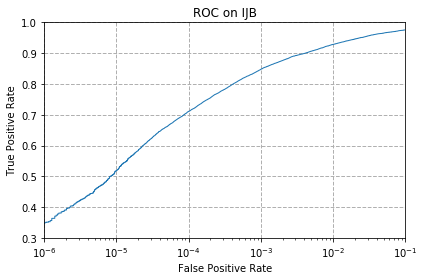

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.350821  0.518382   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.711152  0.847574   

Methods                                                 0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.928568  0.975712   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CenterLoss      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  ResNet50  ArcFace

saving to ../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_m

[*] Epoch: 10, Train loss: 2.9077e-05, Test loss: 2.8288e-05, Rot loss: 2.2244e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 2.3968e-05, Test loss: 2.4978e-05, Rot loss: 1.2361e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.1821e-05, Test loss: 2.3036e-05, Rot loss: 7.8803e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.1430e-05, Test loss: 2.2872e-05, Rot loss: 5.6494e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.2374e-05, Test loss: 2.3968e-05, Rot loss: 4.5959e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.3251e-05, Test loss: 2.4872e-05, Rot loss: 3.9483e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.3499e-05, Test loss: 2.5096e-05, Rot loss: 3.5851e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.3447e-05, Test loss: 2.5063e-05, Rot loss: 3.3747e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.3397e-05, Test loss: 2.5036e-05, Rot loss: 3.2325e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.3359e-05, Test loss: 2.5007e-05, Rot loss: 3.1346e+01, LR : 1.00e+02



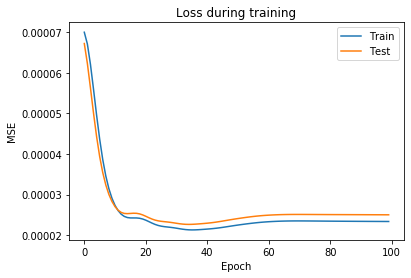

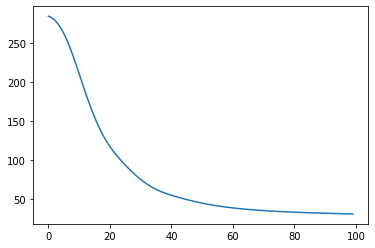

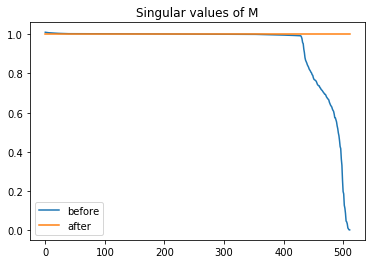

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 99.0994%)]


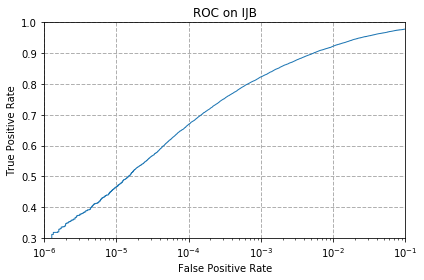

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.290638  0.466125   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.668814  0.823184   

Methods                                                0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.92279  0.978575   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CenterLoss      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  MobileNetV2  ArcFace

saving to ../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijb

[*] Epoch: 10, Train loss: 5.9664e-05, Test loss: 5.8624e-05, Rot loss: 2.1856e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 4.5582e-05, Test loss: 4.9246e-05, Rot loss: 1.2251e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 4.3584e-05, Test loss: 4.6638e-05, Rot loss: 6.6630e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 4.1010e-05, Test loss: 4.4735e-05, Rot loss: 3.9506e+01, LR : 1.00e+02
[*] Epoch: 50, Train loss: 4.0539e-05, Test loss: 4.4370e-05, Rot loss: 2.7567e+01, LR : 1.00e+02
[*] Epoch: 60, Train loss: 4.0444e-05, Test loss: 4.4316e-05, Rot loss: 2.2625e+01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 4.0763e-05, Test loss: 4.4719e-05, Rot loss: 2.0307e+01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 4.1134e-05, Test loss: 4.5137e-05, Rot loss: 1.8964e+01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 4.1365e-05, Test loss: 4.5373e-05, Rot loss: 1.8294e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 4.1547e-05, Test loss: 4.5563e-05, Rot loss: 1.7873e+01, LR : 1.00e+02



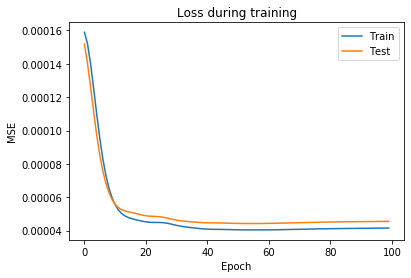

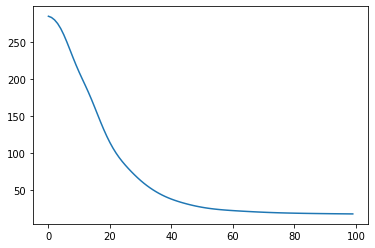

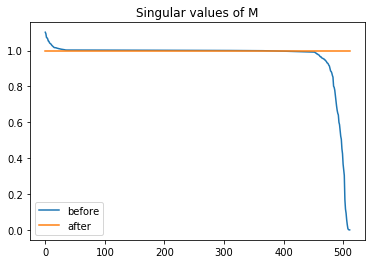

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 99.2864%)]


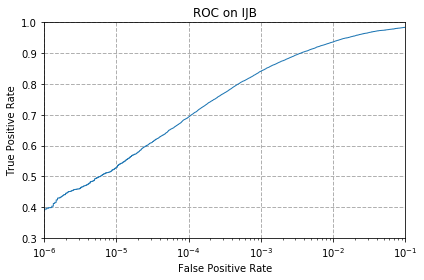

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  0.394079  0.528915   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  0.692744  0.841489   

Methods                                                 0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  0.936647  0.984098   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  CenterLoss  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_vggf...  CenterLoss

saving to ../../../../results/casia_ir2_ijbc_embs_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nobackup

[*] Epoch: 10, Train loss: 6.0577e-05, Test loss: 5.6850e-05, Rot loss: 6.6219e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.6406e-05, Test loss: 3.5827e-05, Rot loss: 6.3798e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.1801e-05, Test loss: 3.1832e-05, Rot loss: 6.0958e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.9785e-05, Test loss: 3.0058e-05, Rot loss: 5.8921e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.9137e-05, Test loss: 2.9488e-05, Rot loss: 5.7911e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.8970e-05, Test loss: 2.9384e-05, Rot loss: 5.7554e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.8972e-05, Test loss: 2.9420e-05, Rot loss: 5.7423e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.9025e-05, Test loss: 2.9497e-05, Rot loss: 5.7328e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.9084e-05, Test loss: 2.9578e-05, Rot loss: 5.7246e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.9132e-05, Test loss: 2.9646e-05, Rot loss: 5.7182e+02, LR : 1.00e+02



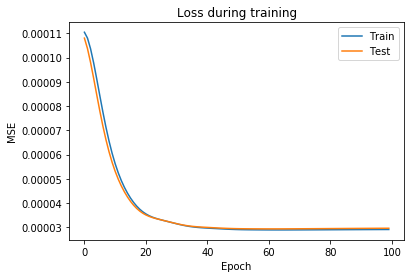

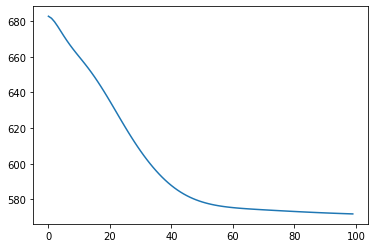

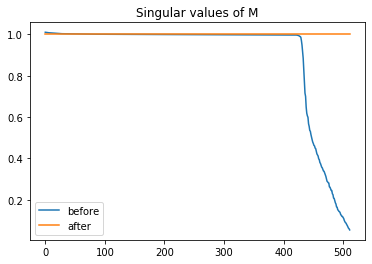

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 98.0143%)]


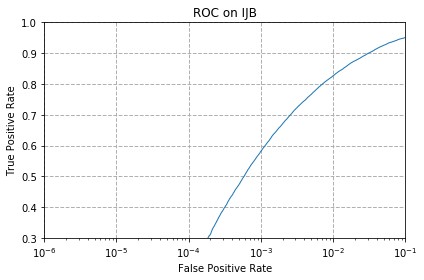

Methods                                                1e-06    1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.000716  0.00905   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.191185  0.581582   

Methods                                                 0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.826712  0.951373   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  InceptionResNetV1   

Methods                                                 L_HEAD R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CenterLoss      MS1M   

Methods                                             R_ARCH          R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  64-CNN  SphereFace+PFE

saving to ../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy
>>>> Reload (right) embeddings from: /s/red/b/nob

[*] Epoch: 10, Train loss: 5.7463e-05, Test loss: 5.3825e-05, Rot loss: 6.6173e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.1996e-05, Test loss: 3.1799e-05, Rot loss: 6.3528e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.7498e-05, Test loss: 2.7953e-05, Rot loss: 6.0528e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.5468e-05, Test loss: 2.6144e-05, Rot loss: 5.8421e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.4776e-05, Test loss: 2.5531e-05, Rot loss: 5.7373e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.4611e-05, Test loss: 2.5429e-05, Rot loss: 5.6980e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.4627e-05, Test loss: 2.5473e-05, Rot loss: 5.6818e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.4688e-05, Test loss: 2.5553e-05, Rot loss: 5.6701e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.4751e-05, Test loss: 2.5634e-05, Rot loss: 5.6600e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.4798e-05, Test loss: 2.5693e-05, Rot loss: 5.6522e+02, LR : 1.00e+02



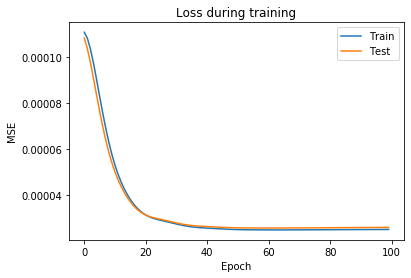

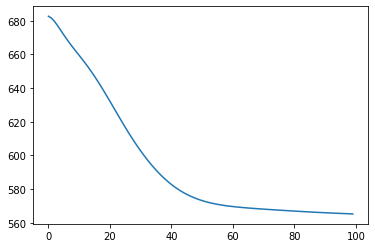

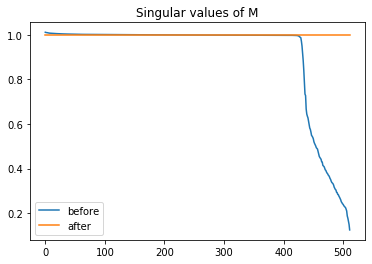

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 98.9132%)]


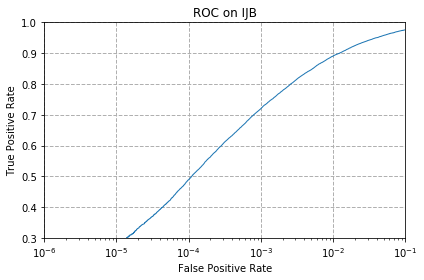

Methods                                                1e-06     1e-05  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.134632  0.276525   

Methods                                               0.0001     0.001  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.489441  0.719998   

Methods                                                0.01       0.1  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  0.89073  0.976121   

Methods                                                 L_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CASIA-WebFace   

Methods                                                        L_ARCH  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  InceptionResNetV1   

Methods                                                 L_HEAD      R_DATASET  \
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  CenterLoss  CASIA-WebFace   

Methods                                             R_ARCH          R_HEAD  
../../../../results/casia_ir2_ijbc_embs_TO_ijbc...  64-CNN  SphereFace+PFE

saving to ../../../../results/casia_ir2_ijbc_embs_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddin

[*] Epoch: 10, Train loss: 1.3915e-02, Test loss: 1.3976e-02, Rot loss: 3.8939e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3621e-02, Test loss: 1.3845e-02, Rot loss: 4.2429e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3617e-02, Test loss: 1.3794e-02, Rot loss: 3.1133e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3584e-02, Test loss: 1.3779e-02, Rot loss: 3.0272e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3574e-02, Test loss: 1.3767e-02, Rot loss: 2.9974e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3574e-02, Test loss: 1.3766e-02, Rot loss: 2.9215e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3571e-02, Test loss: 1.3764e-02, Rot loss: 2.9373e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3571e-02, Test loss: 1.3764e-02, Rot loss: 2.9297e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3570e-02, Test loss: 1.3764e-02, Rot loss: 2.9258e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3570e-02, Test loss: 1.3763e-02, Rot loss: 2.9294e+02, LR : 1.00e+02



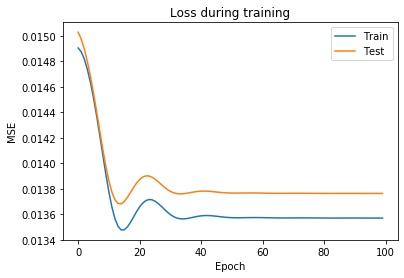

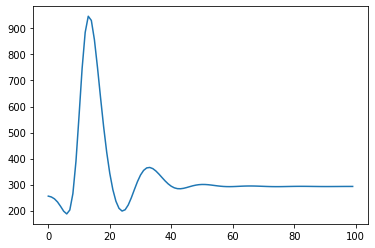

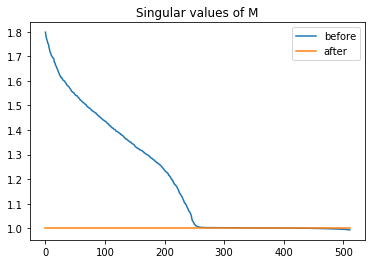

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 99.3277%)]


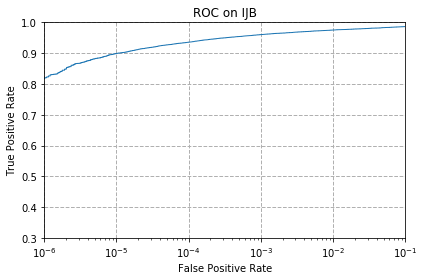

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.820473  0.898962   

Methods                                               0.0001    0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.935726  0.96027   

Methods                                                0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.97515  0.986603   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  ResNet100  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-

[*] Epoch: 10, Train loss: 1.4191e-02, Test loss: 1.5264e-02, Rot loss: 3.7788e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.4023e-02, Test loss: 1.5225e-02, Rot loss: 2.9770e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3987e-02, Test loss: 1.5148e-02, Rot loss: 2.7066e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3978e-02, Test loss: 1.5153e-02, Rot loss: 2.2930e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3961e-02, Test loss: 1.5135e-02, Rot loss: 2.4290e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3964e-02, Test loss: 1.5137e-02, Rot loss: 2.3009e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3961e-02, Test loss: 1.5135e-02, Rot loss: 2.3326e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3960e-02, Test loss: 1.5134e-02, Rot loss: 2.3234e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3960e-02, Test loss: 1.5134e-02, Rot loss: 2.3194e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3959e-02, Test loss: 1.5133e-02, Rot loss: 2.3230e+02, LR : 1.00e+02



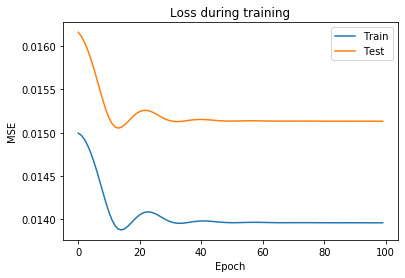

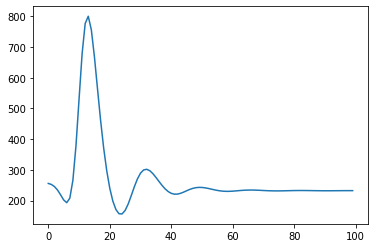

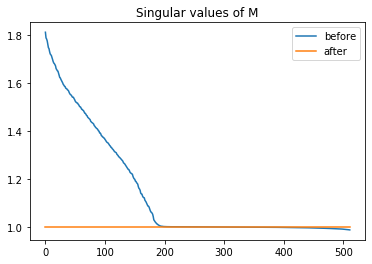

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.3178%)]


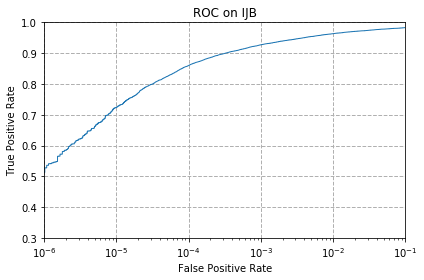

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.527791  0.724089   

Methods                                              0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.86005  0.927341   

Methods                                                0.01      0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.96344  0.98328   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/i

[*] Epoch: 10, Train loss: 1.5686e-02, Test loss: 1.7632e-02, Rot loss: 3.4659e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5324e-02, Test loss: 1.7409e-02, Rot loss: 4.5798e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5340e-02, Test loss: 1.7381e-02, Rot loss: 2.9016e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5291e-02, Test loss: 1.7347e-02, Rot loss: 3.0226e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5283e-02, Test loss: 1.7336e-02, Rot loss: 2.9258e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5281e-02, Test loss: 1.7334e-02, Rot loss: 2.8596e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5276e-02, Test loss: 1.7330e-02, Rot loss: 2.8850e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5276e-02, Test loss: 1.7330e-02, Rot loss: 2.8648e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5275e-02, Test loss: 1.7329e-02, Rot loss: 2.8693e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5275e-02, Test loss: 1.7328e-02, Rot loss: 2.8695e+02, LR : 1.00e+02



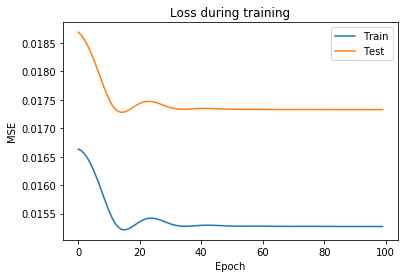

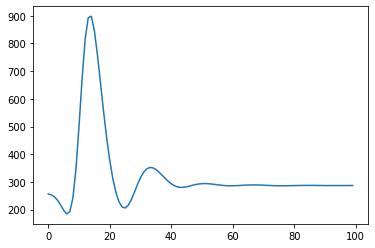

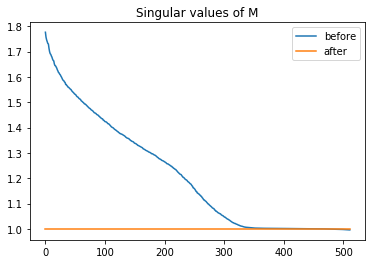

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_glint360k_r100FC_0_rotonly (AUC = 99.4926%)]


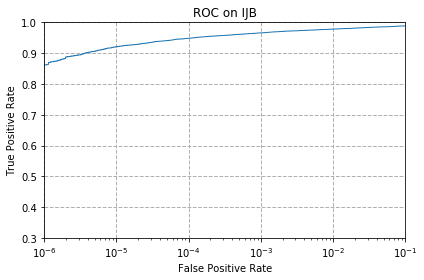

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.862095  0.920693   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.948356  0.965997   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.978269  0.988955   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  ResNet100  PartialFC_r0.1

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs

[*] Epoch: 10, Train loss: 1.5571e-02, Test loss: 1.7308e-02, Rot loss: 2.1424e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5138e-02, Test loss: 1.6989e-02, Rot loss: 4.3047e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5188e-02, Test loss: 1.7006e-02, Rot loss: 1.7874e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5114e-02, Test loss: 1.6946e-02, Rot loss: 2.3465e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5115e-02, Test loss: 1.6942e-02, Rot loss: 2.0775e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5107e-02, Test loss: 1.6936e-02, Rot loss: 2.0881e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5103e-02, Test loss: 1.6932e-02, Rot loss: 2.0905e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5102e-02, Test loss: 1.6931e-02, Rot loss: 2.0742e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5100e-02, Test loss: 1.6929e-02, Rot loss: 2.0824e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5100e-02, Test loss: 1.6928e-02, Rot loss: 2.0779e+02, LR : 1.00e+02



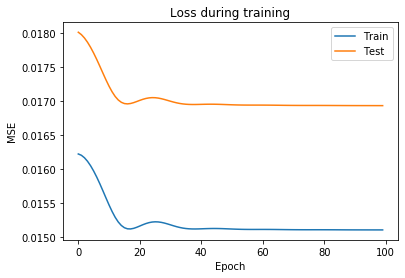

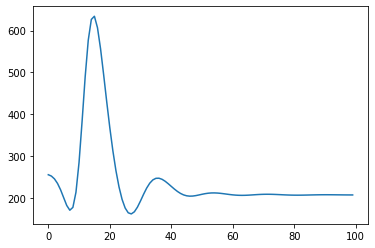

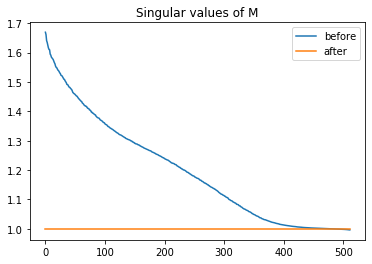

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_glint360k_r100FC_1_rotonly (AUC = 99.4207%)]


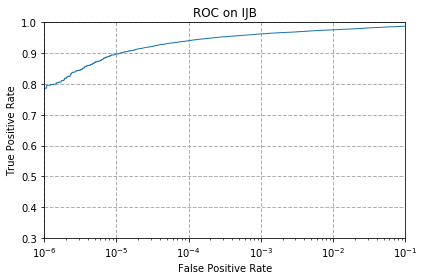

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.786726  0.897479   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.940533  0.962469   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.975814  0.987677   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  ResNet100  PartialFC_r1.0

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy


[*] Epoch: 10, Train loss: 3.5874e-05, Test loss: 3.5936e-05, Rot loss: 1.5231e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.7246e-05, Test loss: 3.7324e-05, Rot loss: 2.5651e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.5910e-05, Test loss: 3.5611e-05, Rot loss: 1.1319e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.1513e-05, Test loss: 3.1271e-05, Rot loss: 3.1559e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.8215e-05, Test loss: 2.8277e-05, Rot loss: 2.4482e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.6229e-05, Test loss: 2.6458e-05, Rot loss: 7.0868e-01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.4564e-05, Test loss: 2.4858e-05, Rot loss: 3.2455e-01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.3073e-05, Test loss: 2.3438e-05, Rot loss: 2.6073e-01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.1911e-05, Test loss: 2.2347e-05, Rot loss: 2.4087e-01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.1016e-05, Test loss: 2.1495e-05, Rot loss: 1.6896e-01, LR : 1.00e+02



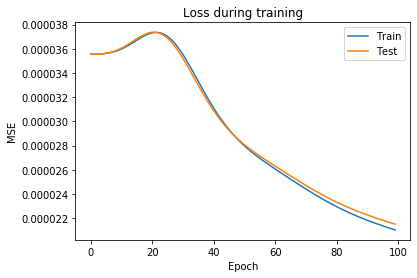

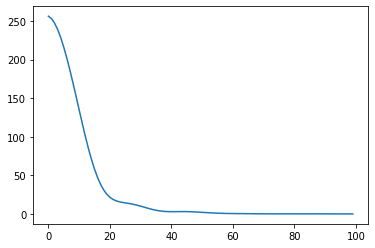

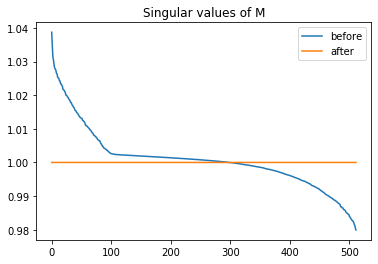

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_arc_res50_rotonly (AUC = 98.6231%)]


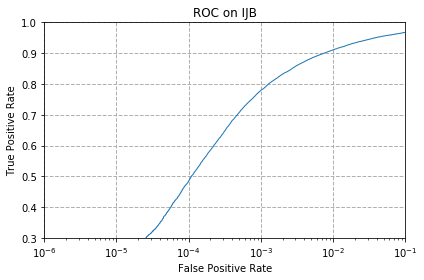

Methods                                                1e-06   1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.075983  0.1964   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.484788  0.779312   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.910723  0.967633   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy
>

[*] Epoch: 10, Train loss: 3.6157e-05, Test loss: 3.6182e-05, Rot loss: 1.5199e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.8003e-05, Test loss: 3.8011e-05, Rot loss: 2.5440e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.7027e-05, Test loss: 3.6634e-05, Rot loss: 1.1169e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.2844e-05, Test loss: 3.2500e-05, Rot loss: 3.2131e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.9822e-05, Test loss: 2.9777e-05, Rot loss: 2.5825e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.8111e-05, Test loss: 2.8218e-05, Rot loss: 7.3368e-01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 2.6613e-05, Test loss: 2.6768e-05, Rot loss: 3.4432e-01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 2.5223e-05, Test loss: 2.5441e-05, Rot loss: 3.1762e-01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 2.4155e-05, Test loss: 2.4439e-05, Rot loss: 2.9374e-01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 2.3337e-05, Test loss: 2.3657e-05, Rot loss: 2.0949e-01, LR : 1.00e+02



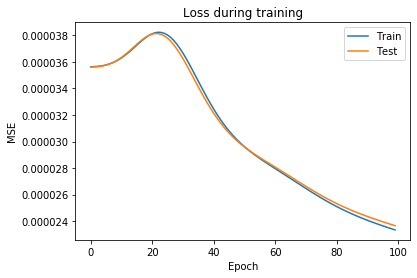

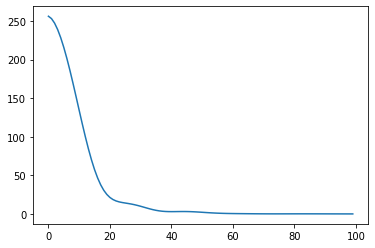

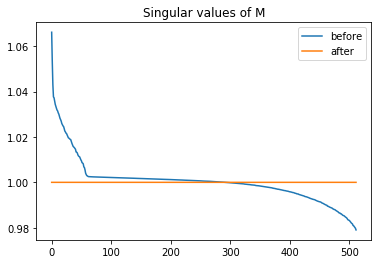

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 97.2088%)]


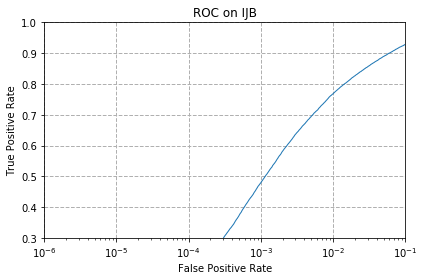

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.004244  0.030833   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.161323  0.479624   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.768523  0.928721   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  MobileNetV2  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.np

[*] Epoch: 10, Train loss: 1.2174e-04, Test loss: 1.2098e-04, Rot loss: 1.5147e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.1602e-04, Test loss: 1.1537e-04, Rot loss: 2.8843e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.1165e-04, Test loss: 1.1105e-04, Rot loss: 1.3210e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.0591e-04, Test loss: 1.0526e-04, Rot loss: 3.5799e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.0091e-04, Test loss: 1.0063e-04, Rot loss: 4.1917e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 9.8848e-05, Test loss: 9.8853e-05, Rot loss: 2.2925e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 9.7601e-05, Test loss: 9.7600e-05, Rot loss: 1.4010e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 9.6149e-05, Test loss: 9.6192e-05, Rot loss: 1.6437e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 9.5205e-05, Test loss: 9.5319e-05, Rot loss: 1.6563e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 9.4596e-05, Test loss: 9.4719e-05, Rot loss: 1.4614e+00, LR : 1.00e+02



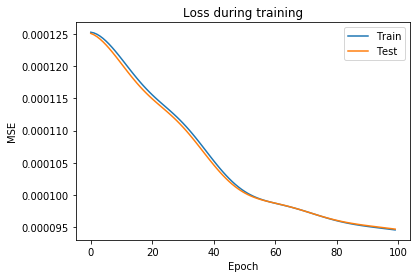

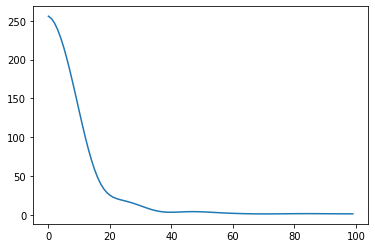

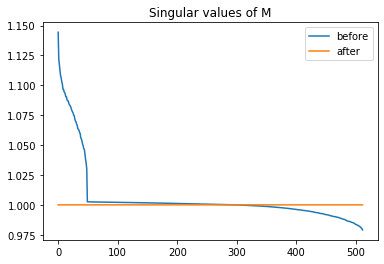

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 97.5651%)]


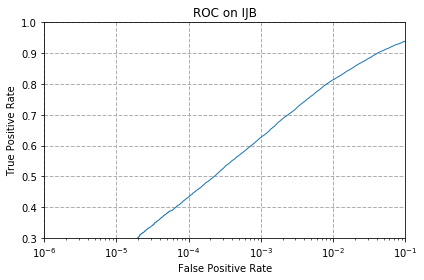

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.118014  0.254231   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.432837  0.626681   

Methods                                                 0.01      0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.813826  0.93905   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  CenterLoss

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy


[*] Epoch: 10, Train loss: 1.2186e-04, Test loss: 1.2119e-04, Rot loss: 1.5137e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.1677e-04, Test loss: 1.1624e-04, Rot loss: 2.8094e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.1235e-04, Test loss: 1.1198e-04, Rot loss: 1.3033e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.0639e-04, Test loss: 1.0610e-04, Rot loss: 3.3459e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.0114e-04, Test loss: 1.0130e-04, Rot loss: 3.4947e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 9.8436e-05, Test loss: 9.8932e-05, Rot loss: 1.9480e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 9.6736e-05, Test loss: 9.7290e-05, Rot loss: 1.1361e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 9.5084e-05, Test loss: 9.5707e-05, Rot loss: 1.2007e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 9.3885e-05, Test loss: 9.4596e-05, Rot loss: 1.2659e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 9.3085e-05, Test loss: 9.3827e-05, Rot loss: 1.1176e+00, LR : 1.00e+02



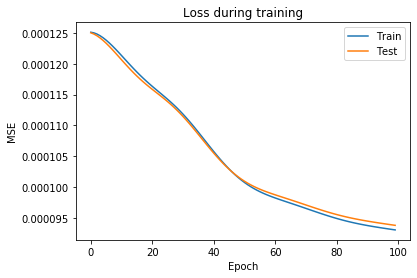

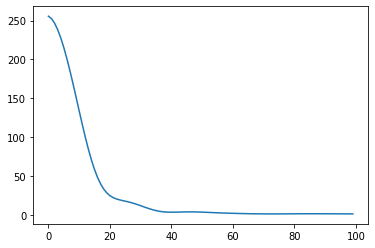

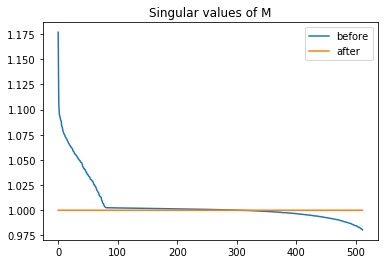

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_casia_ir2_ijbc_embs_rotonly (AUC = 97.8257%)]


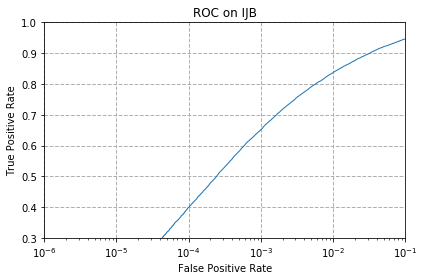

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.024441  0.132945   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.399294  0.651685   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.837347  0.946618   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE   

Methods                                                 R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  CenterLoss

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddin

[*] Epoch: 10, Train loss: 4.0157e-05, Test loss: 4.0153e-05, Rot loss: 5.3153e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.9508e-05, Test loss: 3.9614e-05, Rot loss: 4.5065e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.9176e-05, Test loss: 3.9442e-05, Rot loss: 3.6198e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.9155e-05, Test loss: 3.9580e-05, Rot loss: 2.8290e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.9299e-05, Test loss: 3.9856e-05, Rot loss: 2.1905e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.9480e-05, Test loss: 4.0135e-05, Rot loss: 1.6935e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 3.9626e-05, Test loss: 4.0353e-05, Rot loss: 1.3106e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 3.9708e-05, Test loss: 4.0488e-05, Rot loss: 1.0176e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 3.9719e-05, Test loss: 4.0541e-05, Rot loss: 7.9472e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 3.9662e-05, Test loss: 4.0519e-05, Rot loss: 6.2531e+01, LR : 1.00e+02



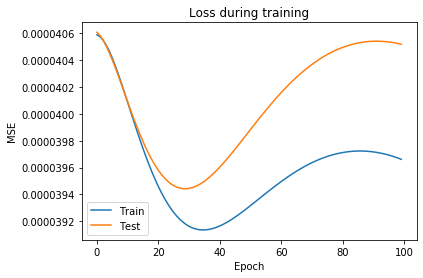

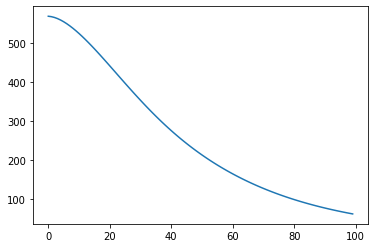

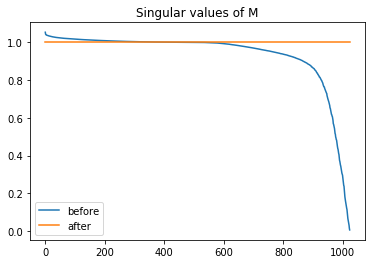

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly (AUC = 97.9831%)]


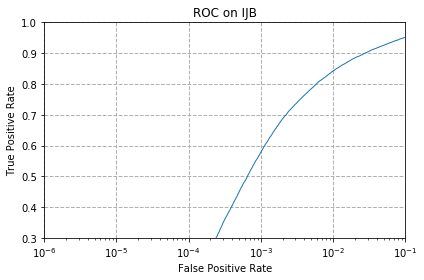

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.002096  0.017948   

Methods                                               0.0001    0.001  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.152835  0.57831   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  0.842409  0.951424   

Methods                                            L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...      MS1M  64-CNN   

Methods                                                     L_HEAD  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE   

Methods                                                 R_DATASET  R_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_msar...  CASIA-WebFace  64-CNN   

Methods                                                     R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_msar...  SphereFace+PFE

saving to ../../../../results/ijbc_embs_pfe_sphere64_msarcface_am_TO_ijbc_embs_pfe_sphere64_casia_am_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-

[*] Epoch: 10, Train loss: 1.4120e-02, Test loss: 1.4227e-02, Rot loss: 3.8214e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3964e-02, Test loss: 1.4189e-02, Rot loss: 2.8433e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3923e-02, Test loss: 1.4119e-02, Rot loss: 2.5587e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3915e-02, Test loss: 1.4121e-02, Rot loss: 2.1439e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3898e-02, Test loss: 1.4106e-02, Rot loss: 2.2483e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3900e-02, Test loss: 1.4106e-02, Rot loss: 2.1503e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3897e-02, Test loss: 1.4104e-02, Rot loss: 2.1659e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3896e-02, Test loss: 1.4103e-02, Rot loss: 2.1627e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3895e-02, Test loss: 1.4103e-02, Rot loss: 2.1575e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3895e-02, Test loss: 1.4102e-02, Rot loss: 2.1613e+02, LR : 1.00e+02



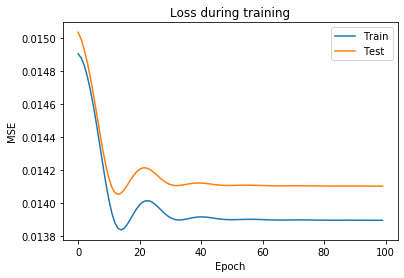

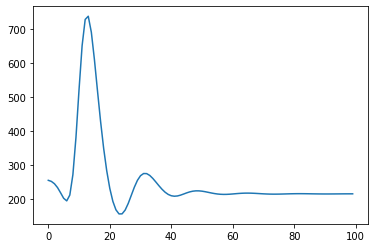

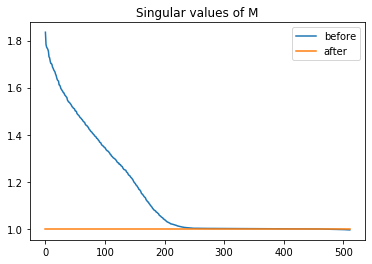

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly (AUC = 99.2644%)]


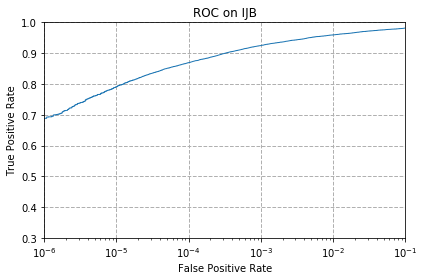

Methods                                                1e-06    1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.688756  0.79097   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.869254  0.924784   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.959452  0.981643   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE    MS1MV2   

Methods                                                R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  ResNet100  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_MS1MV2-ResNet100-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/i

[*] Epoch: 10, Train loss: 1.3772e-02, Test loss: 1.4903e-02, Rot loss: 8.4552e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.3871e-02, Test loss: 1.5079e-02, Rot loss: 2.7384e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.3728e-02, Test loss: 1.4941e-02, Rot loss: 3.8091e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.3733e-02, Test loss: 1.4942e-02, Rot loss: 3.1771e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.3724e-02, Test loss: 1.4936e-02, Rot loss: 3.1562e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.3719e-02, Test loss: 1.4931e-02, Rot loss: 3.1676e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.3719e-02, Test loss: 1.4931e-02, Rot loss: 3.1296e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.3718e-02, Test loss: 1.4930e-02, Rot loss: 3.1326e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.3718e-02, Test loss: 1.4930e-02, Rot loss: 3.1330e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.3717e-02, Test loss: 1.4929e-02, Rot loss: 3.1370e+02, LR : 1.00e+02



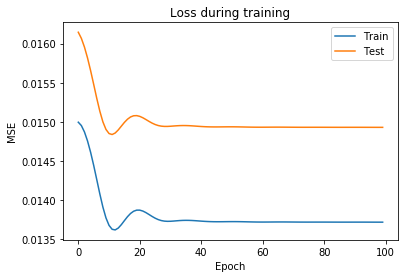

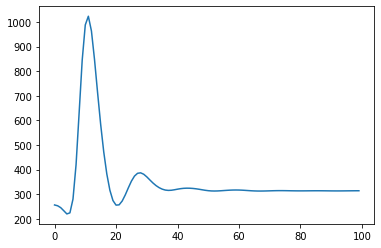

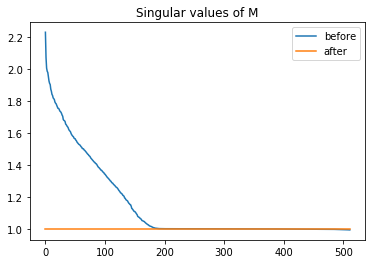

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_VGG2-ResNet50-Arcface_IJBC_rotonly (AUC = 99.4358%)]


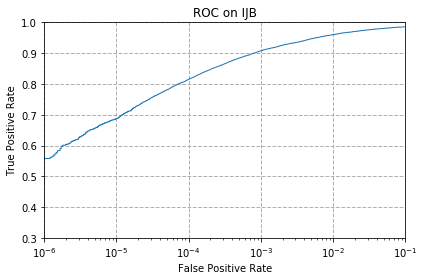

Methods                                                1e-06    1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.558061  0.68758   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.815207  0.907706   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.960423  0.985632   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE  VGGFace2   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_VGG2-ResNet50-Arcface_IJBC_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_glint360k_r100FC_0_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe

[*] Epoch: 10, Train loss: 1.5895e-02, Test loss: 1.7906e-02, Rot loss: 3.4098e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5697e-02, Test loss: 1.7816e-02, Rot loss: 3.0136e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5679e-02, Test loss: 1.7769e-02, Rot loss: 2.3182e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5658e-02, Test loss: 1.7758e-02, Rot loss: 2.1242e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5647e-02, Test loss: 1.7746e-02, Rot loss: 2.1448e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5646e-02, Test loss: 1.7745e-02, Rot loss: 2.0677e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5643e-02, Test loss: 1.7743e-02, Rot loss: 2.0861e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5642e-02, Test loss: 1.7742e-02, Rot loss: 2.0750e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5641e-02, Test loss: 1.7741e-02, Rot loss: 2.0758e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5641e-02, Test loss: 1.7740e-02, Rot loss: 2.0767e+02, LR : 1.00e+02



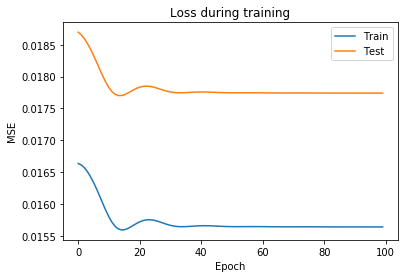

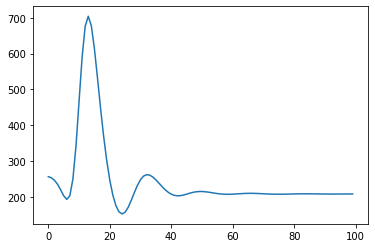

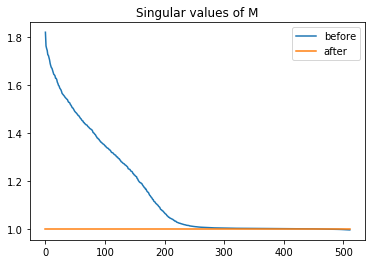

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_glint360k_r100FC_0_rotonly (AUC = 99.3909%)]


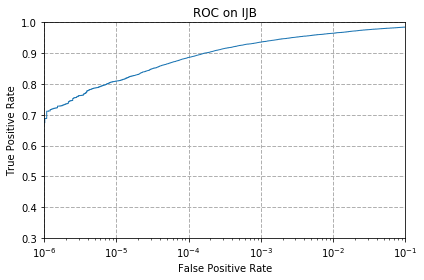

Methods                                               1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.68804  0.809531   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.886281  0.936033   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.964872  0.984865   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  ResNet100  PartialFC_r0.1

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_glint360k_r100FC_0_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_glint360k_r100FC_1_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere6

[*] Epoch: 10, Train loss: 1.5813e-02, Test loss: 1.7604e-02, Rot loss: 1.8892e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 1.5559e-02, Test loss: 1.7437e-02, Rot loss: 2.6499e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 1.5593e-02, Test loss: 1.7448e-02, Rot loss: 1.0453e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 1.5545e-02, Test loss: 1.7413e-02, Rot loss: 1.4061e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 1.5548e-02, Test loss: 1.7413e-02, Rot loss: 1.1918e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 1.5541e-02, Test loss: 1.7408e-02, Rot loss: 1.2216e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.5540e-02, Test loss: 1.7407e-02, Rot loss: 1.2053e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.5539e-02, Test loss: 1.7406e-02, Rot loss: 1.2044e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.5538e-02, Test loss: 1.7405e-02, Rot loss: 1.2046e+02, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.5537e-02, Test loss: 1.7404e-02, Rot loss: 1.2040e+02, LR : 1.00e+02



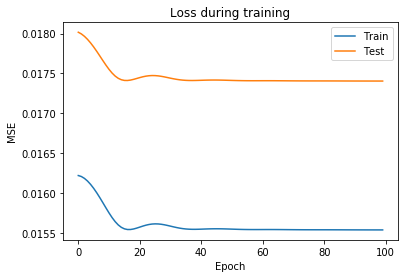

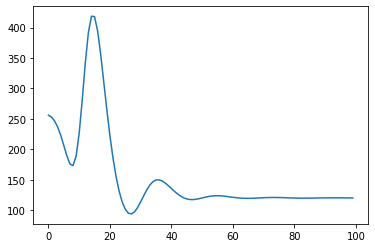

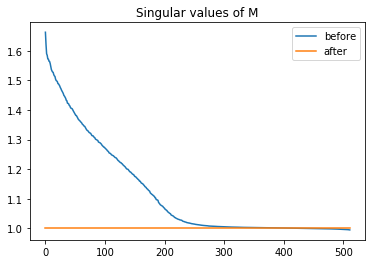

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_glint360k_r100FC_1_rotonly (AUC = 99.1655%)]


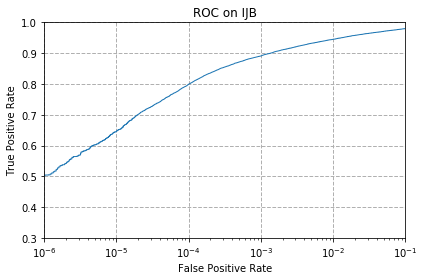

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.504321  0.645344   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.798947  0.891036   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.945084  0.979854   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD  R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE  Glint360k   

Methods                                                R_ARCH          R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  ResNet100  PartialFC_r1.0

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_glint360k_r100FC_1_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_arc_res50_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy
>>>> Reload (rig

[*] Epoch: 10, Train loss: 3.4379e-05, Test loss: 3.4447e-05, Rot loss: 1.5223e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.2961e-05, Test loss: 3.3365e-05, Rot loss: 2.6744e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.0331e-05, Test loss: 3.0619e-05, Rot loss: 1.2102e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.5955e-05, Test loss: 2.6304e-05, Rot loss: 3.0254e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.2754e-05, Test loss: 2.3370e-05, Rot loss: 2.0705e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.0984e-05, Test loss: 2.1760e-05, Rot loss: 6.2237e-01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.9799e-05, Test loss: 2.0629e-05, Rot loss: 2.5802e-01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.8875e-05, Test loss: 1.9750e-05, Rot loss: 1.3205e-01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.8209e-05, Test loss: 1.9132e-05, Rot loss: 1.1399e-01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.7745e-05, Test loss: 1.8698e-05, Rot loss: 7.4666e-02, LR : 1.00e+02



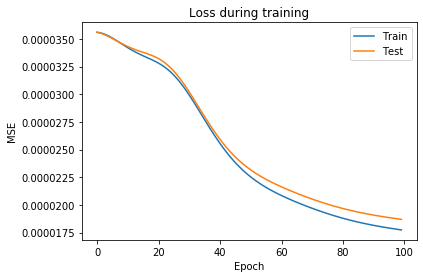

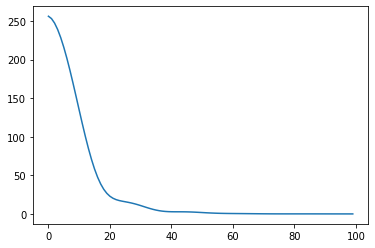

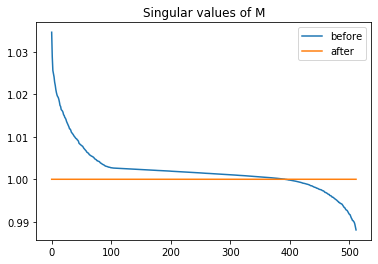

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_arc_res50_rotonly (AUC = 99.0039%)]


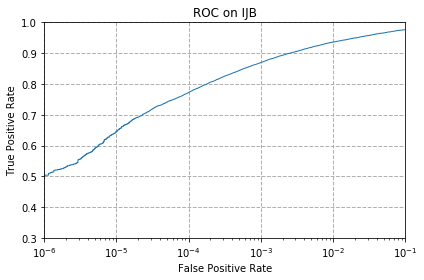

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.503963  0.645293   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.772409  0.869305   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.936135  0.976326   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE      MS1M   

Methods                                               R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  ResNet50  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_arc_res50_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_arc_mbv2_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy
>>>> Reload (righ

[*] Epoch: 10, Train loss: 3.3762e-05, Test loss: 3.3704e-05, Rot loss: 1.5197e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.1738e-05, Test loss: 3.2057e-05, Rot loss: 2.7182e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 2.9223e-05, Test loss: 2.9446e-05, Rot loss: 1.2156e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 2.4967e-05, Test loss: 2.5246e-05, Rot loss: 3.0432e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 2.1794e-05, Test loss: 2.2364e-05, Rot loss: 2.2775e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 2.0150e-05, Test loss: 2.0891e-05, Rot loss: 7.2749e-01, LR : 1.00e+02
[*] Epoch: 70, Train loss: 1.9052e-05, Test loss: 1.9841e-05, Rot loss: 3.1397e-01, LR : 1.00e+02
[*] Epoch: 80, Train loss: 1.8141e-05, Test loss: 1.8976e-05, Rot loss: 2.3071e-01, LR : 1.00e+02
[*] Epoch: 90, Train loss: 1.7504e-05, Test loss: 1.8385e-05, Rot loss: 2.1868e-01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 1.7075e-05, Test loss: 1.7979e-05, Rot loss: 1.6272e-01, LR : 1.00e+02



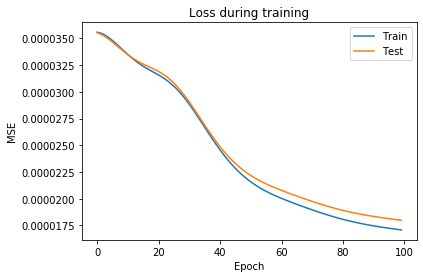

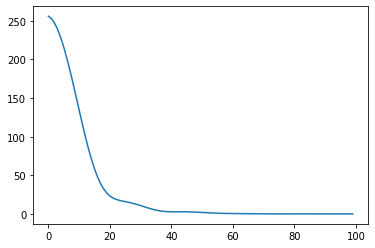

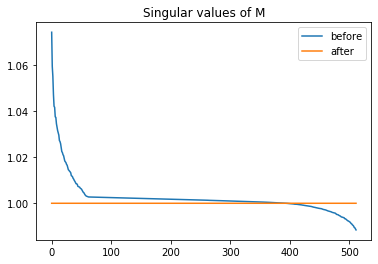

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_arc_mbv2_rotonly (AUC = 98.7149%)]


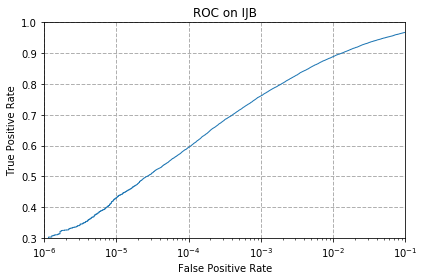

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.291507  0.430792   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.594519  0.761415   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.889196  0.967684   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE      MS1M   

Methods                                                  R_ARCH   R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  MobileNetV2  ArcFace

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_arc_mbv2_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_vggface2_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy
>>>> Reload (r

[*] Epoch: 10, Train loss: 1.1174e-04, Test loss: 1.1022e-04, Rot loss: 1.5045e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 9.4024e-05, Test loss: 9.4938e-05, Rot loss: 3.6558e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 8.9516e-05, Test loss: 9.1093e-05, Rot loss: 1.4936e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 8.3732e-05, Test loss: 8.5186e-05, Rot loss: 4.7860e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 7.9119e-05, Test loss: 8.1178e-05, Rot loss: 5.8804e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.8140e-05, Test loss: 8.0323e-05, Rot loss: 3.1697e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.7140e-05, Test loss: 7.9294e-05, Rot loss: 2.7742e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.6183e-05, Test loss: 7.8404e-05, Rot loss: 2.9775e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.5739e-05, Test loss: 7.7982e-05, Rot loss: 2.8232e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.5404e-05, Test loss: 7.7646e-05, Rot loss: 2.7608e+00, LR : 1.00e+02



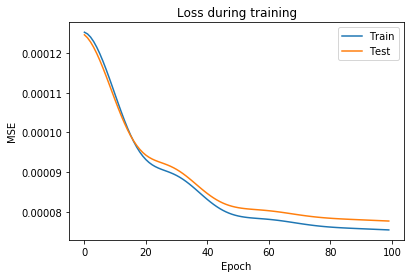

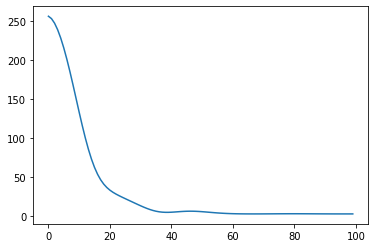

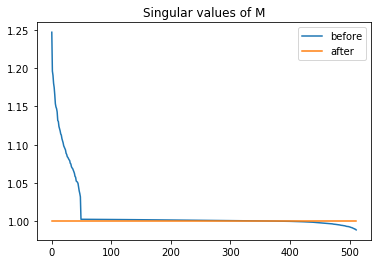

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_vggface2_ir2_ijbc_embs_rotonly (AUC = 99.1150%)]


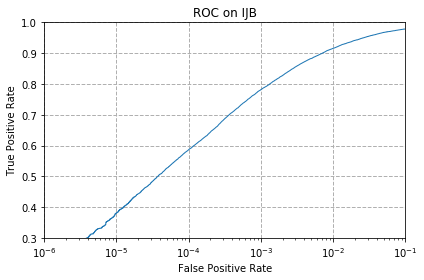

Methods                                               1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.20269  0.380887   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.586389  0.781664   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.915631  0.978575   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE  VGGFace2   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  CenterLoss

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_vggface2_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_casia_ir2_ijbc_embs_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy
>>>> Reload (rig

[*] Epoch: 10, Train loss: 1.1114e-04, Test loss: 1.0981e-04, Rot loss: 1.5060e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 9.3806e-05, Test loss: 9.4569e-05, Rot loss: 3.5492e+01, LR : 1.00e+02
[*] Epoch: 30, Train loss: 8.8424e-05, Test loss: 8.9554e-05, Rot loss: 1.5083e+01, LR : 1.00e+02
[*] Epoch: 40, Train loss: 8.2008e-05, Test loss: 8.3070e-05, Rot loss: 4.7250e+00, LR : 1.00e+02
[*] Epoch: 50, Train loss: 7.6977e-05, Test loss: 7.8407e-05, Rot loss: 5.1017e+00, LR : 1.00e+02
[*] Epoch: 60, Train loss: 7.5101e-05, Test loss: 7.6671e-05, Rot loss: 3.1851e+00, LR : 1.00e+02
[*] Epoch: 70, Train loss: 7.4008e-05, Test loss: 7.5576e-05, Rot loss: 2.4553e+00, LR : 1.00e+02
[*] Epoch: 80, Train loss: 7.2892e-05, Test loss: 7.4475e-05, Rot loss: 2.6127e+00, LR : 1.00e+02
[*] Epoch: 90, Train loss: 7.2266e-05, Test loss: 7.3876e-05, Rot loss: 2.5587e+00, LR : 1.00e+02
[*] Epoch: 100, Train loss: 7.1874e-05, Test loss: 7.3475e-05, Rot loss: 2.4481e+00, LR : 1.00e+02



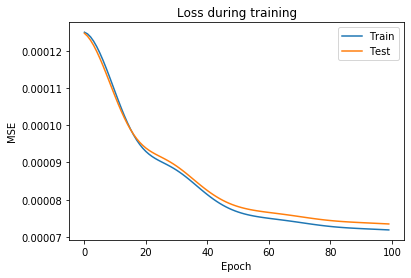

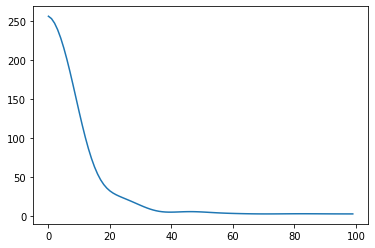

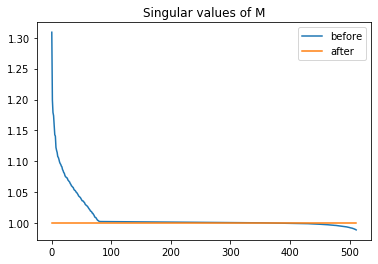

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_casia_ir2_ijbc_embs_rotonly (AUC = 98.8943%)]


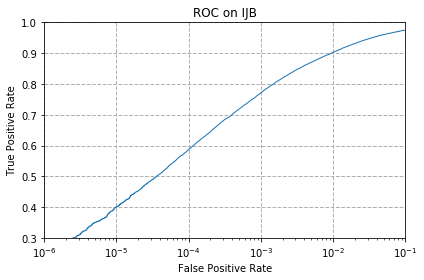

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.247533  0.400368   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.586849  0.771335   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.902695  0.974945   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE   

Methods                                                 R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace   

Methods                                                        R_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  InceptionResNetV1   

Methods                                                 R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  CenterLoss

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_casia_ir2_ijbc_embs_rotonly.npz.csv
<class '__main__.Args'>: {'subset': 'IJBC', 'is_bunch': False, 'restore_embs_left': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'restore_embs_right': '/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'fit_mapping': True, 'fit_flips': False, 'decay_coef': 0.0, 'pre_template_map': True, 'is_rotation_map': True, 'save_result': '../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz', 'save_embeddings': False, 'model_file': None, 'data_path': './', 'batch_size': 64, 'save_label': False, 'force_reload': False, 'is_one_2_N': False, 'plot_only': None}
>>>> Reloading from backup: ./IJBC_backup.npz ...
>>>> Reload (left) embeddings from: /s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/i

[*] Epoch: 10, Train loss: 3.9849e-05, Test loss: 3.9775e-05, Rot loss: 5.3206e+02, LR : 1.00e+02
[*] Epoch: 20, Train loss: 3.8379e-05, Test loss: 3.8419e-05, Rot loss: 4.5144e+02, LR : 1.00e+02
[*] Epoch: 30, Train loss: 3.7251e-05, Test loss: 3.7456e-05, Rot loss: 3.6311e+02, LR : 1.00e+02
[*] Epoch: 40, Train loss: 3.6572e-05, Test loss: 3.6935e-05, Rot loss: 2.8451e+02, LR : 1.00e+02
[*] Epoch: 50, Train loss: 3.6218e-05, Test loss: 3.6713e-05, Rot loss: 2.2127e+02, LR : 1.00e+02
[*] Epoch: 60, Train loss: 3.6051e-05, Test loss: 3.6653e-05, Rot loss: 1.7226e+02, LR : 1.00e+02
[*] Epoch: 70, Train loss: 3.5979e-05, Test loss: 3.6662e-05, Rot loss: 1.3464e+02, LR : 1.00e+02
[*] Epoch: 80, Train loss: 3.5947e-05, Test loss: 3.6694e-05, Rot loss: 1.0585e+02, LR : 1.00e+02
[*] Epoch: 90, Train loss: 3.5928e-05, Test loss: 3.6726e-05, Rot loss: 8.3879e+01, LR : 1.00e+02
[*] Epoch: 100, Train loss: 3.5905e-05, Test loss: 3.6746e-05, Rot loss: 6.7139e+01, LR : 1.00e+02



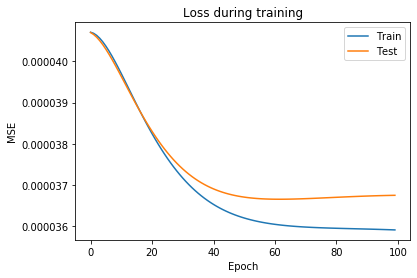

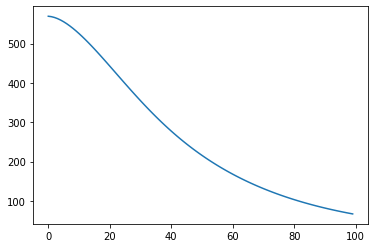

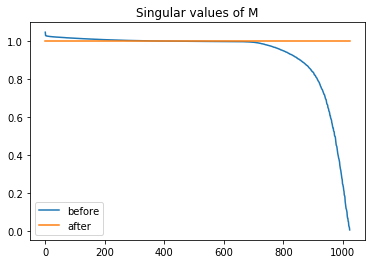

>>>> Done.



>>>> plot roc and calculate tpr...
[../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly (AUC = 98.0776%)]


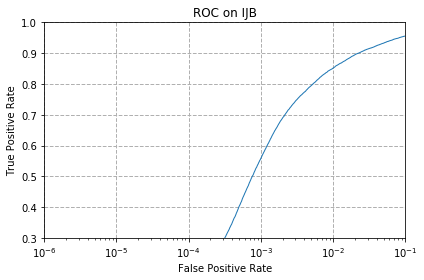

Methods                                                1e-06     1e-05  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.001432  0.006698   

Methods                                               0.0001     0.001  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.098635  0.558828   

Methods                                                 0.01       0.1  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.851767  0.955975   

Methods                                                 L_DATASET  L_ARCH  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace  64-CNN   

Methods                                                     L_HEAD R_DATASET  \
../../../../results/ijbc_embs_pfe_sphere64_casi...  SphereFace+PFE      MS1M   

Methods                                             R_ARCH          R_HEAD  
../../../../results/ijbc_embs_pfe_sphere64_casi...  64-CNN  SphereFace+PFE

saving to ../../../../results/ijbc_embs_pfe_sphere64_casia_am_TO_ijbc_embs_pfe_sphere64_msarcface_am_rotonly.npz.csv


In [9]:
for left_embs, left_dataset, left_architecture, left_head in embs_list:
    for right_embs, right_dataset, right_architecture, right_head in embs_list:
        if left_embs == right_embs:
            continue

        try:
            #for pre_template_map in pre_template_map:
            save_result_name = '{}_TO_{}_rotonly'.format(left_embs.split('/')[-1].split('.')[0], right_embs.split('/')[-1].split('.')[0])
            save_result = '../../../../results/{}.npz'.format(save_result_name)
            args = Args(subset='IJBC',  
                is_bunch=False,
                restore_embs_left=left_embs,
                restore_embs_right=right_embs,
                fit_mapping=True,
                fit_flips=fit_flips,
                decay_coef=decay_coef,
                pre_template_map=pre_template_map,
                is_rotation_map=is_rotation_map,
                save_result=save_result)
            df, fig = IJB.main(args)
            df['L_DATASET'] = left_dataset
            df['L_ARCH'] = left_architecture
            df['L_HEAD'] = left_head
            df['R_DATASET'] = right_dataset
            df['R_ARCH'] = right_architecture
            df['R_HEAD'] = right_head
            display(df)
            dataframes[save_result_name] = df
            print('saving to', args.save_result + '.csv')
            df.to_csv(args.save_result + '.csv')
        except Exception:
            traceback.print_exc()

In [10]:
import pandas as pd

In [11]:
superdf = pd.concat([df for df in dataframes.values()])

In [12]:
superdf

Methods                                                1e-06     1e-05  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.796543  0.876668   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.920540  0.951935   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.902950  0.937311   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.624329  0.727157   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.168482  0.322033   
...                                                      ...       ...   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.503963  0.645293   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.291507  0.430792   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.202690  0.380887   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.247533  0.400368   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.001432  0.006698   

Methods                                               0.0001     0.001  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.924119  0.957560   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.965997  0.975098   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.956844  0.969627   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.831518  0.900854   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.529069  0.725162   
...                                                      ...       ...   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.772409  0.869305   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.594519  0.761415   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.586389  0.781664   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.586849  0.771335   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.098635  0.558828   

Methods                                                 0.01       0.1  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.976786  0.988802   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.982973  0.990847   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.979496  0.989364   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.944675  0.975354   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...  0.874316  0.958327   
...                                                      ...       ...   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.936135  0.976326   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.889196  0.967684   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.915631  0.978575   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.902695  0.974945   
../../../../results/ijbc_embs_pfe_sphere64_casi...  0.851767  0.955975   

Methods                                                 L_DATASET     L_ARCH  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         MS1MV2  ResNet100   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         MS1MV2  ResNet100   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         MS1MV2  ResNet100   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         MS1MV2  ResNet100   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         MS1MV2  ResNet100   
...                                                           ...        ...   
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace     64-CNN   
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace     64-CNN   
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace     64-CNN   
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace     64-CNN   
../../../../results/ijbc_embs_pfe_sphere64_casi...  CASIA-WebFace     64-CNN   

Methods                                                     L_HEAD  \
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         ArcFace   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         ArcFace   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         ArcFace   
../../../../results/MS1MV2-ResNet100-Arcface_IJ...         ArcFace   
../../../../results/MS

In [13]:
superdf.to_csv('../../../../results/ALL_aggregated_results_rotonly_v1.csv')